![DATE Header.jpg](attachment:358b734d-ea3a-4aaf-a4f3-f8b4818840f7.jpg)

# Instructor: PRASHANTH KANNADAGULI

## DEEP LEARNING Internship: Mini-Project 3

## Prediction of Weather Parameters using Recurrent Neural Networks

## Part 1: Data Loading, Exploration, and EDA

#### Import required Libraries

In [ ]:
# Write your code here
# -----------------------------------------------------
# Part 1: Data Loading, Exploration, and EDA
# -----------------------------------------------------

# --- Import required Libraries ---

print("Importing required libraries...")

# Core libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing (scaling) and evaluation metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math # Often used for RMSE calculation (sqrt)

# TensorFlow and Keras for building and training RNN models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
# Import specific layer types needed throughout the project
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, TimeDistributed, Dropout, Reshape
# Import callbacks for efficient training (used in later parts)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os # Useful for managing file paths, e.g., for model checkpoints

# --- Configure Settings ---

# Set random seeds for consistent results across runs (reproducibility)
tf.random.set_seed(42)
np.random.seed(42)
print("Random seeds set for reproducibility.")

# Configure Matplotlib plots to appear inline in notebook environments
# %matplotlib inline # Uncomment if running in Jupyter Notebook or similar

# Set a default aesthetic style for Seaborn plots (optional)
sns.set(style="whitegrid")
print("Seaborn style set.")

# --- Confirmation ---
print("\nRequired Libraries Imported Successfully.")
print(f"Using TensorFlow version: {tf.__version__}")

Importing required libraries...
Random seeds set for reproducibility.
Seaborn style set.

Required Libraries Imported Successfully.
Using TensorFlow version: 2.18.0


#### Loading the Dataset: Load the weather.csv dataset into a pandas DataFrame. Display the first 5 rows to verify successful loading.

In [ ]:
# Write your code here
# Import necessary libraries
import pandas as pd
import io  # Needed to read the uploaded file content from memory

# This block is specific to Google Colab for file uploading
try:
    from google.colab import files
    print("--> Running in Google Colab. Ready for file upload.")
    # Set a flag indicating we are in Colab
    IN_COLAB = True
except ImportError:
    # If the import fails, we're likely not in Colab
    print("--> Not running in Google Colab. File upload via code disabled.")
    print("    Please ensure 'weather.csv' is in the script's directory.")
    IN_COLAB = False
    df = None # Initialize df if not in Colab and upload fails

# Define the expected filename
expected_filename = 'weather.csv'

# Proceed only if running in Colab
if IN_COLAB:
    print(f"\nACTION: Please upload the '{expected_filename}' file using the button below.")
    # --- File Upload Prompt ---
    uploaded = files.upload() # This line triggers the upload widget

    # --- Process Uploaded File ---
    # Check if the upload dictionary is not empty and contains the expected file
    if uploaded and expected_filename in uploaded:
        print(f"\nProcessing uploaded file: '{expected_filename}'...")
        try:
            # Get the raw byte content of the uploaded file
            file_content = uploaded[expected_filename]

            # Read the byte content directly into a pandas DataFrame
            # io.BytesIO creates an in-memory binary stream from the bytes
            df = pd.read_csv(io.BytesIO(file_content))

            print(f"Dataset '{expected_filename}' loaded successfully into DataFrame 'df'.")

            # --- Display the first 5 rows ---
            print("\nVerifying data - First 5 rows:")
            display(df.head()) # Use display for nice Colab formatting

        except Exception as e:
            # Handle errors during the reading/processing of the uploaded content
            print(f"\nError processing the uploaded file content: {e}")
            df = None
    else:
        # Handle cases where upload was cancelled or the wrong file was uploaded
        print(f"\nError: File upload failed, was cancelled, or the uploaded file was not named '{expected_filename}'.")
        if uploaded:
            print("Files found:", list(uploaded.keys())) # Show what was actually uploaded
        df = None
# If not in Colab, you would need alternative loading logic (like reading from a local path)
elif not IN_COLAB:
      print("--> Skipping file upload logic as not running in Colab.")
      # You might add your local file loading logic here if needed as a fallback
      # file_path = 'D:/path/to/weather.csv' # Example for local
      # try:
      #     df = pd.read_csv(file_path)
      #     print("Loaded local file.")
      #     print(df.head())
      # except:
      #     print("Failed to load local file.")


# --- Final Check ---
if df is not None:
    print(f"\nDataFrame 'df' is ready. Shape: {df.shape}")
else:
    print("\nDataFrame 'df' could not be created or loaded.")

--> Running in Google Colab. Ready for file upload.

ACTION: Please upload the 'weather.csv' file using the button below.


Saving weather.csv to weather.csv

Processing uploaded file: 'weather.csv'...
Dataset 'weather.csv' loaded successfully into DataFrame 'df'.

Verifying data - First 5 rows:


date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


DataFrame 'df' is ready. Shape: (1461, 6)


#### Initial Inspection: Display the last 5 rows of the DataFrame and print the total number of rows and columns to understand the dataset's size and structure.

In [ ]:
# Write your code here
# --- Initial Inspection: Size and Structure ---

# Check if the DataFrame 'df' was successfully loaded in the previous step
if 'df' in locals() and df is not None:
    print("\n>>> Performing Initial Inspection...")

    # --- Display Last 5 Rows ---
    # Use the .tail() method to get the last 5 rows (by default)
    print("\nLast 5 rows of the DataFrame:")
    try:
        # Use display() for better formatting in Jupyter/Colab
        display(df.tail())
    except NameError:
        # Fallback to print() if display() is not available
        print(df.tail())

    # --- Print Total Rows and Columns ---
    # The .shape attribute returns a tuple (number_of_rows, number_of_columns)
    num_rows = df.shape[0]
    num_cols = df.shape[1]

    print("\nDataset Size and Structure:")
    print(f"Total number of rows: {num_rows}")
    print(f"Total number of columns: {num_cols}")

else:
    # Print a message if the DataFrame wasn't loaded correctly
    print("\nError: DataFrame 'df' not available or not loaded successfully.")
    print("Please ensure the dataset was loaded correctly in the previous step before running this inspection.")



>>> Performing Initial Inspection...

Last 5 rows of the DataFrame:


date  precipitation  temp_max  temp_min  wind weather
1456  2015-12-27            8.6       4.4       1.7   2.9    rain
1457  2015-12-28            1.5       5.0       1.7   1.3    rain
1458  2015-12-29            0.0       7.2       0.6   2.6     fog
1459  2015-12-30            0.0       5.6      -1.0   3.4     sun
1460  2015-12-31            0.0       5.6      -2.1   3.5     sun


Dataset Size and Structure:
Total number of rows: 1461
Total number of columns: 6


#### Column Names and Data Types: Print the names of all columns in the DataFrame. Then, check and display the data type of each column. Are the data types appropriate for numerical analysis and time series processing?

In [ ]:
# Write your code here
# --- Column Names and Data Types ---

# Check if the DataFrame 'df' exists and is not None
if 'df' in locals() and df is not None:
    print("\n>>> Checking Column Names and Data Types...")

    # --- Print Column Names ---
    print("\nColumn Names:")
    # df.columns returns an Index object; convert to a list for cleaner printing
    column_names = list(df.columns)
    print(column_names)

    # --- Print Data Types ---
    print("\nData Types of each column:")
    # df.dtypes returns a Series with column names as index and data types as values
    print(df.dtypes)

    # --- Analyze Data Type Suitability ---
    print("\nAnalysis of Data Type Suitability:")

    # 1. Time Series Processing (Check 'date' column)
    if 'date' in df.columns:
        date_dtype = df['date'].dtype
        if pd.api.types.is_datetime64_any_dtype(date_dtype):
            print(f"- 'date' column is of type '{date_dtype}', which is appropriate for time series analysis.")
            # You might consider setting it as index later: df.set_index('date', inplace=True)
        elif date_dtype == 'object':
            print(f"- 'date' column is of type 'object'. It needs conversion to datetime (e.g., using pd.to_datetime(df['date'])) for proper time series processing.")
        else:
            print(f"- 'date' column has an unexpected type '{date_dtype}'. Needs inspection.")
    else:
        print("- 'date' column not found. Time might be represented by the default integer index.")

    # 2. Numerical Analysis (Check expected numerical features)
    expected_numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
    all_numerical_ok = True
    print("\nChecking expected numerical columns:")
    for col in expected_numerical_cols:
        if col in df.columns:
            col_dtype = df[col].dtype
            # pd.api.types.is_numeric_dtype checks for int, float types
            if pd.api.types.is_numeric_dtype(col_dtype):
                print(f"- '{col}' column is of type '{col_dtype}', which is appropriate for numerical analysis.")
            else:
                print(f"- '{col}' column is of type '{col_dtype}'. This is NOT appropriate for numerical analysis and needs conversion/cleaning.")
                all_numerical_ok = False
        else:
            print(f"- Error: Expected numerical column '{col}' is missing from the DataFrame.")
            all_numerical_ok = False

    if all_numerical_ok:
        print("  -> All expected numerical columns seem to have appropriate data types.")
    else:
        print("  -> One or more expected numerical columns have issues (missing or wrong type).")

    # 3. Categorical Analysis (Check 'weather' column)
    if 'weather' in df.columns:
        weather_dtype = df['weather'].dtype
        if weather_dtype == 'object':
             print(f"\n- 'weather' column is of type 'object', likely representing categories (e.g., 'rain', 'sun'). This is suitable for categorical analysis but requires encoding (like one-hot encoding) if used directly as a feature in most numerical models.")
        else:
             print(f"\n- 'weather' column has an unexpected type '{weather_dtype}'. Needs inspection if it's meant to be categorical.")
    else:
        print("\n- 'weather' column not found.")

    print("\n--- Suitability Summary ---")
    print("Are the data types appropriate for numerical analysis and time series processing?")
    print("- For time series: The 'date' column should ideally be datetime type (conversion might be needed if it's 'object').")
    print("- For numerical analysis: Columns like 'precipitation', 'temp_max', etc., should be int or float types (int64, float64 are common and appropriate). If any are 'object', they need cleaning/conversion.")
    print("- Categorical columns like 'weather' are fine as 'object' initially but need preprocessing (encoding) before use in most models.")

else:
    # Print a message if the DataFrame wasn't loaded correctly
    print("\nError: DataFrame 'df' not available.")
    print("Cannot check column names and data types. Please ensure the dataset was loaded successfully first.")


>>> Checking Column Names and Data Types...

Column Names:
['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

Data Types of each column:
date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

Analysis of Data Type Suitability:
- 'date' column is of type 'object'. It needs conversion to datetime (e.g., using pd.to_datetime(df['date'])) for proper time series processing.

Checking expected numerical columns:
- 'precipitation' column is of type 'float64', which is appropriate for numerical analysis.
- 'temp_max' column is of type 'float64', which is appropriate for numerical analysis.
- 'temp_min' column is of type 'float64', which is appropriate for numerical analysis.
- 'wind' column is of type 'float64', which is appropriate for numerical analysis.
  -> All expected numerical columns seem to have appropriate data types.

- 'weather' column is of type 'object

#### Check Dataset Shape: Print the number of rows and columns in the DataFrame.

In [ ]:
# Write your code here
# --- Check Dataset Shape ---

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Checking Dataset Shape...")

    # The .shape attribute returns a tuple: (number_of_rows, number_of_columns)
    rows, columns = df.shape

    # Print the results in a user-friendly format
    print(f"The DataFrame has {rows} rows and {columns} columns.")
    # Alternatively, print the tuple directly:
    # print(f"DataFrame Shape (rows, columns): {df.shape}")

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot determine shape. Please ensure the dataset was loaded successfully first.")


>>> Checking Dataset Shape...
The DataFrame has 1461 rows and 6 columns.


#### Get Data Information: Display concise information about the DataFrame, including the index dtype, column dtypes, and non-null values.

In [ ]:
# Write your code here
# --- Get Data Information ---

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Getting Concise Data Information...")

    # The .info() method provides a concise summary of the DataFrame.
    # It includes:
    # - Index type (e.g., RangeIndex, DatetimeIndex)
    # - Total number of entries (rows)
    # - Column names
    # - Number of non-null values per column
    # - Data type (dtype) of each column
    # - Memory usage

    print("\nConcise summary of the DataFrame:")
    # Calling df.info() prints the summary directly to standard output.
    # For capturing it as a string (e.g., in some non-interactive environments),
    # you can use io.StringIO as shown previously, but for direct display, this is sufficient.
    df.info()

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot display information. Please ensure the dataset was loaded successfully first.")



>>> Getting Concise Data Information...

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


#### Check for Missing Values (Count): Check if there are any missing values in each column and display the count of missing values per column.

In [ ]:
# Write your code here
# --- Check for Missing Values (Count) ---

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Checking for Missing Values (Count per Column)...")

    # 1. Calculate the number of missing values (NaNs) for each column
    # .isnull() returns a DataFrame of booleans (True where data is missing)
    # .sum() aggregates these booleans column-wise (True counts as 1, False as 0)
    missing_counts = df.isnull().sum()

    # 2. Display the results
    print("\nCount of missing values per column:")
    print(missing_counts)

    # 3. Check if there are *any* missing values in the entire DataFrame
    total_missing = missing_counts.sum() # Sum the counts from all columns

    if total_missing == 0:
        print("\nResult: No missing values found in the dataset.")
    else:
        print(f"\nResult: Found a total of {total_missing} missing value(s) across all columns.")
        print("Columns with missing values (and their counts):")
        # Display only the columns that actually have missing values
        print(missing_counts[missing_counts > 0])

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot check for missing values. Please ensure the dataset was loaded successfully first.")


>>> Checking for Missing Values (Count per Column)...

Count of missing values per column:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Result: No missing values found in the dataset.


#### Check for Missing Values (Percentage): Calculate and display the percentage of missing values for each column.

In [ ]:
# Write your code here
# --- Check for Missing Values (Percentage) ---

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Checking for Missing Values (Percentage per Column)...")

    # 1. Calculate the count of missing values per column (as before)
    missing_counts = df.isnull().sum()

    # 2. Get the total number of rows in the DataFrame
    total_rows = len(df) # or df.shape[0]

    # 3. Calculate the percentage of missing values
    # Avoid division by zero if the DataFrame is empty
    if total_rows > 0:
        missing_percentage = (missing_counts / total_rows) * 100
    else:
        # If no rows, percentage is arguably 0 or undefined, return 0 for simplicity
        missing_percentage = missing_counts * 0 # Results in a Series of zeros

    # 4. Display the results
    print("\nPercentage of missing values per column:")
    # Format the percentage for better readability (e.g., two decimal places)
    # using .map() with an f-string or .round()
    print(missing_percentage.map('{:.2f}%'.format))
    # Alternatively, for just rounding the numbers:
    # print(missing_percentage.round(2))

    # 5. Check if there are any missing values
    total_missing = missing_counts.sum()
    if total_missing == 0:
        print("\nResult: No missing values found (0.00% for all columns).")
    else:
        print(f"\nResult: Missing values found. See percentages above.")
        # Optionally, display percentages only for columns with missing values:
        # print("\nColumns with missing values (Percentage):")
        # print(missing_percentage[missing_percentage > 0].map('{:.2f}%'.format))

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot calculate missing value percentages. Please ensure the dataset was loaded successfully first.")


>>> Checking for Missing Values (Percentage per Column)...

Percentage of missing values per column:
date             0.00%
precipitation    0.00%
temp_max         0.00%
temp_min         0.00%
wind             0.00%
weather          0.00%
dtype: object

Result: No missing values found (0.00% for all columns).


#### Handle Missing Values (If Any):
Based on the previous checks, if missing values were found, write comments explaining how you would choose to handle them in this time series context (e.g., imputation, dropping).

In [ ]:
# Write your code here
# --- Handle Missing Values (If Any) ---

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Handling Missing Values Strategy (Comments)...")

    # Check if there were actually any missing values detected previously
    total_missing = df.isnull().sum().sum()

    if total_missing == 0:
        print("\nNo missing values were found in the dataset.")
        print("Therefore, no handling is required for this step.")
    else:
        print(f"\nMissing values were found (Total: {total_missing}).")
        print("Considering strategies to handle them in a time series context:")

        # --- Strategy Discussion (Comments) ---

        # 1. Check Percentage and Distribution:
        #    - First, re-examine the percentage of missing values per column.
        #      (missing_percentage = (df.isnull().sum() / len(df)) * 100)
        #    - If a column has a very high percentage (e.g., > 50-70%), consider dropping the column,
        #      especially if it's not critical for the analysis or can be derived otherwise.
        #      However, drop columns cautiously as it means losing information.
        #    - If missing values are concentrated in specific rows (e.g., only at the beginning/end),
        #      the handling strategy might differ.

        # 2. Imputation (Preferred for Time Series):
        #    - Imputation aims to fill missing values while preserving the time series structure.
        #    - Forward Fill (ffill): df.ffill() or df.fillna(method='ffill')
        #      - Fills NaN with the *last* valid observation.
        #      - Good choice if values tend to persist or change slowly over time.
        #      - Assumption: The most recent known value is the best estimate for the missing one.
        #      - Limitation: Doesn't work if the missing value is at the very beginning of the series.
        #    - Backward Fill (bfill): df.bfill() or df.fillna(method='bfill')
        #      - Fills NaN with the *next* valid observation.
        #      - Can be useful in combination with ffill (e.g., df.ffill().bfill()) to handle NaNs at the start.
        #      - Assumption: The next known value is a reasonable estimate.
        #    - Interpolation: df.interpolate(method='linear') or df.interpolate(method='time')
        #      - Estimates missing values based on surrounding data points.
        #      - 'linear': Treats values as equally spaced.
        #      - 'time': Considers the actual time intervals (requires a DatetimeIndex). Often more accurate if time steps are irregular.
        #      - Generally a good approach, especially if data trends smoothly.
        #    - Mean/Median/Mode Imputation: df.fillna(df['column'].mean())
        #      - Generally NOT recommended for time series as it ignores the temporal order and dependencies.
        #      - It introduces bias by inserting a constant value and flattens variance. Avoid unless absolutely necessary.

        # 3. Dropping Rows:
        #    - df.dropna()
        #    - Generally discouraged for time series because it disrupts the sequence continuity,
        #      which is crucial for RNNs and other time-dependent models.
        #    - Only consider if the percentage of rows with NaNs is *extremely* small (e.g., < 1%)
        #      and imputation is problematic.

        # --- Chosen Strategy for this Project (Example) ---
        print("\nExample Chosen Strategy (if values were missing):")
        print("  - Given the time-dependent nature of weather data, imputation is preferred over dropping.")
        print("  - Strategy: Prioritize `interpolate(method='time')` if the 'date' column is a DatetimeIndex and properly set.")
        print("  - Alternative/Fallback: Use Forward Fill followed by Backward Fill (`df.ffill().bfill()`) to handle most cases, including potential leading NaNs.")
        print("  - Rationale: This combination preserves the temporal sequence and is relatively robust.")
        print("  - Note: Since NO missing values were actually found, this handling wasn't applied.")

        # --- Example Code (Illustrative - Do not run if no NaNs) ---
        # if total_missing > 0:
        #     # Ensure 'date' is index if using 'time' interpolation
        #     # if pd.api.types.is_datetime64_any_dtype(df.index):
        #     #     df_filled = df.interpolate(method='time')
        #     # else: # Fallback to ffill/bfill
        #     print("Applying ffill then bfill as an example...")
        #     df_filled = df.ffill().bfill()
        #
        #     # Verify if any NaNs remain (shouldn't if bfill worked)
        #     if df_filled.isnull().sum().sum() == 0:
        #         print("Missing values handled successfully.")
        #         # df = df_filled # Uncomment to actually update the DataFrame
        #     else:
        #         print("Warning: NaNs might still remain after ffill/bfill.")


else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot discuss missing value handling. Please ensure the dataset was loaded successfully first.")


>>> Handling Missing Values Strategy (Comments)...

No missing values were found in the dataset.
Therefore, no handling is required for this step.


#### Get Descriptive Statistics:
Generate descriptive statistics for the numerical columns (precipitation, temp_max, temp_min, wind).

In [ ]:
# Write your code here
# --- Get Descriptive Statistics ---

# Define the list of numerical columns we are interested in
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Generating Descriptive Statistics for Numerical Columns...")

    # Check if all expected numerical columns are present in the DataFrame
    missing_req_cols = [col for col in numerical_cols if col not in df.columns]
    if missing_req_cols:
        print(f"\nWarning: The following expected numerical columns are missing: {missing_req_cols}")
        # Proceed with the columns that *are* present
        available_numerical_cols = [col for col in numerical_cols if col in df.columns]
        if not available_numerical_cols:
             print("Error: None of the expected numerical columns found. Cannot generate statistics.")
        else:
             print(f"Generating statistics only for available columns: {available_numerical_cols}")
             # Select only the available numerical columns for description
             df_to_describe = df[available_numerical_cols]
    else:
        # All expected columns are present
        print(f"Target columns: {numerical_cols}")
        df_to_describe = df[numerical_cols]

    # Generate and display descriptive statistics if we have columns to describe
    if 'df_to_describe' in locals() and not df_to_describe.empty:
        try:
            # The .describe() method calculates statistics like count, mean, std, min, max, quartiles
            desc_stats = df_to_describe.describe()

            print("\nDescriptive Statistics:")
            # Use display() for better formatting in Jupyter/Colab, otherwise print()
            try:
                display(desc_stats)
            except NameError:
                print(desc_stats)

        except Exception as e:
            print(f"\nAn error occurred while generating descriptive statistics: {e}")
            print("This might happen if non-numeric data exists in the selected columns.")

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot generate descriptive statistics. Please ensure the dataset was loaded successfully first.")


>>> Generating Descriptive Statistics for Numerical Columns...
Target columns: ['precipitation', 'temp_max', 'temp_min', 'wind']

Descriptive Statistics:


precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

#### Extract Specific Statistics:
From the descriptive statistics, identify and print the minimum, maximum, and average values for temp_max and temp_min.

In [ ]:
# Write your code here
# --- Extract Specific Statistics ---

# Define the specific columns and statistics we need
target_cols = ['temp_max', 'temp_min']
stats_to_extract = ['min', 'max', 'mean'] # 'mean' corresponds to average

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Extracting Specific Statistics for 'temp_max' and 'temp_min'...")

    # Check if the target columns exist
    if all(col in df.columns for col in target_cols):
        try:
            # 1. Calculate descriptive statistics specifically for the target columns
            #    Doing it again ensures we have the stats even if the previous cell wasn't run
            #    or if df was modified.
            desc_stats_specific = df[target_cols].describe()

            print("\nSpecific Statistics Extracted:")

            # 2. Iterate through the target columns and extract/print the required stats
            for col in target_cols:
                print(f"\n--- Statistics for '{col}' ---")
                for stat_name in stats_to_extract:
                    # Access the specific value using .loc[row_label, column_label]
                    value = desc_stats_specific.loc[stat_name, col]
                    # Format the output nicely (e.g., 2 decimal places)
                    # Use title case for the statistic name for better readability
                    print(f"  {stat_name.capitalize()}: {value:.2f}")

        except Exception as e:
            print(f"\nAn error occurred while calculating or extracting statistics: {e}")
            print("Please ensure 'temp_max' and 'temp_min' contain valid numerical data.")

    else:
        # Print an error message if one or both target columns are missing
        missing_targets = [col for col in target_cols if col not in df.columns]
        print(f"\nError: Cannot extract statistics. Required column(s) missing: {missing_targets}")

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot extract statistics. Please ensure the dataset was loaded successfully first.")


>>> Extracting Specific Statistics for 'temp_max' and 'temp_min'...

Specific Statistics Extracted:

--- Statistics for 'temp_max' ---
  Min: -1.60
  Max: 35.60
  Mean: 16.44

--- Statistics for 'temp_min' ---
  Min: -7.10
  Max: 18.30
  Mean: 8.23


#### Calculate Variance and Standard Deviation:
Calculate and print the variance and standard deviation for all numerical columns.

In [ ]:
# Write your code here
# --- Calculate Variance and Standard Deviation ---

# Define the list of numerical columns we are interested in (same as before)
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Calculating Variance and Standard Deviation for Numerical Columns...")

    # Check if all expected numerical columns are present
    missing_req_cols = [col for col in numerical_cols if col not in df.columns]
    if missing_req_cols:
        print(f"\nWarning: The following expected numerical columns are missing: {missing_req_cols}")
        # Proceed with the columns that *are* present
        available_numerical_cols = [col for col in numerical_cols if col in df.columns]
        if not available_numerical_cols:
             print("Error: None of the expected numerical columns found. Cannot calculate variance/std dev.")
             df_to_analyze = None # Ensure it's None if no columns available
        else:
             print(f"Calculating only for available columns: {available_numerical_cols}")
             df_to_analyze = df[available_numerical_cols]
    else:
        # All expected columns are present
        print(f"Target columns: {numerical_cols}")
        df_to_analyze = df[numerical_cols]

    # Proceed only if we have columns to analyze
    if df_to_analyze is not None and not df_to_analyze.empty:
        try:
            # --- Calculate Variance ---
            # The .var() method calculates the sample variance for each column
            variance = df_to_analyze.var()
            print("\nVariance for numerical columns:")
            print(variance)

            # --- Calculate Standard Deviation ---
            # The .std() method calculates the sample standard deviation for each column
            # (Standard Deviation is the square root of the Variance)
            std_dev = df_to_analyze.std()
            print("\nStandard Deviation for numerical columns:")
            print(std_dev)

            print("\nInterpretation:")
            print("- Variance and Standard Deviation measure the spread or dispersion of data points around the mean.")
            print("- A higher value indicates more variability, while a lower value indicates data points are closer to the mean.")

        except Exception as e:
            print(f"\nAn error occurred while calculating variance or standard deviation: {e}")
            print("Please ensure the selected columns contain valid numerical data.")

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot calculate variance/standard deviation. Please ensure the dataset was loaded successfully first.")


>>> Calculating Variance and Standard Deviation for Numerical Columns...
Target columns: ['precipitation', 'temp_max', 'temp_min', 'wind']

Variance for numerical columns:
precipitation    44.624996
temp_max         54.018944
temp_min         25.230571
wind              2.067341
dtype: float64

Standard Deviation for numerical columns:
precipitation    6.680194
temp_max         7.349758
temp_min         5.023004
wind             1.437825
dtype: float64

Interpretation:
- Variance and Standard Deviation measure the spread or dispersion of data points around the mean.
- A higher value indicates more variability, while a lower value indicates data points are closer to the mean.


#### Visualize Distributions (Histograms):
Plot a histogram for each of the four numerical columns (precipitation, temp_max, temp_min, wind) to visualize their distribution. Use a suitable number of bins.


>>> Visualizing Distributions (Histograms)...

Generating histograms:
- Plotting histogram for 'precipitation'...
- Plotting histogram for 'temp_max'...
- Plotting histogram for 'temp_min'...
- Plotting histogram for 'wind'...


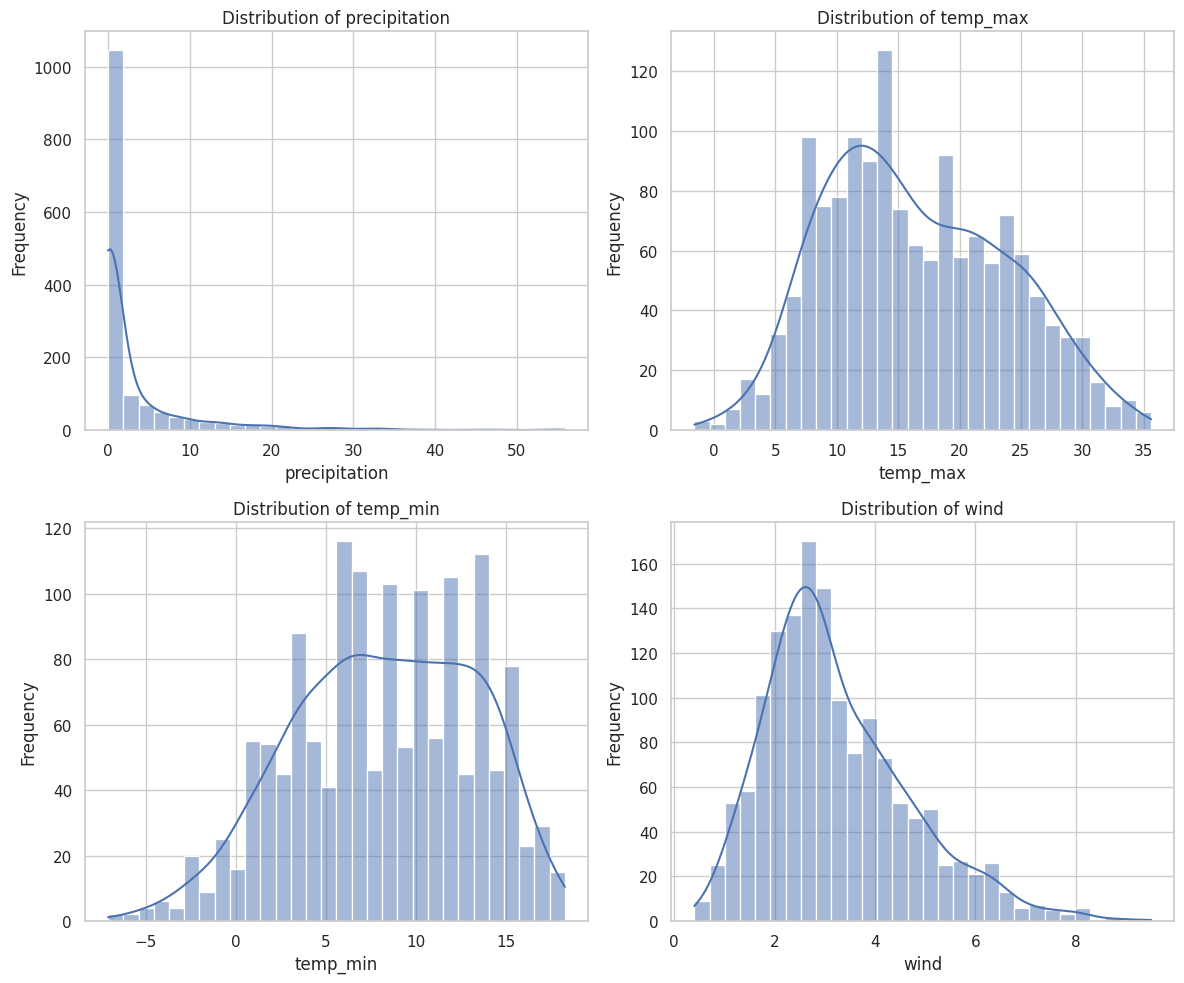

In [ ]:
# Write your code here
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn often creates more aesthetically pleasing plots

# --- Visualize Distributions (Histograms) ---

# Define the numerical columns to plot
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Visualizing Distributions (Histograms)...")

    # Check which of the expected columns are actually available
    available_cols = [col for col in numerical_cols if col in df.columns]

    if not available_cols:
        print("\nError: None of the expected numerical columns found in the DataFrame.")
        print("Cannot generate histograms.")
    else:
        if len(available_cols) < len(numerical_cols):
             print(f"\nWarning: Plotting histograms only for available columns: {available_cols}")

        # Determine the layout of subplots (e.g., 2x2)
        n_cols_plot = 2
        n_rows_plot = (len(available_cols) + n_cols_plot - 1) // n_cols_plot # Calculate needed rows

        # Create the figure and axes objects for the subplots
        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(6 * n_cols_plot, 5 * n_rows_plot))

        # Flatten the axes array for easy iteration, even if it's 1D or 2D
        axes = axes.flatten()

        print("\nGenerating histograms:")

        # Loop through the available numerical columns and create a histogram for each
        for i, col in enumerate(available_cols):
            try:
                # Use Seaborn's histplot for better aesthetics and KDE curve option
                sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i]) # 'bins=30' is a reasonable start
                axes[i].set_title(f'Distribution of {col}')
                axes[i].set_xlabel(col) # Set x-axis label
                axes[i].set_ylabel('Frequency') # Set y-axis label
                print(f"- Plotting histogram for '{col}'...")

            except Exception as e:
                print(f"\nError plotting histogram for column '{col}': {e}")
                axes[i].set_title(f'Error Plotting {col}') # Indicate error on the plot

        # Hide any unused subplots if the number of plots isn't a perfect fit for the grid
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j]) # or axes[j].set_visible(False)

        # Adjust layout to prevent overlapping titles/labels
        plt.tight_layout()
        # Display the plots
        plt.show()

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot visualize distributions. Please ensure the dataset was loaded successfully first.")

#### Visualize Time Series Trends:
Plot the values of each of the four features over time. Assume the row index represents the time step. Use different subplots for each feature for clarity.


>>> Visualizing Time Series Trends...
Using row index as the time axis.

Generating time series plots:
- Plotting trend for 'precipitation'...
- Plotting trend for 'temp_max'...
- Plotting trend for 'temp_min'...
- Plotting trend for 'wind'...


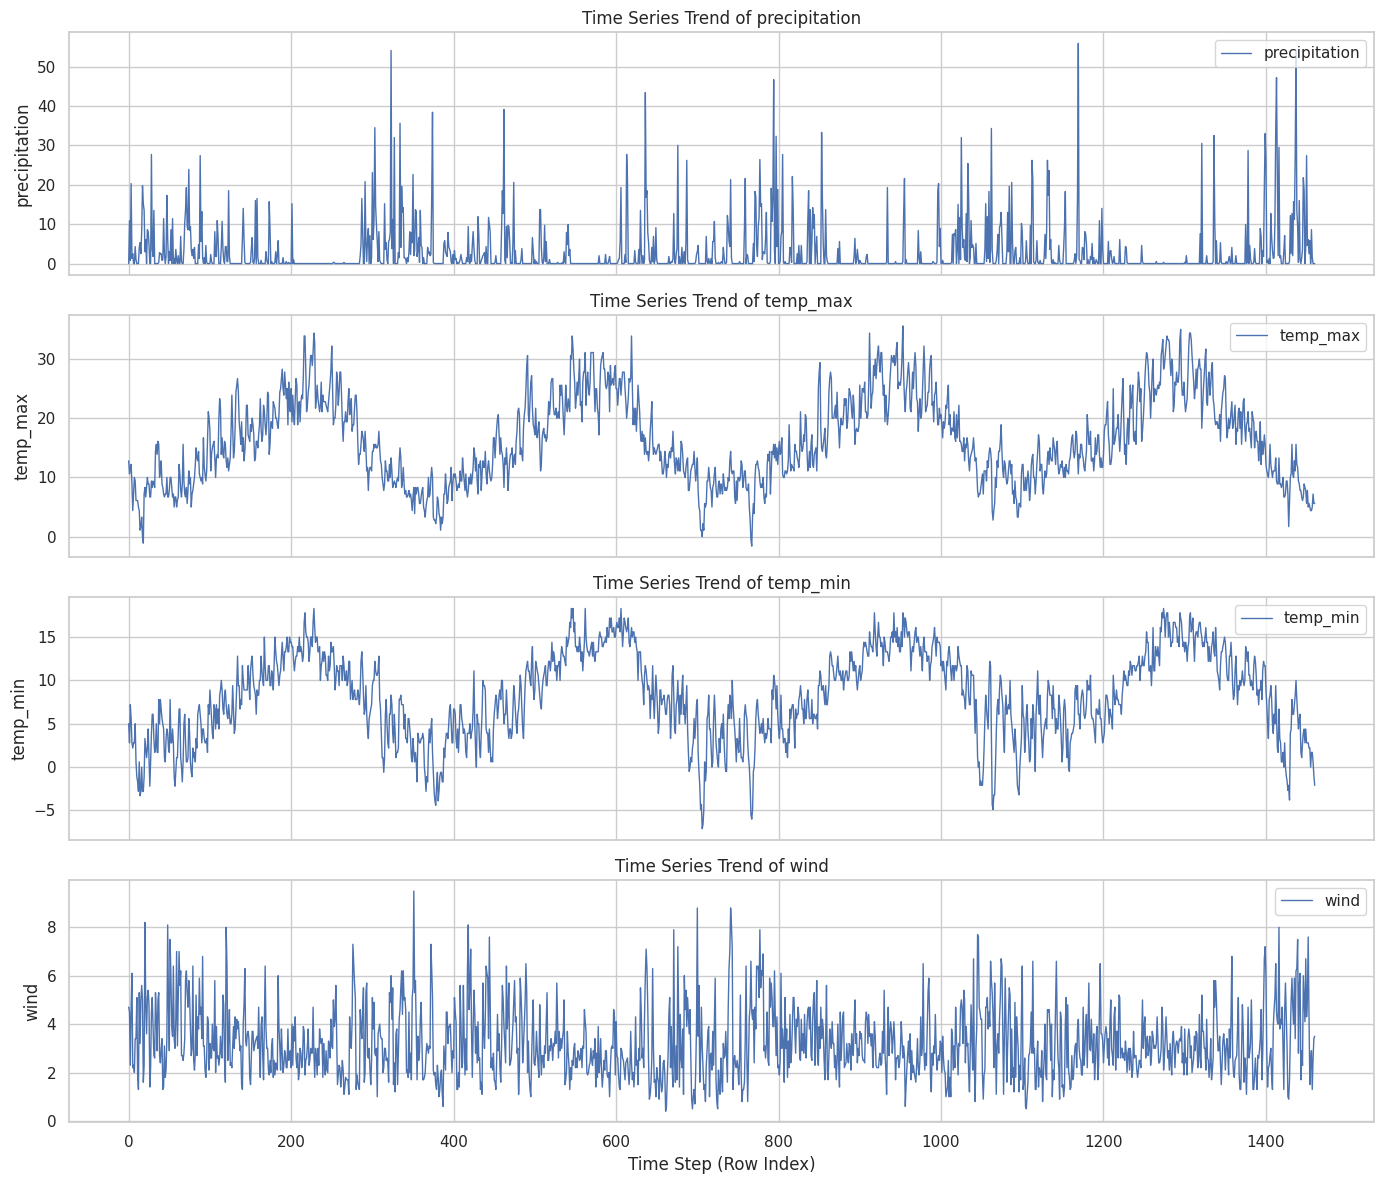

In [ ]:
# Write your code here
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported
import numpy as np  # Ensure numpy is imported

# --- Visualize Time Series Trends ---

# Define the numerical columns to plot
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Visualizing Time Series Trends...")

    # Check which of the expected columns are actually available
    available_cols = [col for col in numerical_cols if col in df.columns]

    if not available_cols:
        print("\nError: None of the expected numerical columns found.")
        print("Cannot plot time series trends.")
    else:
        if len(available_cols) < len(numerical_cols):
             print(f"\nWarning: Plotting trends only for available columns: {available_cols}")

        num_features_to_plot = len(available_cols)

        # --- Determine Time Axis ---
        # Option 1: Use 'date' column if it exists and is datetime type
        if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
             # Ensure data is sorted by date for plotting
             # Create a copy to avoid modifying the original df unless intended
             df_sorted = df.sort_values('date').copy()
             time_axis = df_sorted['date']
             xlabel = 'Date'
             print("Using 'date' column (sorted) as the time axis.")
        # Option 2: Use the default row index if 'date' is not suitable
        else:
             time_axis = df.index # Or np.arange(len(df))
             xlabel = 'Time Step (Row Index)'
             df_sorted = df # Use the original df if not sorting by date
             print("Using row index as the time axis.")


        # --- Create Subplots ---
        # Create one subplot for each feature, stacked vertically
        fig, axes = plt.subplots(num_features_to_plot, 1,
                                 figsize=(14, num_features_to_plot * 3), # Adjust height based on # features
                                 sharex=True) # Share the x-axis (time) for easier comparison

        # If there's only one feature, axes might not be an array, make it iterable
        if num_features_to_plot == 1:
            axes = [axes]

        print("\nGenerating time series plots:")

        # --- Plot Each Feature ---
        for i, col in enumerate(available_cols):
            try:
                axes[i].plot(time_axis, df_sorted[col], label=col, linewidth=1) # Use thinner line for clarity
                axes[i].set_title(f'Time Series Trend of {col}')
                axes[i].set_ylabel(col) # Label the y-axis with the feature name
                axes[i].legend(loc='upper right') # Add a legend
                axes[i].grid(True) # Add grid lines
                print(f"- Plotting trend for '{col}'...")

            except Exception as e:
                print(f"\nError plotting trend for column '{col}': {e}")
                axes[i].set_title(f'Error Plotting {col}')

        # Set the x-axis label only on the bottom-most subplot
        axes[-1].set_xlabel(xlabel)

        # Adjust layout
        plt.tight_layout()
        # Display the plots
        plt.show()

else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot visualize time series trends. Please ensure the dataset was loaded successfully first.")

#### Visualize Potential Outliers (Box Plots):
Create box plots for each numerical column to visualize potential outliers.


>>> Visualizing Potential Outliers (Box Plots)...

Generating box plots:


<ipython-input-29-774fbc2b5780>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Added palette
<ipython-input-29-774fbc2b5780>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Added palette


- Plotting box plot for 'precipitation'...
- Plotting box plot for 'temp_max'...
- Plotting box plot for 'temp_min'...


<ipython-input-29-774fbc2b5780>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Added palette
<ipython-input-29-774fbc2b5780>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Added palette


- Plotting box plot for 'wind'...


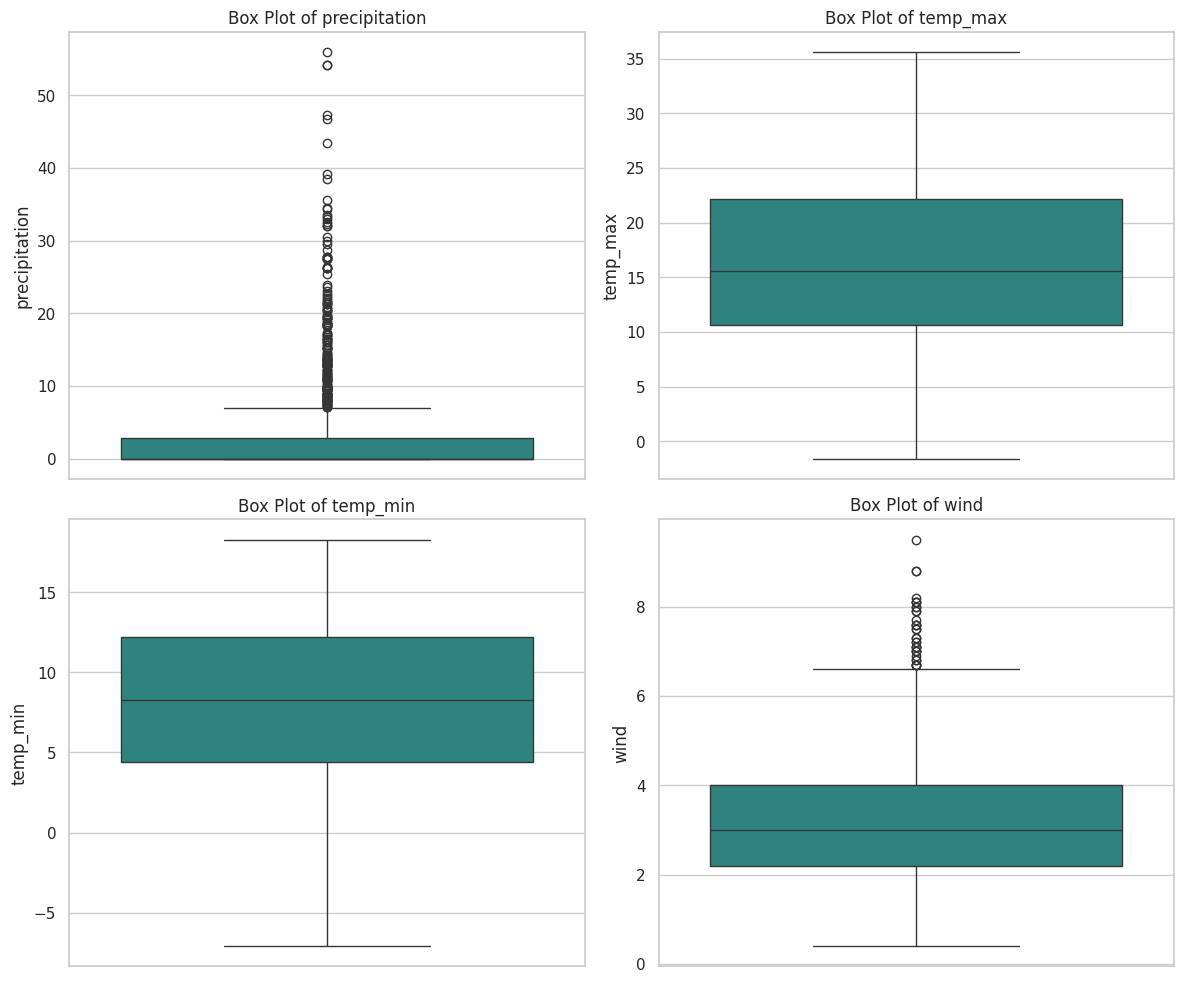


Interpretation of Box Plots:
- The box represents the Interquartile Range (IQR) - from the 25th percentile (Q1) to the 75th percentile (Q3).
- The line inside the box is the Median (50th percentile).
- The 'whiskers' typically extend to 1.5 times the IQR from the box edges (or to the min/max if within that range).
- Points plotted individually beyond the whiskers are potential outliers.


In [ ]:
# Write your code here
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is great for statistical plots like boxplots

# --- Visualize Potential Outliers (Box Plots) ---

# Define the numerical columns to plot
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Visualizing Potential Outliers (Box Plots)...")

    # Check which of the expected columns are actually available
    available_cols = [col for col in numerical_cols if col in df.columns]

    if not available_cols:
        print("\nError: None of the expected numerical columns found.")
        print("Cannot generate box plots.")
    else:
        if len(available_cols) < len(numerical_cols):
             print(f"\nWarning: Plotting box plots only for available columns: {available_cols}")

        # Determine the layout of subplots (e.g., 2x2)
        n_cols_plot = 2
        n_rows_plot = (len(available_cols) + n_cols_plot - 1) // n_cols_plot

        # Create the figure and axes objects
        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(6 * n_cols_plot, 5 * n_rows_plot))
        # Flatten the axes array for easy iteration
        axes = axes.flatten()

        print("\nGenerating box plots:")

        # Loop through the available numerical columns and create a box plot for each
        for i, col in enumerate(available_cols):
            try:
                # Use Seaborn's boxplot function
                # Plotting on y-axis makes comparison of spread easier when stacked
                sns.boxplot(y=df[col], ax=axes[i], palette="viridis") # Added palette
                axes[i].set_title(f'Box Plot of {col}')
                # The y-axis label is automatically set by seaborn based on the 'y' parameter
                # axes[i].set_ylabel(col) # Usually not needed when using y=
                axes[i].set_xlabel('') # Remove default x-axis label if not meaningful
                print(f"- Plotting box plot for '{col}'...")

            except Exception as e:
                print(f"\nError plotting box plot for column '{col}': {e}")
                axes[i].set_title(f'Error Plotting {col}')

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout and display
        plt.tight_layout()
        plt.show()

        print("\nInterpretation of Box Plots:")
        print("- The box represents the Interquartile Range (IQR) - from the 25th percentile (Q1) to the 75th percentile (Q3).")
        print("- The line inside the box is the Median (50th percentile).")
        print("- The 'whiskers' typically extend to 1.5 times the IQR from the box edges (or to the min/max if within that range).")
        print("- Points plotted individually beyond the whiskers are potential outliers.")


else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot visualize outliers. Please ensure the dataset was loaded successfully first.")

#### Calculate Feature Correlation:
Calculate the pairwise correlation of columns using the Pearson correlation coefficient.

In [ ]:
# Write your code here
# --- Calculate Feature Correlation ---

# Define the numerical columns for correlation analysis
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Check if the DataFrame 'df' exists and was loaded successfully
if 'df' in locals() and df is not None:
    print("\n>>> Calculating Feature Correlation (Pearson)...")

    # Check which of the expected numerical columns are actually available
    available_cols = [col for col in numerical_cols if col in df.columns]

    # Need at least two columns to calculate pairwise correlation
    if len(available_cols) < 2:
        print(f"\nError: Need at least two numerical columns for pairwise correlation.")
        print(f"Found only: {available_cols}")
        correlation_matrix = None # Set to None to indicate failure
    else:
        if len(available_cols) < len(numerical_cols):
             print(f"\nWarning: Calculating correlation only for available columns: {available_cols}")

        # Select only the available numerical columns
        df_for_corr = df[available_cols]

        try:
            # Calculate the pairwise Pearson correlation matrix
            # The .corr() method computes pairwise correlation of columns
            # method='pearson' is the default, but explicitly stated here for clarity
            correlation_matrix = df_for_corr.corr(method='pearson')

            print("\nPairwise Pearson Correlation Matrix:")
            # Display the resulting correlation matrix
            # Use display() for better formatting in notebooks if available
            try:
                display(correlation_matrix)
            except NameError:
                print(correlation_matrix)

            print("\nInterpretation:")
            print("- Values range from -1 to +1.")
            print("- +1 indicates a perfect positive linear correlation.")
            print("- -1 indicates a perfect negative linear correlation.")
            print("- 0 indicates no linear correlation.")
            print("- Values close to +1 or -1 suggest a strong linear relationship.")
            print("- Values close to 0 suggest a weak or non-existent linear relationship.")
            print("- Note: Correlation measures *linear* relationships only.")


        except Exception as e:
            print(f"\nAn error occurred while calculating the correlation matrix: {e}")
            print("Please ensure the selected columns contain valid numerical data.")
            correlation_matrix = None # Indicate failure


else:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot calculate feature correlation. Please ensure the dataset was loaded successfully first.")
    correlation_matrix = None # Indicate failure

# Optional: Check if the matrix was created for later use (e.g., heatmap)
# if 'correlation_matrix' in locals() and correlation_matrix is not None:
#      print("\nCorrelation matrix calculated successfully.")


>>> Calculating Feature Correlation (Pearson)...

Pairwise Pearson Correlation Matrix:


precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


Interpretation:
- Values range from -1 to +1.
- +1 indicates a perfect positive linear correlation.
- -1 indicates a perfect negative linear correlation.
- 0 indicates no linear correlation.
- Values close to +1 or -1 suggest a strong linear relationship.
- Values close to 0 suggest a weak or non-existent linear relationship.
- Note: Correlation measures *linear* relationships only.


#### Visualize Feature Correlation (Heatmap):
Visualize the correlation matrix using a heatmap. Add annotations to show the correlation values.


>>> Visualizing Feature Correlation (Heatmap)...


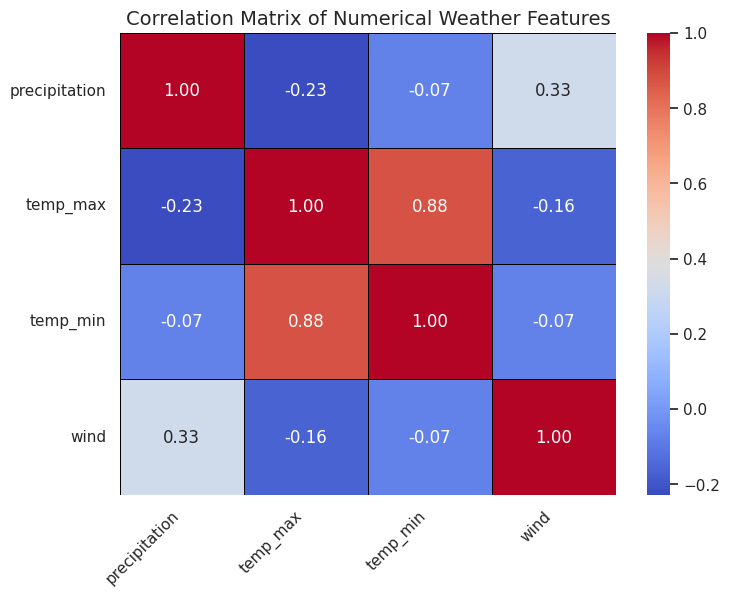

In [ ]:
# Write your code here
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is excellent for heatmaps

# --- Visualize Feature Correlation (Heatmap) ---

# Check if the correlation matrix was calculated successfully in the previous step
# Also check if df exists, as correlation_matrix might exist from a previous run even if df failed this time
if 'correlation_matrix' in locals() and correlation_matrix is not None and 'df' in locals() and df is not None:
    print("\n>>> Visualizing Feature Correlation (Heatmap)...")

    # Set the figure size for better readability
    plt.figure(figsize=(8, 6)) # Adjust size as needed (width, height)

    # Create the heatmap using Seaborn
    sns.heatmap(
        correlation_matrix, # The correlation matrix calculated previously
        annot=True,         # Display the correlation values (annotations) on the heatmap squares
        cmap='coolwarm',    # Choose a diverging colormap (good for correlation: blue=negative, red=positive)
                            # Other options: 'viridis', 'plasma', 'RdBu_r', 'BrBG', etc.
        fmt=".2f",          # Format the annotation numbers to 2 decimal places
        linewidths=.5,      # Add lines between cells for better separation
        linecolor='black'   # Color of the lines between cells
    )

    # Add a title to the plot
    plt.title('Correlation Matrix of Numerical Weather Features', fontsize=14)

    # Ensure labels are fully visible (especially if rotated)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if needed
    plt.yticks(rotation=0) # Keep y-axis labels horizontal

    # Display the plot
    plt.show()

elif 'df' not in locals() or df is None:
    # Print an error message if the DataFrame is not available
    print("\nError: DataFrame 'df' not available.")
    print("Cannot visualize correlation. Please ensure the dataset was loaded successfully first.")

else:
    # Print a message if the correlation matrix wasn't calculated
    print("\nError: Correlation matrix ('correlation_matrix') not found or is None.")
    print("Please ensure the 'Calculate Feature Correlation' step ran successfully first.")

## Part 2: Single-Step Future Prediction Models

Objective: Build, train, and evaluate multiple RNN models using Keras to predict a single value one time step into the future, using a sequence of past observations from all four weather features.

#### General Instructions:

Assume a lookback_window of 10 time steps for creating sequences unless otherwise specified. This means each input sample X will be a sequence of 10 past data points (each point having 4 features), and the corresponding output y will be the value(s) at the 11th time step.

Use appropriate scaling (e.g., MinMaxScaler or StandardScaler) on the data before creating sequences. Remember to scale your target variable(s) as well if they are numerical.

Split your data into training and testing sets while preserving the time order. A common split is 80% for training and 20% for testing. Ensure your splitting method does not shuffle the data.

Use Keras with a TensorFlow backend to build your RNN models. You can experiment with SimpleRNN, GRU, or LSTM layers.

### Model 1: Predict single precipitation value in future

#### Data Preparation for Precipitation Prediction:

Prepare the data for training an RNN model to predict the single future precipitation value.

Scale the relevant features (precipitation, temp_max, temp_min, wind) using a suitable scaler.

Create input sequences (X) of length lookback_window (10) using the scaled features.

Create the corresponding output array (y) containing the single scaled future precipitation value for each sequence.

Split the sequence data (X, y) into training and testing sets chronologically.

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Part 2: Single-Step Future Prediction Models ---

print("\n--- Part 2: Single-Step Future Prediction Models ---")

# --- Model 1: Predict single precipitation value in future ---
print("\n>>> Model 1: Preparing Data for Precipitation Prediction...")

# --- Configuration (Define constants or ensure they are inherited) ---
# Making sure necessary constants are defined/accessible here
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'N_FEATURES' not in locals(): N_FEATURES = len(FEATURES)
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'TEST_SPLIT_RATIO' not in locals(): TEST_SPLIT_RATIO = 0.2

TARGET_FEATURE_PRECIP = 'precipitation'
print(f"Target Feature: '{TARGET_FEATURE_PRECIP}'")
print(f"Lookback Window: {LOOKBACK_WINDOW}")
print(f"Input Features: {FEATURES}")

# --- Helper Function: Create Sequences (Single-Step) ---
# (Ensure this function is defined, copy if needed from Part 2 intro)
def create_sequences(input_data, target_data, lookback):
    """ Creates sequences for single-step RNN training. """
    X, y = [], []
    if target_data.ndim == 1:
        target_data = target_data.reshape(-1, 1) # Ensure target is 2D
    if len(input_data) <= lookback:
        print(f"Warning: Data length ({len(input_data)}) too short for lookback {lookback}.")
        return np.array(X), np.array(y)
    # Iterate up to the point where a full lookback and one future step are available
    for i in range(len(input_data) - lookback):
        X.append(input_data[i:(i + lookback)])
        # Target is the single value at the step immediately after the lookback window
        y.append(target_data[i + lookback])
    return np.array(X), np.array(y)


# --- Data Preparation Steps ---
# Initialize variables to None for safety checks later
X_train_p, y_train_p, X_test_p, y_test_p, scaler_precip = None, None, None, None, None
data_prep_success_p = False

# Check if the main DataFrame 'df' exists
if 'df' in locals() and df is not None:
    # Check if all required features exist in the DataFrame
    if all(f in df.columns for f in FEATURES):
        try:
            print("\n--- 1. Selecting and Splitting Data ---")
            # Select relevant features and convert to NumPy array for scaling
            data_for_scaling = df[FEATURES].astype(np.float32).values

            # Calculate split point based on the ratio
            n_samples_total = len(data_for_scaling)
            split_index = int(n_samples_total * (1 - TEST_SPLIT_RATIO))
            print(f"Total samples: {n_samples_total}, Training samples: {split_index}, Testing samples: {n_samples_total - split_index}")

            # Split data chronologically *before* scaling
            train_data = data_for_scaling[:split_index]
            test_data = data_for_scaling[split_index:]

            print(f"Raw train_data shape: {train_data.shape}")
            print(f"Raw test_data shape: {test_data.shape}")

            print("\n--- 2. Scaling Data ---")
            # Initialize the scaler (MinMaxScaler scales to [0, 1])
            scaler_precip = MinMaxScaler(feature_range=(0, 1))

            # Fit the scaler ONLY on the training data to avoid data leakage
            scaled_train_data = scaler_precip.fit_transform(train_data)

            # Transform the test data using the SAME fitted scaler
            scaled_test_data = scaler_precip.transform(test_data)
            print("Data scaled using MinMaxScaler (fit on train data).")
            print(f"Scaled train_data shape: {scaled_train_data.shape}")
            print(f"Scaled test_data shape: {scaled_test_data.shape}")

            # Identify the index of the target feature *within the scaled array*
            try:
                target_col_index_precip = FEATURES.index(TARGET_FEATURE_PRECIP)
                print(f"Index of target feature '{TARGET_FEATURE_PRECIP}' in scaled data: {target_col_index_precip}")
            except ValueError:
                 raise ValueError(f"Target feature '{TARGET_FEATURE_PRECIP}' not found in FEATURES list: {FEATURES}")

            print("\n--- 3. Creating Input/Output Sequences ---")
            # Create sequences for training
            # Input (X): sequences of shape (lookback, n_features) from scaled_train_data
            # Output (y): the single scaled precipitation value at the step after the lookback window
            X_train_p, y_train_p = create_sequences(
                input_data=scaled_train_data,
                target_data=scaled_train_data[:, target_col_index_precip], # Target is the scaled precip column
                lookback=LOOKBACK_WINDOW
            )

            # Create sequences for testing
            X_test_p, y_test_p = create_sequences(
                input_data=scaled_test_data,
                target_data=scaled_test_data[:, target_col_index_precip], # Target is the scaled precip column
                lookback=LOOKBACK_WINDOW
            )

            # Verify shapes
            if X_train_p.size == 0 or X_test_p.size == 0:
                raise ValueError("Sequence creation resulted in empty arrays. Check data length and lookback window.")

            print("\nShapes after creating sequences:")
            print(f"X_train_p shape: {X_train_p.shape}") # Expected: (num_train_sequences, LOOKBACK_WINDOW, N_FEATURES)
            print(f"y_train_p shape: {y_train_p.shape}") # Expected: (num_train_sequences, 1)
            print(f"X_test_p shape: {X_test_p.shape}")   # Expected: (num_test_sequences, LOOKBACK_WINDOW, N_FEATURES)
            print(f"y_test_p shape: {y_test_p.shape}")   # Expected: (num_test_sequences, 1)

            # Data preparation is successful if we reach here
            data_prep_success_p = True
            print("\nData preparation for Model 1 (Precipitation) completed successfully.")

        except Exception as e:
            print(f"\nAn error occurred during data preparation for Model 1: {e}")
            # Reset variables on error
            X_train_p, y_train_p, X_test_p, y_test_p, scaler_precip = None, None, None, None, None
    else:
        missing_required = [f for f in FEATURES if f not in df.columns]
        print(f"\nError: DataFrame 'df' is missing required features: {missing_required}")
else:
    print("\nError: DataFrame 'df' not available or not loaded successfully.")
    print("Cannot prepare data for Model 1.")


# --- Optional: Check results ---
# if data_prep_success_p:
#     print("\nFirst training sequence (X_train_p[0]):\n", X_train_p[0])
#     print("\nFirst training target (y_train_p[0]):\n", y_train_p[0])
# else:
#     print("\nData preparation failed, cannot show sequence examples.")


--- Part 2: Single-Step Future Prediction Models ---

>>> Model 1: Preparing Data for Precipitation Prediction...
Target Feature: 'precipitation'
Lookback Window: 10
Input Features: ['precipitation', 'temp_max', 'temp_min', 'wind']

--- 1. Selecting and Splitting Data ---
Total samples: 1461, Training samples: 1168, Testing samples: 293
Raw train_data shape: (1168, 4)
Raw test_data shape: (293, 4)

--- 2. Scaling Data ---
Data scaled using MinMaxScaler (fit on train data).
Scaled train_data shape: (1168, 4)
Scaled test_data shape: (293, 4)
Index of target feature 'precipitation' in scaled data: 0

--- 3. Creating Input/Output Sequences ---

Shapes after creating sequences:
X_train_p shape: (1158, 10, 4)
y_train_p shape: (1158, 1)
X_test_p shape: (283, 10, 4)
y_test_p shape: (283, 1)

Data preparation for Model 1 (Precipitation) completed successfully.


#### Build RNN Model for Precipitation:
Design and implement a Keras Sequential model using RNN layers (e.g., LSTM or GRU) specifically for predicting a single future precipitation value.

Define the input shape based on your sequences (lookback_window, number of features).

Add one or more RNN layers.

Add a Dense output layer with 1 unit and an appropriate activation function (or none, for regression).

Print the model summary.

In [ ]:
# Write your code here
# Import necessary Keras layers if not already imported at the top
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout # Added GRU, Dropout as options

# --- Build RNN Model for Precipitation ---

print("\n>>> Building RNN Model for Precipitation Prediction (Model 1)...")

# Initialize model variable to None
model_precip = None
model_built_success_p = False

# Proceed only if data preparation was successful and produced valid shapes
if 'data_prep_success_p' in locals() and data_prep_success_p:
    if X_train_p is not None and X_train_p.shape[1] == LOOKBACK_WINDOW and X_train_p.shape[2] == N_FEATURES:
        try:
            # 1. Define the Model Architecture using Keras Sequential API
            model_precip = Sequential(name="Precipitation_Prediction_LSTM") # Give the model a name

            # --- Add RNN Layer(s) ---
            # Option 1: Single LSTM Layer (Common starting point)
            model_precip.add(LSTM(
                units=50,  # Number of LSTM units (neurons) in the layer - a hyperparameter to tune
                input_shape=(LOOKBACK_WINDOW, N_FEATURES), # Crucial: (timesteps, features_per_timestep)
                # return_sequences=False # Default is False - only output the last timestep's hidden state
                                        # Set to True if stacking multiple LSTM layers
                name='LSTM_Layer_1'
            ))

            # Option 2: Stacked LSTM Layers (Example)
            # If stacking, the previous layer needs return_sequences=True
            # model_precip.add(LSTM(units=64, input_shape=(LOOKBACK_WINDOW, N_FEATURES), return_sequences=True, name='LSTM_Layer_1'))
            # model_precip.add(LSTM(units=32, return_sequences=False, name='LSTM_Layer_2')) # Last LSTM layer doesn't return sequences

            # Option 3: GRU Layer (Often similar performance to LSTM, sometimes faster)
            # model_precip.add(GRU(units=50, input_shape=(LOOKBACK_WINDOW, N_FEATURES), name='GRU_Layer_1'))

            # --- Optional: Add Dropout for Regularization ---
            # Helps prevent overfitting by randomly setting a fraction of input units to 0 during training
            # model_precip.add(Dropout(0.2, name='Dropout_Layer')) # e.g., dropout 20%

            # --- Add Dense Output Layer ---
            # For single-step regression, we need one output neuron.
            model_precip.add(Dense(
                units=1,        # One output neuron for the single precipitation value
                activation=None # Or 'linear'. No activation function needed for standard regression output.
                                # Using 'relu' might constrain output > 0, 'sigmoid' constrains to [0, 1] (useful if target is scaled 0-1)
                                # Since precipitation can be 0, 'linear' (or None) is generally safest unless you specifically scaled target to [0,1] AND want model to respect that bound.
                , name='Output_Layer'
            ))

            # 3. Print the Model Summary
            print("\nModel Summary:")
            model_precip.summary() # Displays layers, output shapes, and number of parameters

            model_built_success_p = True
            print("\nRNN Model for Precipitation built successfully.")

        except Exception as e:
            print(f"\nAn error occurred during model building: {e}")
            model_precip = None # Ensure model is None on error

    else:
        print("\nError: Training data (X_train_p) not available or has incorrect shape.")
        print(f"Expected shape: (*, {LOOKBACK_WINDOW}, {N_FEATURES})")
        if X_train_p is not None:
            print(f"Actual shape: {X_train_p.shape}")
else:
    print("\nSkipping model building because data preparation was not successful.")

# --- Check if model building succeeded ---
# if model_built_success_p:
#     print("\nModel is ready for compilation and training.")
# else:
#      print("\nModel building failed.")


>>> Building RNN Model for Precipitation Prediction (Model 1)...

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Precipitation_Prediction_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer_1 (LSTM)             │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)


RNN Model for Precipitation built successfully.


#### Compile and Train Model 1:
Compile the precipitation prediction model.

Choose a suitable optimizer (e.g., 'adam').

Choose an appropriate loss function for regression (e.g., 'mean_squared_error').

Add relevant metrics (e.g., 'mean_absolute_error'). Train the model using your prepared training data for a reasonable number of epochs and batch size.


>>> Compiling and Training Model 1 (Precipitation)...
Training parameters: Epochs=30, Batch Size=32

Compiling model...
Model compiled successfully.

Starting training for 30 epochs...
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0953 - val_loss: 0.0184 - val_mean_absolute_error: 0.0581
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0671 - val_loss: 0.0168 - val_mean_absolute_error: 0.0780
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0691 - val_loss: 0.0161 - val_mean_absolute_error: 0.0684
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0671 - val_loss: 0.0157 - val_mean_absolute_error: 0.0687
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0662 - val_loss: 0.0155 - val_mean_absolute_error: 0.0673
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0117 - me

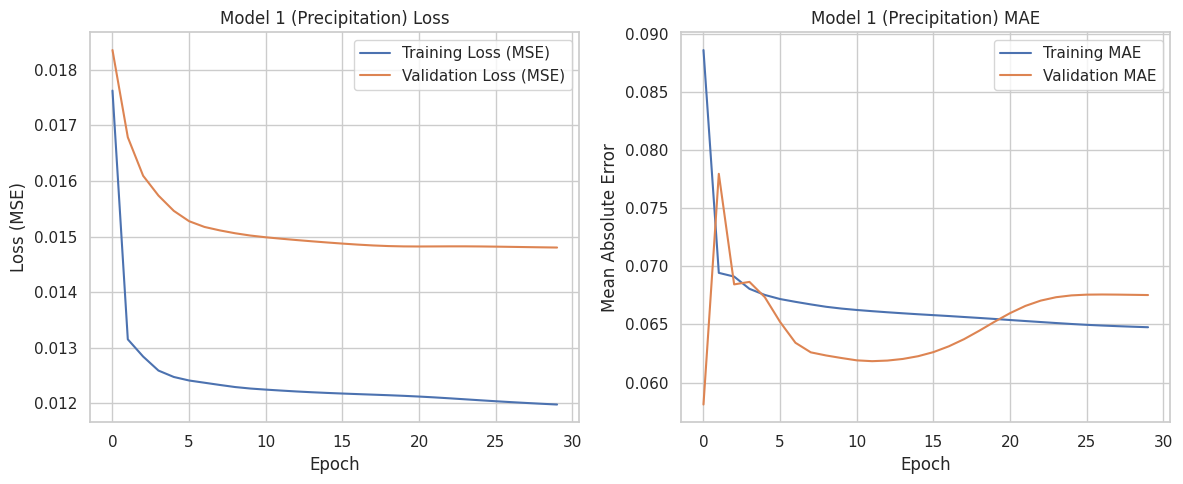

In [ ]:
# Write your code here
# Import necessary components if not already imported
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt # For plotting history

# --- Compile and Train Model 1 (Precipitation) ---

print("\n>>> Compiling and Training Model 1 (Precipitation)...")

# Initialize history variable
history_precip = None
training_success_p = False

# Proceed only if the model was built and data is ready
if ('model_built_success_p' in locals() and model_built_success_p and
    'data_prep_success_p' in locals() and data_prep_success_p):

    if model_precip is not None and X_train_p is not None and y_train_p is not None and X_test_p is not None and y_test_p is not None:
        try:
            # --- Define Training Parameters ---
            # EPOCHS_SINGLE and BATCH_SIZE should be defined earlier, e.g., in configuration section
            if 'EPOCHS_SINGLE' not in locals(): EPOCHS_SINGLE = 30 # Default if not defined
            if 'BATCH_SIZE' not in locals(): BATCH_SIZE = 32 # Default if not defined
            print(f"Training parameters: Epochs={EPOCHS_SINGLE}, Batch Size={BATCH_SIZE}")

            # --- 1. Compile the Model ---
            print("\nCompiling model...")
            # Choose optimizer: Adam is a popular and generally effective choice
            optimizer = Adam(learning_rate=0.001) # Can adjust learning_rate

            # Choose loss function: Mean Squared Error (MSE) is standard for regression
            loss_function = 'mean_squared_error' # or tf.keras.losses.MeanSquaredError()

            # Choose metrics: Mean Absolute Error (MAE) is often useful for interpretability
            metrics_to_track = ['mean_absolute_error'] # or [tf.keras.metrics.MeanAbsoluteError()]

            model_precip.compile(
                optimizer=optimizer,
                loss=loss_function,
                metrics=metrics_to_track
            )
            print("Model compiled successfully.")

            # --- 2. Train the Model ---
            print(f"\nStarting training for {EPOCHS_SINGLE} epochs...")
            # Use model.fit() to train the model
            history_precip = model_precip.fit(
                X_train_p, y_train_p,             # Training data (input sequences, target values)
                epochs=EPOCHS_SINGLE,             # Number of passes through the entire training dataset
                batch_size=BATCH_SIZE,            # Number of samples per gradient update
                validation_data=(X_test_p, y_test_p), # Data to evaluate loss and metrics on after each epoch
                shuffle=False,                    # CRITICAL: Do NOT shuffle time series data!
                verbose=1                         # Show progress bar (1=progress bar, 2=one line per epoch, 0=silent)
            )
            print("\nTraining completed.")
            training_success_p = True

            # --- 3. Plot Training History (Optional but Recommended) ---
            print("\nPlotting training history (Loss and MAE)...")
            if history_precip is not None and history_precip.history:
                 plt.figure(figsize=(12, 5))

                 # Plot Loss (MSE)
                 plt.subplot(1, 2, 1)
                 plt.plot(history_precip.history['loss'], label='Training Loss (MSE)')
                 plt.plot(history_precip.history['val_loss'], label='Validation Loss (MSE)')
                 plt.title('Model 1 (Precipitation) Loss')
                 plt.xlabel('Epoch')
                 plt.ylabel('Loss (MSE)')
                 plt.legend()
                 plt.grid(True)

                 # Plot Metric (MAE)
                 plt.subplot(1, 2, 2)
                 plt.plot(history_precip.history['mean_absolute_error'], label='Training MAE')
                 plt.plot(history_precip.history['val_mean_absolute_error'], label='Validation MAE')
                 plt.title('Model 1 (Precipitation) MAE')
                 plt.xlabel('Epoch')
                 plt.ylabel('Mean Absolute Error')
                 plt.legend()
                 plt.grid(True)

                 plt.tight_layout()
                 plt.show()
            else:
                 print("Could not plot history: History object is empty or None.")

        except Exception as e:
            print(f"\nAn error occurred during model compilation or training: {e}")
            history_precip = None # Ensure history is None on error

    else:
        print("\nError: Model or prepared data (X/y train/test) is not available or None.")
else:
    print("\nSkipping model compilation and training because model building or data preparation failed.")


# --- Check if training succeeded ---
# if training_success_p:
#      print("\nModel training completed. History is available in 'history_precip'.")
# else:
#      print("\nModel training failed or was skipped.")

#### Evaluate Model 1 Performance:
Evaluate the trained precipitation prediction model on the test dataset.

Report the loss (MSE) and the MAE on the test set.

Calculate and report the Root Mean Squared Error (RMSE) on the test set.

In [ ]:
# Write your code here
import numpy as np # Ensure numpy is imported for sqrt
import math      # Alternative for sqrt

# --- Evaluate Model 1 Performance ---

print("\n>>> Evaluating Model 1 Performance on Test Set...")

# Initialize metrics dictionary with NaNs for robustness
model1_metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
evaluation_success_p = False

# Proceed only if training was marked successful and test data/model exist
if ('training_success_p' in locals() and training_success_p and
    'model_precip' in locals() and model_precip is not None and
    'X_test_p' in locals() and X_test_p is not None and
    'y_test_p' in locals() and y_test_p is not None):

    try:
        # 1. Evaluate the model using the test dataset
        # model.evaluate() returns the loss value and metric values
        # for the model in test mode.
        print("Evaluating model on the test data...")
        results_precip = model_precip.evaluate(X_test_p, y_test_p, verbose=0) # verbose=0 prevents printing progress bar here

        # 2. Extract Loss (MSE) and MAE
        # The order matches the order in model.compile() -> [loss, metric1, metric2, ...]
        mse_precip = results_precip[0] # First element is always the loss
        mae_precip = results_precip[1] # Second element is the first metric ('mean_absolute_error')

        # 3. Calculate RMSE
        # RMSE is the square root of the MSE
        rmse_precip = math.sqrt(mse_precip)
        # Alternatively using numpy: rmse_precip = np.sqrt(mse_precip)

        # 4. Report the metrics
        print("\n--- Model 1 Performance Metrics (Test Set) ---")
        print(f"Test Loss (Mean Squared Error - MSE): {mse_precip:.6f}")
        print(f"Test Mean Absolute Error (MAE):       {mae_precip:.6f}")
        print(f"Test Root Mean Squared Error (RMSE):  {rmse_precip:.6f}")

        # 5. Store metrics for later comparison (Part 4)
        model1_metrics['MSE'] = mse_precip
        model1_metrics['MAE'] = mae_precip
        model1_metrics['RMSE'] = rmse_precip
        evaluation_success_p = True
        print("\nMetrics stored successfully for later comparison.")

    except Exception as e:
        print(f"\nAn error occurred during model evaluation: {e}")

else:
    print("\nSkipping model evaluation because prerequisites are not met:")
    if 'training_success_p' not in locals() or not training_success_p:
        print("- Model training was not marked as successful.")
    if 'model_precip' not in locals() or model_precip is None:
        print("- Trained model ('model_precip') is not available.")
    if 'X_test_p' not in locals() or X_test_p is None:
        print("- Test data features ('X_test_p') are not available.")
    if 'y_test_p' not in locals() or y_test_p is None:
        print("- Test data targets ('y_test_p') are not available.")


# --- Final Check ---
# if evaluation_success_p:
#      print("\nModel evaluation completed.")
# else:
#      print("\nModel evaluation failed or was skipped.")


>>> Evaluating Model 1 Performance on Test Set...
Evaluating model on the test data...

--- Model 1 Performance Metrics (Test Set) ---
Test Loss (Mean Squared Error - MSE): 0.014802
Test Mean Absolute Error (MAE):       0.067530
Test Root Mean Squared Error (RMSE):  0.121662

Metrics stored successfully for later comparison.


#### Predict and Visualize Model 1 Results:
Use the trained model to make predictions on the test set input sequences.

Inverse scale the predictions and the actual test precipitation values to return them to their original scale.

Plot the actual future precipitation values from the test set against the model's predicted future precipitation values over time (using the time index corresponding to the prediction point).


>>> Predicting and Visualizing Model 1 Results...

--- 1. Making Predictions ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Predictions generated. Shape: (283, 1)

--- 2. Inverse Scaling Predictions and Actual Values ---
Scaler was fitted on 4 features.
Index of 'precipitation' used for scaling: 0
Inverse scaling completed.
Shape of actual original values (y_test_actual_p): (283,)
Shape of predicted original values (y_pred_actual_p): (283,)

--- 3. Preparing Time Index for Plotting ---
Using original row index range for plotting.

--- 4. Plotting Actual vs. Predicted Values ---


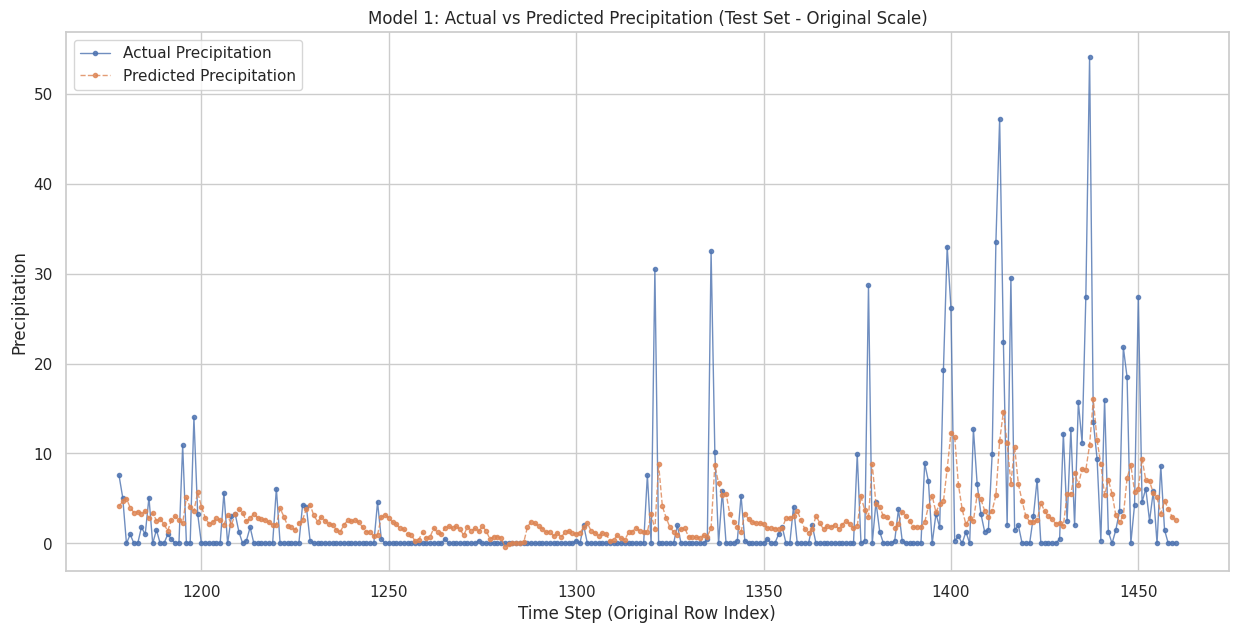


--- 5. Plotting Scatter Plot (Actual vs. Predicted) ---


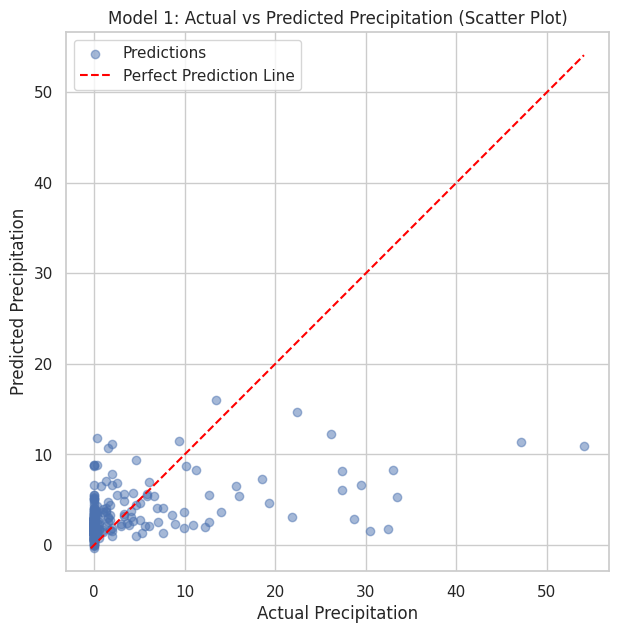

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# --- Predict and Visualize Model 1 Results ---

print("\n>>> Predicting and Visualizing Model 1 Results...")

# Initialize plot-related variables
y_pred_actual_p = None
y_test_actual_p = None
pred_time_index_p = None
visualization_success_p = False

# Check if prerequisites are met: evaluation success, model, scaler, test data, original df
if ('evaluation_success_p' in locals() and evaluation_success_p and
    'model_precip' in locals() and model_precip is not None and
    'scaler_precip' in locals() and scaler_precip is not None and
    'X_test_p' in locals() and X_test_p is not None and
    'y_test_p' in locals() and y_test_p is not None and # Scaled actuals
    'df' in locals() and df is not None): # Original df for time index

    # Also check if the scaler has been fitted (has scale_ attribute)
    if not hasattr(scaler_precip, 'scale_'):
         print("Error: Scaler 'scaler_precip' has not been fitted. Cannot inverse transform.")
    else:
        try:
            print("\n--- 1. Making Predictions ---")
            # Use model.predict() on the test input sequences (X_test_p)
            # Output will be scaled precipitation predictions
            y_pred_scaled_p = model_precip.predict(X_test_p)
            print(f"Predictions generated. Shape: {y_pred_scaled_p.shape}") # Expected: (num_test_sequences, 1)

            print("\n--- 2. Inverse Scaling Predictions and Actual Values ---")
            # The scaler was fitted on ALL features. To inverse transform a single feature,
            # we need to create a dummy array with the shape the scaler expects (samples, n_features)
            # and place our target feature predictions/actuals in the correct column.

            # Get the number of features the scaler was trained on
            n_features_scaler = scaler_precip.n_features_in_
            print(f"Scaler was fitted on {n_features_scaler} features.")

            # Find the index of precipitation in the original FEATURES list
            try:
                 target_col_index_precip = FEATURES.index(TARGET_FEATURE_PRECIP)
                 print(f"Index of '{TARGET_FEATURE_PRECIP}' used for scaling: {target_col_index_precip}")
            except ValueError:
                 raise ValueError(f"Target feature '{TARGET_FEATURE_PRECIP}' not found in FEATURES list: {FEATURES}")


            # Create dummy arrays matching scaler's expected input shape
            # Predictions
            dummy_pred = np.zeros((len(y_pred_scaled_p), n_features_scaler))
            # Ensure prediction array is flattened before assigning
            dummy_pred[:, target_col_index_precip] = y_pred_scaled_p.flatten()
            # Inverse transform the dummy array and extract the precipitation column
            y_pred_actual_p = scaler_precip.inverse_transform(dummy_pred)[:, target_col_index_precip]

            # Actual scaled test values (y_test_p)
            dummy_actual = np.zeros((len(y_test_p), n_features_scaler))
             # Ensure actual array is flattened before assigning
            dummy_actual[:, target_col_index_precip] = y_test_p.flatten()
            # Inverse transform the dummy array and extract the precipitation column
            y_test_actual_p = scaler_precip.inverse_transform(dummy_actual)[:, target_col_index_precip]

            print("Inverse scaling completed.")
            print(f"Shape of actual original values (y_test_actual_p): {y_test_actual_p.shape}")
            print(f"Shape of predicted original values (y_pred_actual_p): {y_pred_actual_p.shape}")


            print("\n--- 3. Preparing Time Index for Plotting ---")
            # Predictions correspond to the steps *after* the initial split and lookback window
            # Calculate the starting row index in the original DataFrame 'df'
            # This requires TEST_SPLIT_RATIO and LOOKBACK_WINDOW to be defined correctly
            split_index = int(len(df) * (1 - TEST_SPLIT_RATIO)) # Recalculate just in case
            start_index_pred = split_index + LOOKBACK_WINDOW
            end_index_pred = start_index_pred + len(y_test_actual_p) # End index (exclusive)

            # Use the original DataFrame's index if possible (especially if it's datetime)
            if isinstance(df.index, pd.DatetimeIndex):
                 pred_time_index_p = df.index[start_index_pred:end_index_pred]
                 xlabel_plot = 'Time / Date'
                 print("Using original DataFrame's DatetimeIndex for plotting.")
            elif 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
                  # Fallback if date is a column but not index (ensure sorted)
                  df_sorted = df.sort_values('date')
                  pred_time_index_p = df_sorted['date'].iloc[start_index_pred:end_index_pred]
                  xlabel_plot = 'Time / Date'
                  print("Using 'date' column (sorted) for plotting.")
            else:
                 # Fallback to using row numbers if no suitable date info
                 pred_time_index_p = np.arange(start_index_pred, end_index_pred)
                 xlabel_plot = 'Time Step (Original Row Index)'
                 print("Using original row index range for plotting.")

            if len(pred_time_index_p) != len(y_test_actual_p):
                 print(f"Warning: Length mismatch between time index ({len(pred_time_index_p)}) and test data ({len(y_test_actual_p)}). Check index calculation.")


            print("\n--- 4. Plotting Actual vs. Predicted Values ---")
            plt.figure(figsize=(15, 7)) # Wider plot for time series

            plt.plot(pred_time_index_p, y_test_actual_p, label='Actual Precipitation',
                     marker='.', linestyle='-', linewidth=1, alpha=0.8)
            plt.plot(pred_time_index_p, y_pred_actual_p, label='Predicted Precipitation',
                     marker='.', linestyle='--', linewidth=1, alpha=0.8)

            plt.title('Model 1: Actual vs Predicted Precipitation (Test Set - Original Scale)')
            plt.xlabel(xlabel_plot)
            plt.ylabel('Precipitation')
            plt.legend()
            plt.grid(True)
            plt.show()

            # --- Optional: Scatter Plot ---
            print("\n--- 5. Plotting Scatter Plot (Actual vs. Predicted) ---")
            plt.figure(figsize=(7, 7))
            plt.scatter(y_test_actual_p, y_pred_actual_p, alpha=0.5, label='Predictions')
            # Add a diagonal line (y=x) for reference - perfect predictions lie on this line
            min_val = min(np.min(y_test_actual_p), np.min(y_pred_actual_p))
            max_val = max(np.max(y_test_actual_p), np.max(y_pred_actual_p))
            plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')
            plt.title('Model 1: Actual vs Predicted Precipitation (Scatter Plot)')
            plt.xlabel('Actual Precipitation')
            plt.ylabel('Predicted Precipitation')
            plt.grid(True)
            plt.legend()
            plt.axis('equal') # Ensure x and y axes have the same scale for a proper diagonal
            plt.show()

            visualization_success_p = True

        except Exception as e:
            print(f"\nAn error occurred during prediction or visualization: {e}")

else:
    print("\nSkipping prediction and visualization due to missing prerequisites:")
    # Add specific checks to see what's missing
    if 'evaluation_success_p' not in locals() or not evaluation_success_p: print("- Model evaluation was not successful.")
    if 'model_precip' not in locals() or model_precip is None: print("- Trained model ('model_precip') is not available.")
    if 'scaler_precip' not in locals() or scaler_precip is None: print("- Scaler ('scaler_precip') is not available.")
    if 'X_test_p' not in locals() or X_test_p is None: print("- Test data features ('X_test_p') are not available.")
    if 'y_test_p' not in locals() or y_test_p is None: print("- Scaled test data targets ('y_test_p') are not available.")
    if 'df' not in locals() or df is None: print("- Original DataFrame ('df') is not available for time index.")


# --- Final Check ---
# if visualization_success_p:
#      print("\nPrediction and visualization completed.")
# else:
#      print("\nPrediction and visualization failed or was skipped.")

### Model 2: Predict single temp_max value in future

#### Data Preparation for temp_max Prediction:
Prepare the data similarly to Model 1, but create the output array (y) containing the single scaled future temp_max value for each sequence.

#### Build RNN Model for temp_max:
Design and implement a Keras Sequential model using RNN layers for predicting a single future temp_max value. The model architecture can be similar to Model 1, but ensure it's configured correctly for this specific output. Print the model summary.

#### Compile and Train Model 2:
Compile the temp_max prediction model using appropriate optimizer, loss function (MSE), and metrics (MAE). Train the model on the prepared training data.

#### Evaluate Model 2 Performance:
Evaluate the trained temp_max prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 2 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test temp_max values. Plot the actual vs. predicted future temp_max values over time.


>>> Running Model 2 for 'temp_max' using helper function...

==================== Running Single-Step Model for: temp_max ====================

--- 1. Data Preparation ---
Total samples: 1461, Training samples: 1168, Testing samples: 293
X_train shape: (1158, 10, 4), y_train shape: (1158, 1)
X_test shape: (283, 10, 4), y_test shape: (283, 1)

--- 2. Building LSTM Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_Single_temp_max_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)


--- 3. Compiling and Training ---
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0583 - mean_absolute_error: 0.2082 - val_loss: 0.0145 - val_mean_absolute_error: 0.0968
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0119 - mean_absolute_error: 0.0881 - val_loss: 0.0096 - val_mean_absolute_error: 0.0806
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0096 - mean_absolute_error: 0.0786 - val_loss: 0.0090 - val_mean_absolute_error: 0.0763
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0093 - mean_absolute_error: 0.0765 - val_loss: 0.0089 - val_mean_absolute_error: 0.0757
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0091 - mean_absolute_error: 0.0759 - val_loss: 0.0088 - val_mean_absolute_error: 0.0751
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0090 - mean_absolute_error: 0.0751 - val_loss: 0.0087 - val_mean_absolute_error: 0.0745
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0088 - mea

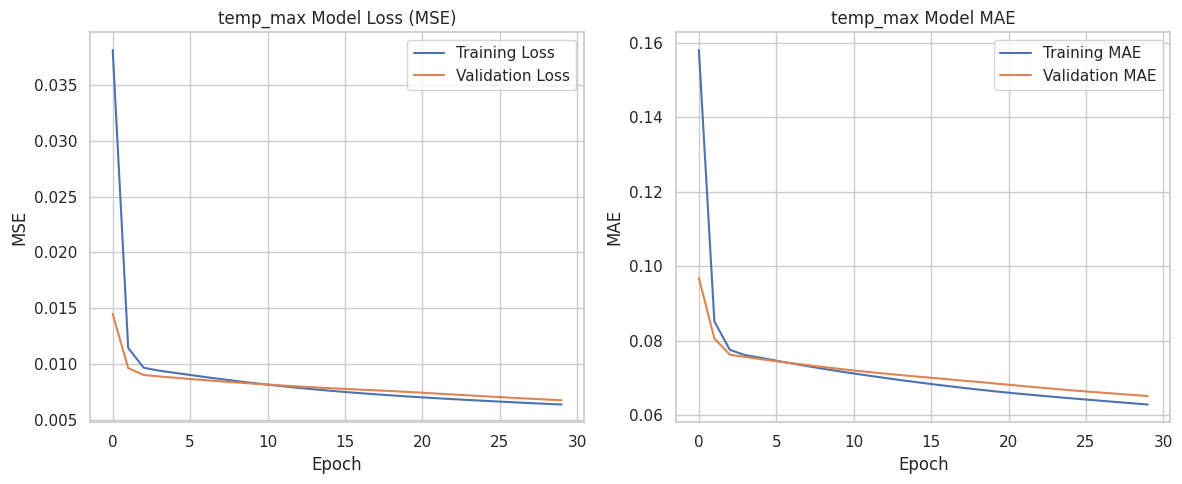

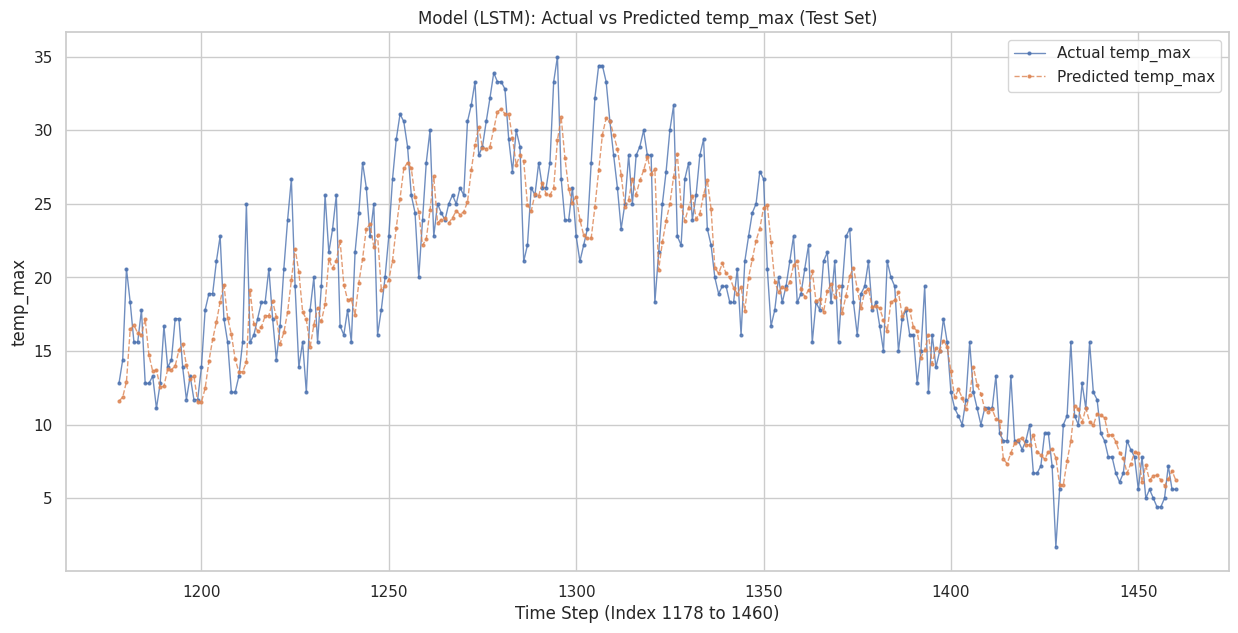


==================== Finished Model for: temp_max ====================

--- Finished processing for Model 2 (temp_max) ---

--- Collected Single-Step Metrics ---


MSE       MAE      RMSE
Model 2 (Temp Max)  0.006758  0.065163  0.082207

In [ ]:
# Write your code here
# Write your code here
# Import necessary libraries if running this cell independently
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import os

# --- Ensure Helper Function is Defined ---
# Make sure the 'create_sequences' and 'run_single_step_model' functions
# are defined in your environment from previous steps or the full code example.

# --- Helper Function: Create Sequences (Single-Step) ---
def create_sequences(input_data, target_data, lookback):
    """ Creates sequences for single-step RNN training. """
    X, y = [], []
    if target_data.ndim == 1:
        target_data = target_data.reshape(-1, 1) # Ensure target is 2D
    if len(input_data) <= lookback:
        print(f"Warning: Data length ({len(input_data)}) too short for lookback {lookback}.")
        return np.array(X), np.array(y)
    for i in range(len(input_data) - lookback):
        X.append(input_data[i:(i + lookback)])
        y.append(target_data[i + lookback]) # Target is the step immediately after lookback
    return np.array(X), np.array(y)

# --- Helper Function: Build, Train, Evaluate, Visualize Single-Step Model ---
def run_single_step_model(df_input, target_feature_name, feature_list,
                          lookback_window, split_ratio, epochs, batch_size,
                          model_type='LSTM', visualize=True):
    """
    Prepares data, builds, trains, evaluates, and visualizes a single-step RNN model.
    Returns a dictionary of metrics, the trained model, and the scaler.
    """
    print(f"\n{'='*20} Running Single-Step Model for: {target_feature_name} {'='*20}")
    metrics = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
    model = None
    scaler = None
    history = None
    global df # Allow modification of df if date sorting happens (use with caution)

    # --- Prerequisites Check ---
    if df_input is None:
        print("Error: Input DataFrame is None. Skipping model.")
        return metrics, model, scaler, history
    # Check if feature_list itself is valid
    if not isinstance(feature_list, list) or not feature_list:
         print("Error: feature_list is not a valid list. Skipping.")
         return metrics, model, scaler, history
    # Check if all features in feature_list exist in df_input
    if not all(f in df_input.columns for f in feature_list):
        missing_feats = [f for f in feature_list if f not in df_input.columns]
        print(f"Error: DataFrame missing one or more features from feature_list: {missing_feats}. Skipping.")
        return metrics, model, scaler, history
    # Check if target_feature_name is valid and exists
    if not isinstance(target_feature_name, str) or not target_feature_name:
         print("Error: target_feature_name is not a valid string. Skipping.")
         return metrics, model, scaler, history
    if target_feature_name not in feature_list:
         print(f"Error: Target feature '{target_feature_name}' not in feature list {feature_list}. Skipping.")
         return metrics, model, scaler, history

    try:
        # --- 1. Data Preparation ---
        print("\n--- 1. Data Preparation ---")
        # Use .copy() to avoid SettingWithCopyWarning if df_input is a slice
        df_subset = df_input[feature_list].copy()

        # Convert data types safely AFTER checking column existence
        data_for_scaling = df_subset.astype(np.float32).values
        n_samples_total = len(data_for_scaling)
        split_idx = int(n_samples_total * (1 - split_ratio))

        # Check for sufficient data length BEFORE slicing
        min_len_needed = lookback_window + 1 # Need at least one sequence possible in test
        if split_idx < lookback_window or n_samples_total - split_idx < min_len_needed:
             raise ValueError(f"Train ({split_idx}) or Test ({n_samples_total - split_idx}) set too small for lookback window ({lookback_window}). Min test length needed: {min_len_needed}")

        train_data = data_for_scaling[:split_idx]
        test_data = data_for_scaling[split_idx:]
        print(f"Total samples: {n_samples_total}, Training samples: {len(train_data)}, Testing samples: {len(test_data)}")

        # --- Scaling ---
        scaler = MinMaxScaler()
        scaled_train_data = scaler.fit_transform(train_data)
        scaled_test_data = scaler.transform(test_data)
        n_features_build = scaled_train_data.shape[1] # Get actual number of features after scaling

        # --- Create Sequences ---
        target_col_index = feature_list.index(target_feature_name) # Find index after validation
        X_train, y_train = create_sequences(scaled_train_data, scaled_train_data[:, target_col_index], lookback_window)
        X_test, y_test = create_sequences(scaled_test_data, scaled_test_data[:, target_col_index], lookback_window)

        if X_train.size == 0 or X_test.size == 0:
             # This check might be redundant due to the earlier length check, but good safeguard
             raise ValueError("Sequence creation resulted in empty arrays despite initial length check.")
        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
        print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

        # --- 2. Build Model ---
        print(f"\n--- 2. Building {model_type} Model ---")
        model = Sequential(name=f'Model_Single_{target_feature_name}_{model_type}')
        # Input shape uses n_features_build derived from the scaled data
        if model_type == 'LSTM':
            model.add(LSTM(units=50, input_shape=(lookback_window, n_features_build), name='LSTM_Layer'))
        elif model_type == 'GRU':
            model.add(GRU(units=50, input_shape=(lookback_window, n_features_build), name='GRU_Layer'))
        else: # SimpleRNN
            model.add(SimpleRNN(units=50, input_shape=(lookback_window, n_features_build), name='SimpleRNN_Layer'))
        # model.add(Dropout(0.2)) # Optional Dropout
        model.add(Dense(units=1, name='Output_Layer')) # Single output unit
        model.summary()

        # --- 3. Compile and Train ---
        print("\n--- 3. Compiling and Training ---")
        # Define LEARNING_RATE if not passed or globally defined
        current_learning_rate = locals().get('LEARNING_RATE', 0.001)
        model.compile(optimizer=Adam(learning_rate=current_learning_rate),
                      loss='mean_squared_error', metrics=['mean_absolute_error'])
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                          validation_data=(X_test, y_test), verbose=1, shuffle=False)
        print("Training completed.")

        # --- 4. Evaluate ---
        print("\n--- 4. Evaluating Model ---")
        results = model.evaluate(X_test, y_test, verbose=0)
        mse_val = results[0]
        mae_val = results[1]
        rmse_val = math.sqrt(mse_val)
        metrics = {'MSE': mse_val, 'MAE': mae_val, 'RMSE': rmse_val}
        print(f"Test MSE: {mse_val:.6f}, MAE: {mae_val:.6f}, RMSE: {rmse_val:.6f}")

        # --- 5. Predict and Visualize (Optional) ---
        if visualize:
            print("\n--- 5. Predicting and Visualizing ---")
            y_pred_scaled = model.predict(X_test)

            # --- Inverse transform ---
            # Create dummy arrays based on n_features_build derived from scaler
            dummy_pred = np.zeros((len(y_pred_scaled), n_features_build))
            dummy_actual = np.zeros((len(y_test), n_features_build))

            # Ensure prediction/actual arrays are flattened before assignment
            dummy_pred[:, target_col_index] = y_pred_scaled.flatten()
            dummy_actual[:, target_col_index] = y_test.flatten()

            # Perform inverse transform
            y_pred_actual = scaler.inverse_transform(dummy_pred)[:, target_col_index]
            y_test_actual = scaler.inverse_transform(dummy_actual)[:, target_col_index]

            # --- Get time index ---
            start_index_pred = split_idx + lookback_window
            end_index_pred = start_index_pred + len(y_test_actual)
            xlabel_plot = f'Time Step (Index {start_index_pred} to {end_index_pred-1})' # Default label
            pred_time_index = np.arange(start_index_pred, end_index_pred) # Default time axis

            # Try to use date if available and valid
            if 'date' in df_input.columns and pd.api.types.is_datetime64_any_dtype(df_input['date']):
                 try:
                     # Ensure sorting if using date column that's not the index
                     if not isinstance(df_input.index, pd.DatetimeIndex) or df_input.index.name != 'date':
                         # Create a sorted copy only if necessary
                         df_input_sorted = df_input.sort_values('date').copy()
                         print("Using sorted 'date' column for time axis.")
                     else:
                          # Assume df_input is already sorted if DatetimeIndex is present
                         df_input_sorted = df_input
                         print("Using 'date' index for time axis.")

                     # Check if index range is valid BEFORE trying to slice
                     if start_index_pred >= 0 and end_index_pred <= len(df_input_sorted):
                         pred_time_index = df_input_sorted['date'].iloc[start_index_pred:end_index_pred]
                         xlabel_plot = 'Date'
                     else:
                         print(f"Warning: Calculated index range [{start_index_pred}:{end_index_pred}] "
                               f"is out of bounds for DataFrame length ({len(df_input_sorted)}). Using numerical index.")
                 except Exception as date_err:
                     print(f"Warning: Error using date for time axis ({date_err}). Using numerical index.")


            # --- Plot Loss/MAE ---
            if history is not None and history.history:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(history.history['loss'], label='Training Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.title(f'{target_feature_name} Model Loss (MSE)')
                plt.xlabel('Epoch'); plt.ylabel('MSE')
                plt.legend(); plt.grid(True)
                plt.subplot(1, 2, 2)
                plt.plot(history.history['mean_absolute_error'], label='Training MAE')
                plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
                plt.title(f'{target_feature_name} Model MAE')
                plt.xlabel('Epoch'); plt.ylabel('MAE')
                plt.legend(); plt.grid(True)
                plt.tight_layout()
                plt.show()
            else:
                print("No training history available to plot.")


            # --- Plot Actual vs Predicted Time Series ---
            plt.figure(figsize=(15, 7)) # Wider plot
            plt.plot(pred_time_index, y_test_actual, label=f'Actual {target_feature_name}', marker='.', markersize=4, linestyle='-', linewidth=1, alpha=0.8)
            plt.plot(pred_time_index, y_pred_actual, label=f'Predicted {target_feature_name}', marker='.', markersize=4, linestyle='--', linewidth=1, alpha=0.8)
            plt.title(f'Model ({model_type}): Actual vs Predicted {target_feature_name} (Test Set)')
            plt.xlabel(xlabel_plot)
            plt.ylabel(target_feature_name)
            plt.legend()
            plt.grid(True)
            # Improve date formatting if time_axis is datetime
            if pd.api.types.is_datetime64_any_dtype(pred_time_index):
                 plt.gcf().autofmt_xdate() # Auto-format date labels
            plt.show()

    except ValueError as ve: # Catch specific errors like insufficient data
        print(f"ValueError during model run for {target_feature_name}: {ve}")
    except Exception as e: # Catch other unexpected errors
        print(f"An unexpected error occurred during model run for {target_feature_name}: {e}")
        import traceback
        traceback.print_exc() # Print detailed traceback for debugging

    print(f"\n{'='*20} Finished Model for: {target_feature_name} {'='*20}")
    # Ensure metrics dict has NaNs if evaluation failed before returning
    return metrics, model, scaler, history


# --- Configuration (Ensure these are defined from previous steps or set here) ---
# These should have been set in Part 1 or the initial setup
if 'df' not in locals():
    print("CRITICAL ERROR: DataFrame 'df' is not defined. Load data first.")
    # Stop execution or handle appropriately
    exit() # Example: Exit if running as a script
# Set defaults if variables might be missing from interactive execution
FEATURES = locals().get('FEATURES', ['precipitation', 'temp_max', 'temp_min', 'wind'])
LOOKBACK_WINDOW = locals().get('LOOKBACK_WINDOW', 10)
TEST_SPLIT_RATIO = locals().get('TEST_SPLIT_RATIO', 0.2)
EPOCHS_SINGLE = locals().get('EPOCHS_SINGLE', 30)
BATCH_SIZE = locals().get('BATCH_SIZE', 32)
# Initialize dictionaries to store results if they don't exist
single_step_metrics = locals().get('single_step_metrics', {})
models_single = locals().get('models_single', {})
scalers_single = locals().get('scalers_single', {})

# --- Run Model 2: Predict single temp_max value in future ---

TARGET_FEATURE_TEMP_MAX = 'temp_max'

# Check prerequisites before running
if df is not None: # Check if df was loaded successfully
    print(f"\n>>> Running Model 2 for '{TARGET_FEATURE_TEMP_MAX}' using helper function...")

    # Call the reusable function defined above
    metrics_tm, model_tm, scaler_tm, history_tm = run_single_step_model(
        df_input=df,                         # The main DataFrame
        target_feature_name=TARGET_FEATURE_TEMP_MAX, # Feature to predict
        feature_list=FEATURES,               # List of features to use as input
        lookback_window=LOOKBACK_WINDOW,     # Defined lookback period
        split_ratio=TEST_SPLIT_RATIO,        # Train/test split ratio
        epochs=EPOCHS_SINGLE,                # Number of training epochs
        batch_size=BATCH_SIZE,               # Batch size for training
        model_type='LSTM',                   # Choose RNN type: 'LSTM', 'GRU', 'SimpleRNN'
        visualize=True                       # Generate plots
    )

    # Store results safely, even if function returned None
    single_step_metrics['Model 2 (Temp Max)'] = metrics_tm if metrics_tm else {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
    models_single['temp_max'] = model_tm
    scalers_single['temp_max'] = scaler_tm # Store the specific scaler used

    print(f"\n--- Finished processing for Model 2 ({TARGET_FEATURE_TEMP_MAX}) ---")

else:
    print("\nSkipping Model 2 because DataFrame 'df' is not available.")

# Display collected metrics so far (optional)
print("\n--- Collected Single-Step Metrics ---")
metrics_df_so_far = pd.DataFrame(single_step_metrics).T # Transpose for better view
try:
    display(metrics_df_so_far)
except NameError:
    print(metrics_df_so_far)

### Model 3: Predict single temp_min value in future

#### Data Preparation for temp_min Prediction:
Prepare the data, creating the output array (y) containing the single scaled future temp_min value for each sequence.

#### Build RNN Model for temp_min:
Design and implement a Keras Sequential model using RNN layers for predicting a single future temp_min value. Print the model summary.

#### Compile and Train Model 3:
Compile and train the temp_min prediction model using appropriate settings (optimizer, MSE loss, MAE metric).

#### Evaluate Model 3 Performance:
Evaluate the trained temp_min prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 3 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test temp_min values. Plot the actual vs. predicted future temp_min values over time.


>>> Running Model 3 for 'temp_min' using helper function...

==================== Running Single-Step Model for: temp_min ====================

--- 1. Data Preparation ---
Total samples: 1461, Training samples: 1168, Testing samples: 293
X_train shape: (1158, 10, 4), y_train shape: (1158, 1)
X_test shape: (283, 10, 4), y_test shape: (283, 1)

--- 2. Building LSTM Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_Single_temp_min_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)


--- 3. Compiling and Training ---
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0591 - mean_absolute_error: 0.2047 - val_loss: 0.0103 - val_mean_absolute_error: 0.0856
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0109 - mean_absolute_error: 0.0833 - val_loss: 0.0061 - val_mean_absolute_error: 0.0632
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0086 - mean_absolute_error: 0.0731 - val_loss: 0.0058 - val_mean_absolute_error: 0.0615
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0084 - mean_absolute_error: 0.0719 - val_loss: 0.0058 - val_mean_absolute_error: 0.0613
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0081 - mean_absolute_error: 0.0708 - val_loss: 0.0056 - val_mean_absolute_error: 0.0605
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0079 - mean_absolute_error: 0.0700 - val_loss: 0.0055 - val_mean_absolute_error: 0.0600
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0077 - mea

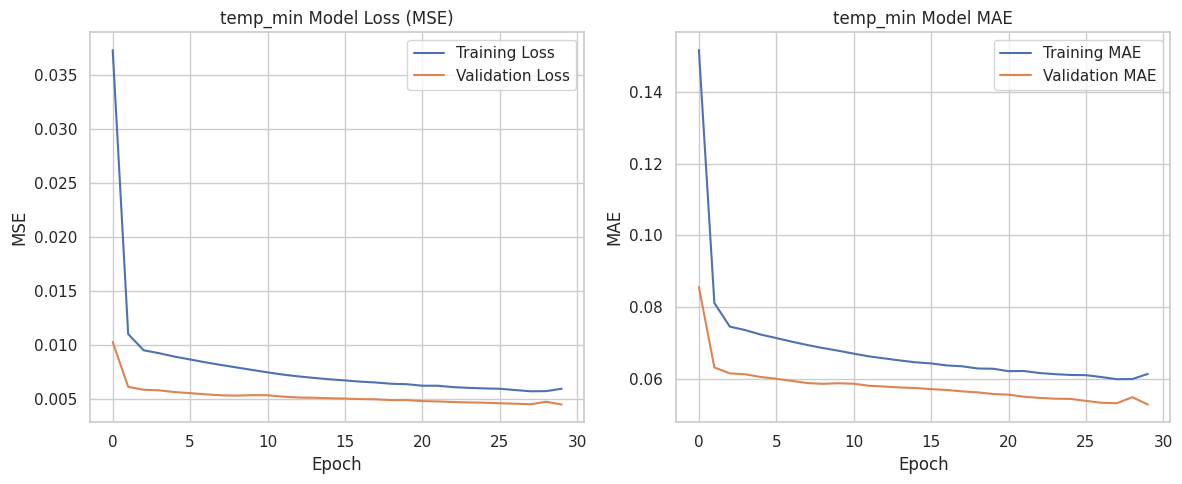

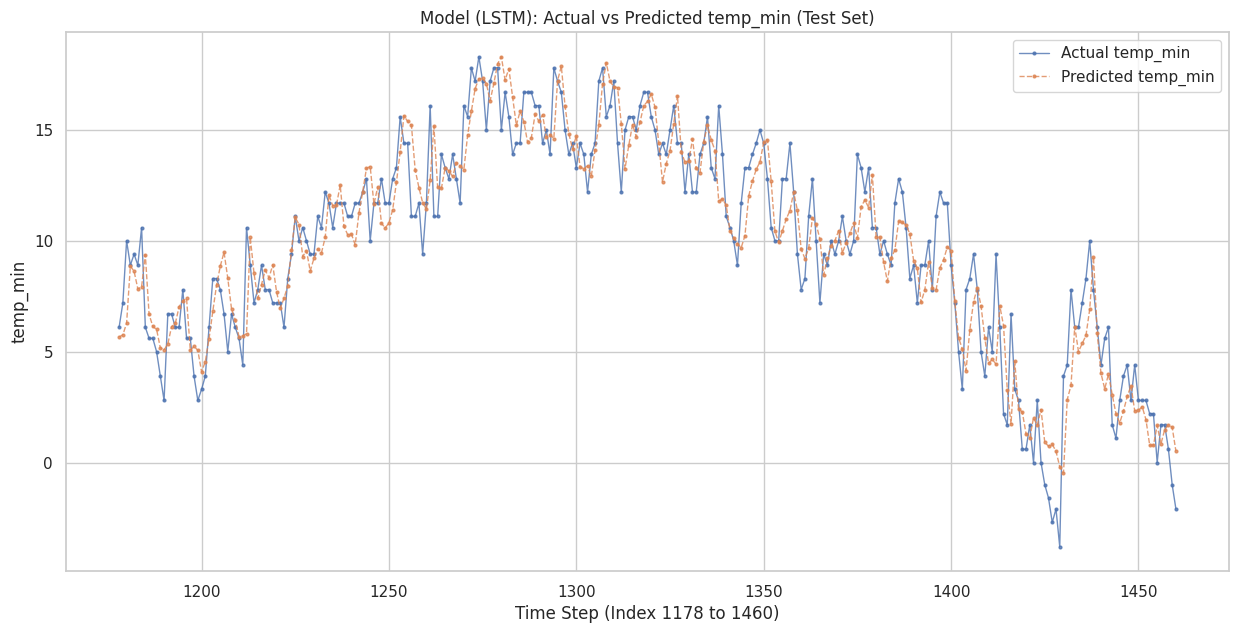


==================== Finished Model for: temp_min ====================

--- Finished processing for Model 3 (temp_min) ---

--- Collected Single-Step Metrics ---


MSE       MAE      RMSE
Model 2 (Temp Max)  0.006758  0.065163  0.082207
Model 3 (Temp Min)  0.004478  0.052843  0.066919

In [ ]:
# Write your code here
# Write your code here
# Import necessary libraries if running this cell independently
# (Imports are assumed to be done already if running sequentially)
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# ... etc ...

# --- Ensure Helper Function is Defined ---
# Make sure the 'run_single_step_model' function is defined in your environment.
if 'run_single_step_model' not in locals():
    print("Error: Helper function 'run_single_step_model' not defined.")
    print("Please define it (copy from previous cells/examples) before running Model 3.")
    # raise NameError("Helper function 'run_single_step_model' is required.")

# --- Configuration (Ensure these are defined from previous steps) ---
if 'df' not in locals() or df is None:
    print("Error: DataFrame 'df' is not loaded. Please load data first.")
    # Or handle appropriately, e.g., exit()
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'TEST_SPLIT_RATIO' not in locals(): TEST_SPLIT_RATIO = 0.2
if 'EPOCHS_SINGLE' not in locals(): EPOCHS_SINGLE = 30
if 'BATCH_SIZE' not in locals(): BATCH_SIZE = 32
# Initialize dictionaries if they don't exist
if 'single_step_metrics' not in locals(): single_step_metrics = {}
if 'models_single' not in locals(): models_single = {}
if 'scalers_single' not in locals(): scalers_single = {}

# --- Run Model 3: Predict single temp_min value in future ---

TARGET_FEATURE_TEMP_MIN = 'temp_min'

# Check prerequisites before running
if 'df' in locals() and df is not None and 'run_single_step_model' in locals():
    print(f"\n>>> Running Model 3 for '{TARGET_FEATURE_TEMP_MIN}' using helper function...")

    # Call the reusable helper function
    metrics_tmin, model_tmin, scaler_tmin, history_tmin = run_single_step_model(
        df_input=df,
        target_feature_name=TARGET_FEATURE_TEMP_MIN,
        feature_list=FEATURES,
        lookback_window=LOOKBACK_WINDOW,
        split_ratio=TEST_SPLIT_RATIO,
        epochs=EPOCHS_SINGLE,
        batch_size=BATCH_SIZE,
        model_type='LSTM',  # Specify model type if you want to experiment (e.g., 'GRU')
        visualize=True      # Generate plots
    )

    # Store results safely
    single_step_metrics['Model 3 (Temp Min)'] = metrics_tmin if metrics_tmin else {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
    models_single['temp_min'] = model_tmin
    scalers_single['temp_min'] = scaler_tmin # Store the specific scaler

    print(f"\n--- Finished processing for Model 3 ({TARGET_FEATURE_TEMP_MIN}) ---")

else:
    print("\nSkipping Model 3 due to missing DataFrame 'df' or helper function 'run_single_step_model'.")

# Display collected metrics so far (optional)
print("\n--- Collected Single-Step Metrics ---")
metrics_df_so_far = pd.DataFrame(single_step_metrics).T # Transpose for better view
try:
    display(metrics_df_so_far)
except NameError:
    print(metrics_df_so_far)

### Model 4: Predict single wind value in future

#### Data Preparation for Wind Prediction:
Prepare the data, creating the output array (y) containing the single scaled future wind value for each sequence.

#### Build RNN Model for Wind:
Design and implement a Keras Sequential model using RNN layers for predicting a single future wind value. Print the model summary.

#### Compile and Train Model 4:
Compile and train the wind prediction model using appropriate settings (optimizer, MSE loss, MAE metric).

#### Evaluate Model 4 Performance:
Evaluate the trained wind prediction model on the test dataset. Report the MSE, MAE, and RMSE.

#### Predict and Visualize Model 4 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and actual test wind values. Plot the actual vs. predicted future wind values over time.


>>> Running Model 4 for 'wind' using helper function...

==================== Running Single-Step Model for: wind ====================

--- 1. Data Preparation ---
Total samples: 1461, Training samples: 1168, Testing samples: 293
X_train shape: (1158, 10, 4), y_train shape: (1158, 1)
X_test shape: (283, 10, 4), y_test shape: (283, 1)

--- 2. Building LSTM Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Model_Single_wind_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)


--- 3. Compiling and Training ---
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0775 - mean_absolute_error: 0.2177 - val_loss: 0.0202 - val_mean_absolute_error: 0.1048
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0300 - mean_absolute_error: 0.1335 - val_loss: 0.0179 - val_mean_absolute_error: 0.1033
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0255 - mean_absolute_error: 0.1250 - val_loss: 0.0176 - val_mean_absolute_error: 0.1018
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0247 - mean_absolute_error: 0.1222 - val_loss: 0.0173 - val_mean_absolute_error: 0.1009
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0243 - mean_absolute_error: 0.1211 - val_loss: 0.0171 - val_mean_absolute_error: 0.1002
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0240 - mean_absolute_error: 0.1202 - val_loss: 0.0169 - val_mean_absolute_error: 0.0996
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0238 - mea

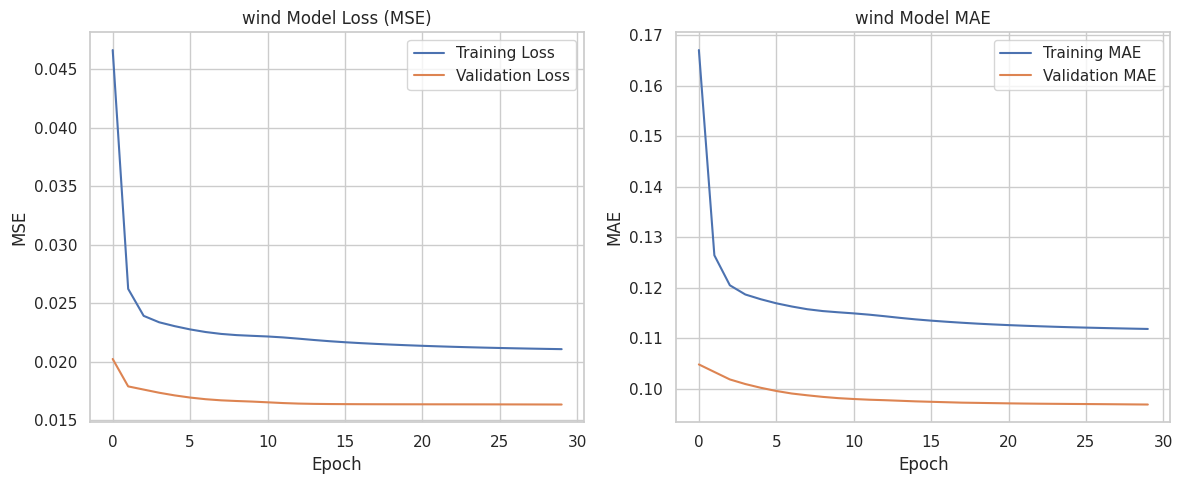

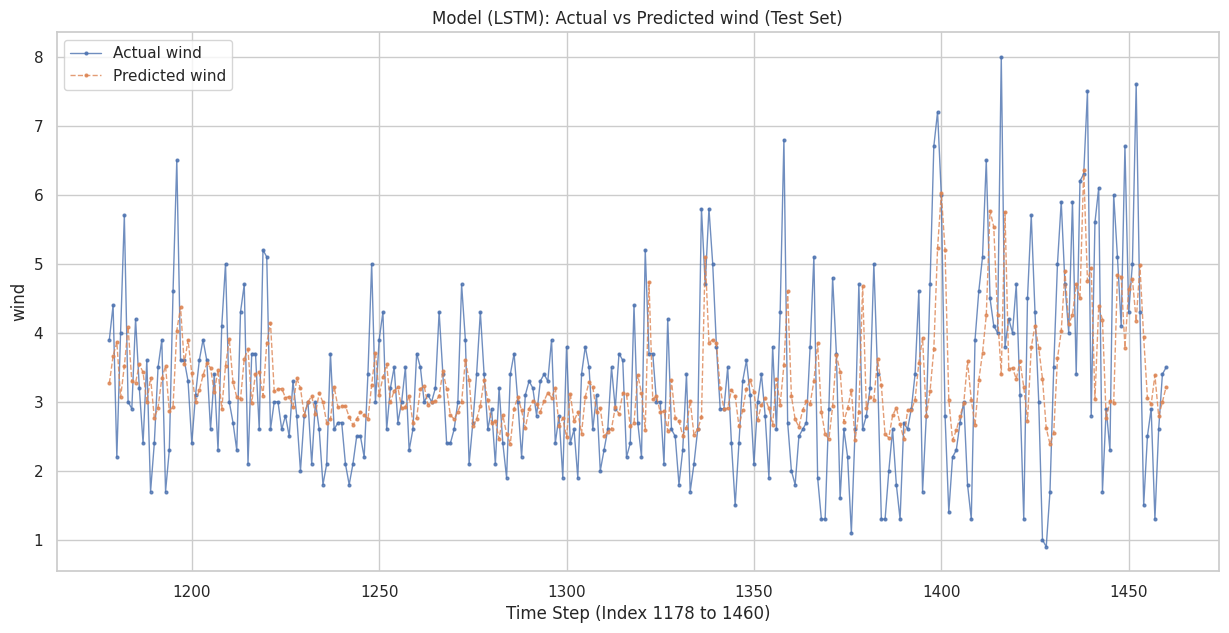


==================== Finished Model for: wind ====================

--- Finished processing for Model 4 (wind) ---

--- Collected Single-Step Metrics ---


MSE       MAE      RMSE
Model 2 (Temp Max)  0.006758  0.065163  0.082207
Model 3 (Temp Min)  0.004478  0.052843  0.066919
Model 4 (Wind)      0.016340  0.096869  0.127830

In [ ]:
# Write your code here
# Write your code here
# Import necessary libraries if running this cell independently
# (Imports are assumed to be done already if running sequentially)
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# ... etc ...

# --- Ensure Helper Function is Defined ---
# Make sure the 'run_single_step_model' function is defined in your environment.
if 'run_single_step_model' not in locals():
    print("Error: Helper function 'run_single_step_model' not defined.")
    print("Please define it (copy from previous cells/examples) before running Model 4.")
    # raise NameError("Helper function 'run_single_step_model' is required.")

# --- Configuration (Ensure these are defined from previous steps) ---
if 'df' not in locals() or df is None:
    print("Error: DataFrame 'df' is not loaded. Please load data first.")
    # Or handle appropriately, e.g., exit()
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'TEST_SPLIT_RATIO' not in locals(): TEST_SPLIT_RATIO = 0.2
if 'EPOCHS_SINGLE' not in locals(): EPOCHS_SINGLE = 30
if 'BATCH_SIZE' not in locals(): BATCH_SIZE = 32
# Initialize dictionaries if they don't exist
if 'single_step_metrics' not in locals(): single_step_metrics = {}
if 'models_single' not in locals(): models_single = {}
if 'scalers_single' not in locals(): scalers_single = {}

# --- Run Model 4: Predict single wind value in future ---

TARGET_FEATURE_WIND = 'wind'

# Check prerequisites before running
if 'df' in locals() and df is not None and 'run_single_step_model' in locals():
    print(f"\n>>> Running Model 4 for '{TARGET_FEATURE_WIND}' using helper function...")

    # Call the reusable helper function
    metrics_w, model_w, scaler_w, history_w = run_single_step_model(
        df_input=df,
        target_feature_name=TARGET_FEATURE_WIND,
        feature_list=FEATURES,
        lookback_window=LOOKBACK_WINDOW,
        split_ratio=TEST_SPLIT_RATIO,
        epochs=EPOCHS_SINGLE,
        batch_size=BATCH_SIZE,
        model_type='LSTM',  # Specify model type (e.g., 'GRU', 'SimpleRNN')
        visualize=True      # Generate plots
    )

    # Store results safely
    single_step_metrics['Model 4 (Wind)'] = metrics_w if metrics_w else {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
    models_single['wind'] = model_w
    scalers_single['wind'] = scaler_w # Store the specific scaler

    print(f"\n--- Finished processing for Model 4 ({TARGET_FEATURE_WIND}) ---")

else:
    print("\nSkipping Model 4 due to missing DataFrame 'df' or helper function 'run_single_step_model'.")

# Display collected metrics so far (optional)
print("\n--- Collected Single-Step Metrics ---")
metrics_df_so_far = pd.DataFrame(single_step_metrics).T # Transpose for better view
try:
    display(metrics_df_so_far)
except NameError:
    print(metrics_df_so_far)

### Model 5: Predict single future values of all 4 parameters

#### Data Preparation for All 4 Parameters Prediction:
Prepare the data for a multi-output RNN model. Scale the features. Create input sequences (X) of length lookback_window (10) using the scaled features. Create the corresponding output array (y) containing the single scaled future values for all four features (precipitation, temp_max, temp_min, wind) for each sequence. Split the sequence data (X, y) into training and testing sets.

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Model 5: Predict single future values of all 4 parameters ---
print("\n--- Model 5: Preparing Data for Single-Step All Features Prediction ---")

# --- Configuration (Ensure these are defined) ---
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'N_FEATURES' not in locals(): N_FEATURES = len(FEATURES)
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'TEST_SPLIT_RATIO' not in locals(): TEST_SPLIT_RATIO = 0.2

print(f"Target Features: All {N_FEATURES} features ({FEATURES})")
print(f"Lookback Window: {LOOKBACK_WINDOW}")

# --- Helper Function: Create Sequences (Single-Step, potentially Multi-Output Target) ---
# Re-using the same function as before, it handles multi-output y correctly
# if target_data has multiple columns.
def create_sequences(input_data, target_data, lookback):
    """ Creates sequences for single-step RNN training (handles multi-output y). """
    X, y = [], []
    # No need to reshape target if it already has multiple columns
    # if target_data.ndim == 1:
    #     target_data = target_data.reshape(-1, 1)
    if len(input_data) <= lookback:
        print(f"Warning: Data length ({len(input_data)}) too short for lookback {lookback}.")
        return np.array(X), np.array(y)
    for i in range(len(input_data) - lookback):
        X.append(input_data[i:(i + lookback)])
        # Target is the row (vector of features) immediately after the lookback window
        y.append(target_data[i + lookback, :]) # Select all columns for the target step
    return np.array(X), np.array(y)


# --- Data Preparation Steps ---
# Initialize variables
X_train_m5, y_train_m5, X_test_m5, y_test_m5, scaler_m5 = None, None, None, None, None
data_prep_success_m5 = False

# Check if the main DataFrame 'df' exists and has the required features
if 'df' in locals() and df is not None:
    if all(f in df.columns for f in FEATURES):
        try:
            print("\n--- 1. Selecting and Splitting Data ---")
            # Select relevant features and convert to NumPy array
            data_for_scaling_m5 = df[FEATURES].astype(np.float32).values

            # Calculate split point
            n_samples_total_m5 = len(data_for_scaling_m5)
            split_index_m5 = int(n_samples_total_m5 * (1 - TEST_SPLIT_RATIO))
            print(f"Total samples: {n_samples_total_m5}, Training samples: {split_index_m5}, Testing samples: {n_samples_total_m5 - split_index_m5}")

            # Split data chronologically
            train_data_m5 = data_for_scaling_m5[:split_index_m5]
            test_data_m5 = data_for_scaling_m5[split_index_m5:]
            print(f"Raw train_data shape: {train_data_m5.shape}")
            print(f"Raw test_data shape: {test_data_m5.shape}")

            print("\n--- 2. Scaling Data ---")
            # Initialize scaler
            scaler_m5 = MinMaxScaler(feature_range=(0, 1))
            # Fit scaler ONLY on training data
            scaled_train_data_m5 = scaler_m5.fit_transform(train_data_m5)
            # Transform test data using the SAME fitted scaler
            scaled_test_data_m5 = scaler_m5.transform(test_data_m5)
            print("Data scaled using MinMaxScaler (fit on train data).")
            print(f"Scaled train_data shape: {scaled_train_data_m5.shape}")
            print(f"Scaled test_data shape: {scaled_test_data_m5.shape}")

            print("\n--- 3. Creating Input/Output Sequences ---")
            # Create sequences for training
            # Input (X): sequences of shape (lookback, n_features) from scaled_train_data
            # Output (y): the *vector* of all scaled features at the step after the lookback window
            X_train_m5, y_train_m5 = create_sequences(
                input_data=scaled_train_data_m5,
                target_data=scaled_train_data_m5, # Target data is the full scaled row
                lookback=LOOKBACK_WINDOW
            )

            # Create sequences for testing
            X_test_m5, y_test_m5 = create_sequences(
                input_data=scaled_test_data_m5,
                target_data=scaled_test_data_m5, # Target data is the full scaled row
                lookback=LOOKBACK_WINDOW
            )

            # Verify shapes
            if X_train_m5.size == 0 or X_test_m5.size == 0:
                raise ValueError("Sequence creation resulted in empty arrays for Model 5.")

            print("\nShapes after creating sequences:")
            print(f"X_train_m5 shape: {X_train_m5.shape}") # Expected: (num_train_sequences, LOOKBACK_WINDOW, N_FEATURES)
            print(f"y_train_m5 shape: {y_train_m5.shape}") # Expected: (num_train_sequences, N_FEATURES) <--- Note the change!
            print(f"X_test_m5 shape: {X_test_m5.shape}")   # Expected: (num_test_sequences, LOOKBACK_WINDOW, N_FEATURES)
            print(f"y_test_m5 shape: {y_test_m5.shape}")   # Expected: (num_test_sequences, N_FEATURES) <--- Note the change!

            data_prep_success_m5 = True
            print("\nData preparation for Model 5 (All Features) completed successfully.")

        except Exception as e:
            print(f"\nAn error occurred during data preparation for Model 5: {e}")
            # Reset variables on error
            X_train_m5, y_train_m5, X_test_m5, y_test_m5, scaler_m5 = None, None, None, None, None
    else:
        missing_required = [f for f in FEATURES if f not in df.columns]
        print(f"\nError: DataFrame 'df' is missing required features for Model 5: {missing_required}")
else:
    print("\nError: DataFrame 'df' not available or not loaded successfully.")
    print("Cannot prepare data for Model 5.")

# --- Check results (optional) ---
# if data_prep_success_m5:
#     print("\nFirst training sequence (X_train_m5[0]):\n", X_train_m5[0])
#     print("\nFirst training target vector (y_train_m5[0]):\n", y_train_m5[0])
# else:
#      print("\nData preparation failed, cannot show sequence examples.")


--- Model 5: Preparing Data for Single-Step All Features Prediction ---
Target Features: All 4 features (['precipitation', 'temp_max', 'temp_min', 'wind'])
Lookback Window: 10

--- 1. Selecting and Splitting Data ---
Total samples: 1461, Training samples: 1168, Testing samples: 293
Raw train_data shape: (1168, 4)
Raw test_data shape: (293, 4)

--- 2. Scaling Data ---
Data scaled using MinMaxScaler (fit on train data).
Scaled train_data shape: (1168, 4)
Scaled test_data shape: (293, 4)

--- 3. Creating Input/Output Sequences ---

Shapes after creating sequences:
X_train_m5 shape: (1158, 10, 4)
y_train_m5 shape: (1158, 4)
X_test_m5 shape: (283, 10, 4)
y_test_m5 shape: (283, 4)

Data preparation for Model 5 (All Features) completed successfully.


#### Build RNN Model for All 4 Parameters:
Design and implement a Keras Sequential model using RNN layers for predicting the single future values of all four parameters simultaneously.

Define the input shape.
Add one or more RNN layers.
Add a Dense output layer with 4 units (one for each predicted feature). Print the model summary.

In [ ]:
# Write your code here
# Import necessary Keras layers if not already imported
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout # Added GRU, Dropout as options
import numpy as np # Ensure numpy is imported for shape comparison if needed

# --- Build RNN Model for All 4 Parameters (Model 5) ---

print("\n>>> Building RNN Model for All 4 Parameters Prediction (Model 5)...")

# --- Configuration (Ensure these are defined from previous steps) ---
# These should have been defined during data prep or initial setup
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'N_FEATURES' not in locals(): N_FEATURES = len(FEATURES)

# Initialize model variable to None
model_m5 = None
model_built_success_m5 = False

# Proceed only if data preparation for Model 5 was successful
# It's crucial that X_train_m5 and y_train_m5 exist and have correct shapes here
if ('data_prep_success_m5' in locals() and data_prep_success_m5):
    # Verify the prepared data exists and has the correct shape
    if ('X_train_m5' in locals() and X_train_m5 is not None and
        X_train_m5.shape[1] == LOOKBACK_WINDOW and X_train_m5.shape[2] == N_FEATURES and
        'y_train_m5' in locals() and y_train_m5 is not None and
        y_train_m5.shape[1] == N_FEATURES): # Check y_train shape for number of features

        print(f"Input data shape for model building: {X_train_m5.shape}")
        print(f"Target data shape for model building: {y_train_m5.shape}")

        try:
            # 1. Define the Model Architecture using Keras Sequential API
            model_m5 = Sequential(name="AllFeatures_Prediction_LSTM")

            # --- Add RNN Layer(s) ---
            # Using LSTM as an example. Can be swapped with GRU or SimpleRNN.
            model_m5.add(LSTM(
                units=64,                          # Number of LSTM units (hyperparameter)
                input_shape=(LOOKBACK_WINDOW, N_FEATURES), # Shape: (timesteps, features_per_timestep)
                # return_sequences=False            # Default is False for the last RNN layer before Dense
                name='LSTM_Layer_MultiOut'
            ))

            # --- Optional: Add Dropout for Regularization ---
            # model_m5.add(Dropout(0.2, name='Dropout_Layer_MultiOut')) # Uncomment to add Dropout

            # --- Add Dense Output Layer ---
            # Units must match the number of target features (N_FEATURES)
            model_m5.add(Dense(
                units=N_FEATURES, # Output one value for each of the N_FEATURES
                activation=None,  # 'linear' (or None) is appropriate for regression
                name='Output_Layer_MultiOut'
            ))

            # 2. Print the Model Summary
            print("\nModel Summary:")
            model_m5.summary()

            # 3. Verify Output Layer Shape
            # Access the output shape of the *entire model*
            model_output_shape = model_m5.output_shape
            print(f"\nModel output shape (from model object): {model_output_shape}")

            # Expected shape is (None, N_FEATURES), where None represents the batch size
            if model_output_shape == (None, N_FEATURES):
                 print(f"Output layer shape ({N_FEATURES} units) is correct for predicting all features.")
                 model_built_success_m5 = True # Set success flag here after check
                 print("\nRNN Model for All 4 Parameters built successfully.")
            else:
                 # Provide more specific feedback if possible
                 expected_shape_str = f"(None, {N_FEATURES})"
                 print(f"Error: Model output shape is {model_output_shape}, expected {expected_shape_str}. "
                       f"Check the units ({N_FEATURES}) in the final Dense layer.")
                 model_built_success_m5 = False # Explicitly set to False on error


        except Exception as e:
            print(f"\nAn error occurred during Model 5 building: {e}")
            import traceback
            traceback.print_exc() # Print full traceback for debugging
            model_m5 = None # Ensure model is None on error
            model_built_success_m5 = False # Ensure flag is False

    else:
        # Provide more detailed info on why data check failed
        print("\nError: Prerequisite data for building Model 5 not available or has incorrect shape.")
        if 'X_train_m5' not in locals() or X_train_m5 is None:
             print("- Training features 'X_train_m5' not found.")
        elif X_train_m5.shape[1] != LOOKBACK_WINDOW or X_train_m5.shape[2] != N_FEATURES:
             print(f"- 'X_train_m5' shape is {X_train_m5.shape}, expected (*, {LOOKBACK_WINDOW}, {N_FEATURES}).")
        if 'y_train_m5' not in locals() or y_train_m5 is None:
             print("- Training targets 'y_train_m5' not found.")
        elif y_train_m5.shape[1] != N_FEATURES:
             print(f"- 'y_train_m5' shape is {y_train_m5.shape}, expected (*, {N_FEATURES}).")
        model_built_success_m5 = False # Ensure flag is False

else:
    print("\nSkipping Model 5 building because data preparation (data_prep_success_m5 flag) was not successful.")
    model_built_success_m5 = False # Ensure flag is False if skipped

# --- Final Check ---
if model_built_success_m5:
    print("\nModel 5 is ready for compilation and training.")
else:
     print("\nModel 5 building failed or was skipped.")


>>> Building RNN Model for All 4 Parameters Prediction (Model 5)...
Input data shape for model building: (1158, 10, 4)
Target data shape for model building: (1158, 4)

Model Summary:


Model: "AllFeatures_Prediction_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer_MultiOut (LSTM)      │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer_MultiOut (Dense)   │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,924 (70.02 KB)

 Trainable params: 17,924 (70.02 KB)

 Non-trainable params: 0 (0.00 B)


Model output shape (from model object): (None, 4)
Output layer shape (4 units) is correct for predicting all features.

RNN Model for All 4 Parameters built successfully.

Model 5 is ready for compilation and training.


#### Compile and Train Model 5:
Compile the multi-output prediction model using appropriate optimizer, loss function (e.g., 'mean_squared_error'), and metrics (e.g., 'mean_absolute_error'). Train the model on the prepared training data.


>>> Compiling and Training Model 5 (All Features)...
Training parameters: Epochs=30, Batch Size=32

Compiling model...
Model compiled successfully.

Starting training for 30 epochs...
Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0799 - mean_absolute_error: 0.2185 - val_loss: 0.0167 - val_mean_absolute_error: 0.0931
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0172 - mean_absolute_error: 0.0949 - val_loss: 0.0134 - val_mean_absolute_error: 0.0809
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0145 - mean_absolute_error: 0.0871 - val_loss: 0.0126 - val_mean_absolute_error: 0.0783
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0139 - mean_absolute_error: 0.0854 - val_loss: 0.0124 - val_mean_absolute_error: 0.0774
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0137 - mean_absolute_error: 0.0847 - val_loss: 0.0123 - val_mean_absolute_error: 0.0773
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - mean_a

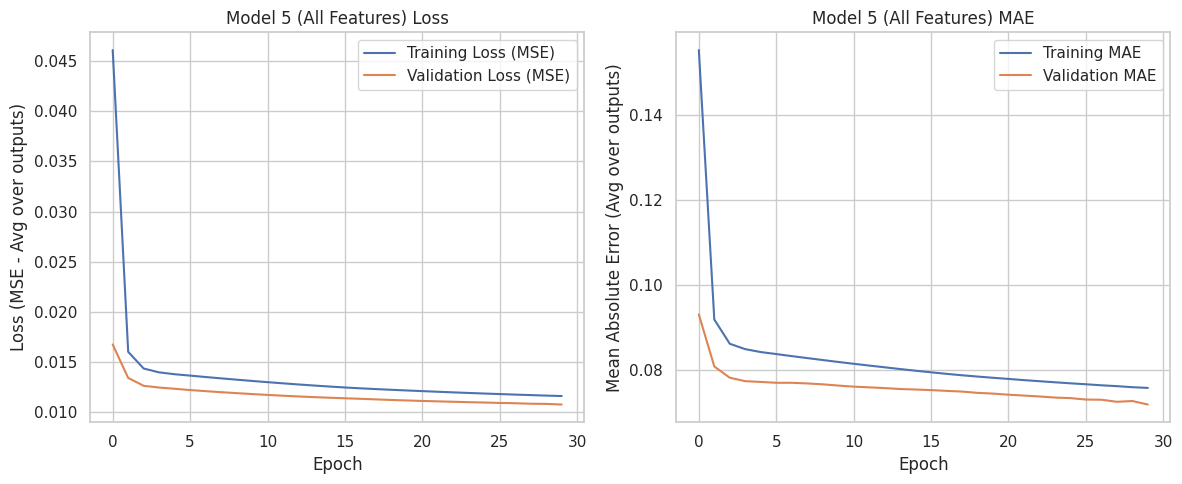

In [ ]:
# Write your code here
# Import necessary components if not already imported
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt # For plotting history

# --- Compile and Train Model 5 (All Features) ---

print("\n>>> Compiling and Training Model 5 (All Features)...")

# Initialize history variable
history_m5 = None
training_success_m5 = False

# Proceed only if the model was built and data is ready
if ('model_built_success_m5' in locals() and model_built_success_m5 and
    'data_prep_success_m5' in locals() and data_prep_success_m5):

    # Double-check that model and data variables actually exist
    if (model_m5 is not None and X_train_m5 is not None and y_train_m5 is not None and
        X_test_m5 is not None and y_test_m5 is not None):
        try:
            # --- Define Training Parameters ---
            # Ensure EPOCHS_SINGLE and BATCH_SIZE are defined (can adjust if needed for multi-output)
            if 'EPOCHS_SINGLE' not in locals(): EPOCHS_SINGLE = 30
            if 'BATCH_SIZE' not in locals(): BATCH_SIZE = 32
            current_epochs = EPOCHS_SINGLE # Use the single-step epoch count for consistency, or define a new one
            current_batch_size = BATCH_SIZE
            print(f"Training parameters: Epochs={current_epochs}, Batch Size={current_batch_size}")

            # --- 1. Compile the Model ---
            print("\nCompiling model...")
            # Optimizer: Adam is generally a good default
            optimizer_m5 = Adam(learning_rate=0.001) # Use LEARNING_RATE if defined globally

            # Loss Function: MSE is suitable for multi-output regression as well.
            # It calculates the mean squared error across all output features.
            loss_function_m5 = 'mean_squared_error'

            # Metrics: MAE is also applicable and gives average absolute error across all outputs.
            metrics_to_track_m5 = ['mean_absolute_error']

            model_m5.compile(
                optimizer=optimizer_m5,
                loss=loss_function_m5,
                metrics=metrics_to_track_m5
            )
            print("Model compiled successfully.")

            # --- 2. Train the Model ---
            print(f"\nStarting training for {current_epochs} epochs...")
            # Train using the prepared multi-output data (X_train_m5, y_train_m5)
            history_m5 = model_m5.fit(
                X_train_m5, y_train_m5,                 # Training data
                epochs=current_epochs,                  # Number of epochs
                batch_size=current_batch_size,          # Batch size
                validation_data=(X_test_m5, y_test_m5), # Validation data
                shuffle=False,                          # DO NOT SHUFFLE time series data
                verbose=1                               # Show progress
            )
            print("\nTraining completed.")
            training_success_m5 = True

            # --- 3. Plot Training History ---
            print("\nPlotting training history (Loss and MAE)...")
            if history_m5 is not None and history_m5.history:
                 plt.figure(figsize=(12, 5))

                 # Plot Loss (MSE) - Represents average MSE across all 4 outputs
                 plt.subplot(1, 2, 1)
                 plt.plot(history_m5.history['loss'], label='Training Loss (MSE)')
                 plt.plot(history_m5.history['val_loss'], label='Validation Loss (MSE)')
                 plt.title('Model 5 (All Features) Loss')
                 plt.xlabel('Epoch')
                 plt.ylabel('Loss (MSE - Avg over outputs)')
                 plt.legend()
                 plt.grid(True)

                 # Plot Metric (MAE) - Represents average MAE across all 4 outputs
                 plt.subplot(1, 2, 2)
                 plt.plot(history_m5.history['mean_absolute_error'], label='Training MAE')
                 plt.plot(history_m5.history['val_mean_absolute_error'], label='Validation MAE')
                 plt.title('Model 5 (All Features) MAE')
                 plt.xlabel('Epoch')
                 plt.ylabel('Mean Absolute Error (Avg over outputs)')
                 plt.legend()
                 plt.grid(True)

                 plt.tight_layout()
                 plt.show()
            else:
                 print("Could not plot history: History object is empty or None.")

        except Exception as e:
            print(f"\nAn error occurred during Model 5 compilation or training: {e}")
            import traceback
            traceback.print_exc() # Print full traceback
            history_m5 = None # Ensure history is None on error
            training_success_m5 = False

    else:
        print("\nError: Model 5 or prepared data (X/y train/test for Model 5) is not available or None.")
        training_success_m5 = False
else:
    print("\nSkipping Model 5 compilation and training because model building or data preparation failed.")
    training_success_m5 = False

# --- Final Check ---
# if training_success_m5:
#      print("\nModel 5 training completed. History is available in 'history_m5'.")
# else:
#      print("\nModel 5 training failed or was skipped.")

#### Evaluate Model 5 Performance:
Evaluate the trained multi-output prediction model on the test dataset. Report the overall MSE and MAE. Discuss how you might evaluate the performance for each individual output feature if needed.

In [ ]:
# Write your code here
import numpy as np
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error # For individual feature eval

# --- Evaluate Model 5 Performance ---

print("\n>>> Evaluating Model 5 Performance on Test Set...")

# Initialize metrics dictionary
model5_metrics = {'Overall_MSE': np.nan, 'Overall_MAE': np.nan, 'Overall_RMSE': np.nan}
evaluation_success_m5 = False

# Proceed only if training was marked successful and test data/model exist
if ('training_success_m5' in locals() and training_success_m5 and
    'model_m5' in locals() and model_m5 is not None and
    'X_test_m5' in locals() and X_test_m5 is not None and
    'y_test_m5' in locals() and y_test_m5 is not None):

    try:
        # 1. Evaluate the model using Keras .evaluate()
        # This gives the overall loss (average MSE) and overall metric (average MAE)
        # calculated on the SCALED test data.
        print("Evaluating model on the (scaled) test data using model.evaluate()...")
        results_m5_scaled = model_m5.evaluate(X_test_m5, y_test_m5, verbose=0)

        overall_mse_scaled = results_m5_scaled[0]
        overall_mae_scaled = results_m5_scaled[1]
        overall_rmse_scaled = math.sqrt(overall_mse_scaled)

        print("\n--- Model 5 Performance Metrics (Test Set - SCALED Data) ---")
        print(f" Overall Test Loss (MSE - Scaled): {overall_mse_scaled:.6f}")
        print(f" Overall Test MAE (Scaled):        {overall_mae_scaled:.6f}")
        print(f" Overall Test RMSE (Scaled):       {overall_rmse_scaled:.6f}")
        print(" (Note: These metrics are averaged across all 4 output features on the 0-1 scale)")

        # --- Optional but Recommended: Evaluate on ORIGINAL Scale ---
        # This provides more interpretable metrics in the original units.
        print("\nCalculating metrics on the ORIGINAL data scale...")
        if 'scaler_m5' in locals() and scaler_m5 is not None and hasattr(scaler_m5, 'scale_'):
            # Make predictions (output is scaled)
            y_pred_scaled_m5 = model_m5.predict(X_test_m5)

            # Inverse transform predictions and actual test targets
            # y_test_m5 is already the scaled target data from preparation step
            y_pred_actual_m5 = scaler_m5.inverse_transform(y_pred_scaled_m5)
            y_test_actual_m5 = scaler_m5.inverse_transform(y_test_m5)

            # Calculate overall metrics on the original scale data
            overall_mse_orig = mean_squared_error(y_test_actual_m5, y_pred_actual_m5)
            overall_mae_orig = mean_absolute_error(y_test_actual_m5, y_pred_actual_m5)
            overall_rmse_orig = math.sqrt(overall_mse_orig)

            print("\n--- Model 5 Performance Metrics (Test Set - ORIGINAL Scale) ---")
            print(f" Overall Test MSE (Original Scale): {overall_mse_orig:.4f}")
            print(f" Overall Test MAE (Original Scale): {overall_mae_orig:.4f}")
            print(f" Overall Test RMSE (Original Scale): {overall_rmse_orig:.4f}")
            print(" (Note: These metrics are averaged across all 4 output features on the original scale)")

            # Store the original scale metrics as they are more interpretable
            model5_metrics['Overall_MSE'] = overall_mse_orig
            model5_metrics['Overall_MAE'] = overall_mae_orig
            model5_metrics['Overall_RMSE'] = overall_rmse_orig
            evaluation_success_m5 = True # Mark success only after original scale calculation

        else:
            print("\nWarning: Scaler 'scaler_m5' not available or not fitted. Cannot calculate metrics on original scale.")
            # Store scaled metrics if original scale calculation fails
            model5_metrics['Overall_MSE'] = overall_mse_scaled
            model5_metrics['Overall_MAE'] = overall_mae_scaled
            model5_metrics['Overall_RMSE'] = overall_rmse_scaled
            evaluation_success_m5 = True # Mark success based on scaled evaluation


        # --- Discussion: Evaluating Individual Feature Performance ---
        print("\n--- Discussion: Evaluating Individual Feature Performance ---")
        print("The overall metrics (MSE, MAE) reported above are AVERAGES across all predicted features.")
        print("To evaluate performance for each individual feature (e.g., just precipitation):")
        print("  1. Use the model to make predictions on the test set (`model_m5.predict(X_test_m5)`).")
        print("  2. Inverse transform both the predictions and the actual test targets (`y_test_m5`) using the scaler (`scaler_m5`).")
        print("     - This gives `y_pred_actual_m5` and `y_test_actual_m5` (shape: samples, features) on the original scale.")
        print("  3. Isolate the columns corresponding to the specific feature you want to evaluate.")
        print("     - Example for 'precipitation' (assuming it's the first feature, index 0):")
        print("       `precip_actual = y_test_actual_m5[:, 0]`")
        print("       `precip_predicted = y_pred_actual_m5[:, 0]`")
        print("  4. Calculate the desired metric (MSE, MAE, RMSE) using only these isolated columns:")
        print("     - Example: `mae_precip = mean_absolute_error(precip_actual, precip_predicted)`")
        print("     - Example: `rmse_precip = math.sqrt(mean_squared_error(precip_actual, precip_predicted))`")
        print("  5. Repeat steps 3 & 4 for each feature ('temp_max', 'temp_min', 'wind') to get per-feature metrics.")

        # Example calculation for precipitation MAE (if evaluation on original scale succeeded)
        if evaluation_success_m5 and 'y_test_actual_m5' in locals():
            try:
                 precip_index = FEATURES.index('precipitation') # Find index dynamically
                 mae_precip_m5 = mean_absolute_error(y_test_actual_m5[:, precip_index], y_pred_actual_m5[:, precip_index])
                 print(f"\n  Example: MAE for Precipitation (Original Scale): {mae_precip_m5:.4f}")
                 # You would repeat this for other features and metrics (RMSE) as needed.
            except Exception as e_ind:
                 print(f"\n  Could not calculate example individual metric: {e_ind}")


    except Exception as e:
        print(f"\nAn error occurred during Model 5 evaluation: {e}")
        import traceback
        traceback.print_exc()

else:
    print("\nSkipping Model 5 evaluation because prerequisites are not met:")
    # Add specific checks to see what's missing (similar to previous cell)
    if 'training_success_m5' not in locals() or not training_success_m5: print("- Model 5 training was not marked as successful.")
    if 'model_m5' not in locals() or model_m5 is None: print("- Trained model ('model_m5') is not available.")
    # ... add checks for X_test_m5, y_test_m5 ...


# --- Final Check ---
# if evaluation_success_m5:
#      print("\nModel 5 evaluation completed.")
#      # Add metrics to the main collection if it exists
#      if 'single_step_metrics' in locals():
#          single_step_metrics['Model 5 (All Features)'] = model5_metrics
# else:
#      print("\nModel 5 evaluation failed or was skipped.")


>>> Evaluating Model 5 Performance on Test Set...
Evaluating model on the (scaled) test data using model.evaluate()...

--- Model 5 Performance Metrics (Test Set - SCALED Data) ---
 Overall Test Loss (MSE - Scaled): 0.010719
 Overall Test MAE (Scaled):        0.071963
 Overall Test RMSE (Scaled):       0.103531
 (Note: These metrics are averaged across all 4 output features on the 0-1 scale)

Calculating metrics on the ORIGINAL data scale...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step

--- Model 5 Performance Metrics (Test Set - ORIGINAL Scale) ---
 Overall Test MSE (Original Scale): 14.2822
 Overall Test MAE (Original Scale): 2.1174
 Overall Test RMSE (Original Scale): 3.7792
 (Note: These metrics are averaged across all 4 output features on the original scale)

--- Discussion: Evaluating Individual Feature Performance ---
The overall metrics (MSE, MAE) reported above are AVERAGES across all predicted features.
To evaluate performance for each individual feature (e.g., just precipitation):

#### Predict and Visualize Model 5 Results:
Use the trained model to make predictions on the test set. Inverse scale the predictions and the actual test target values (which are vectors of 4). Visualize the results by plotting the actual vs. predicted values over time for each of the four features, possibly using subplots or different colored lines on the same plot.


>>> Predicting and Visualizing Model 5 Results (All Features)...

--- 1. Making Predictions ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predictions generated. Scaled shape: (283, 4)

--- 2. Inverse Scaling Predictions and Actual Values ---
Inverse scaling completed.
Shape of actual original values (y_test_actual_m5): (283, 4)
Shape of predicted original values (y_pred_actual_m5): (283, 4)

--- 3. Preparing Time Index for Plotting ---
Using original row index range for plotting.

--- 4. Plotting Actual vs Predicted (Subplots) ---


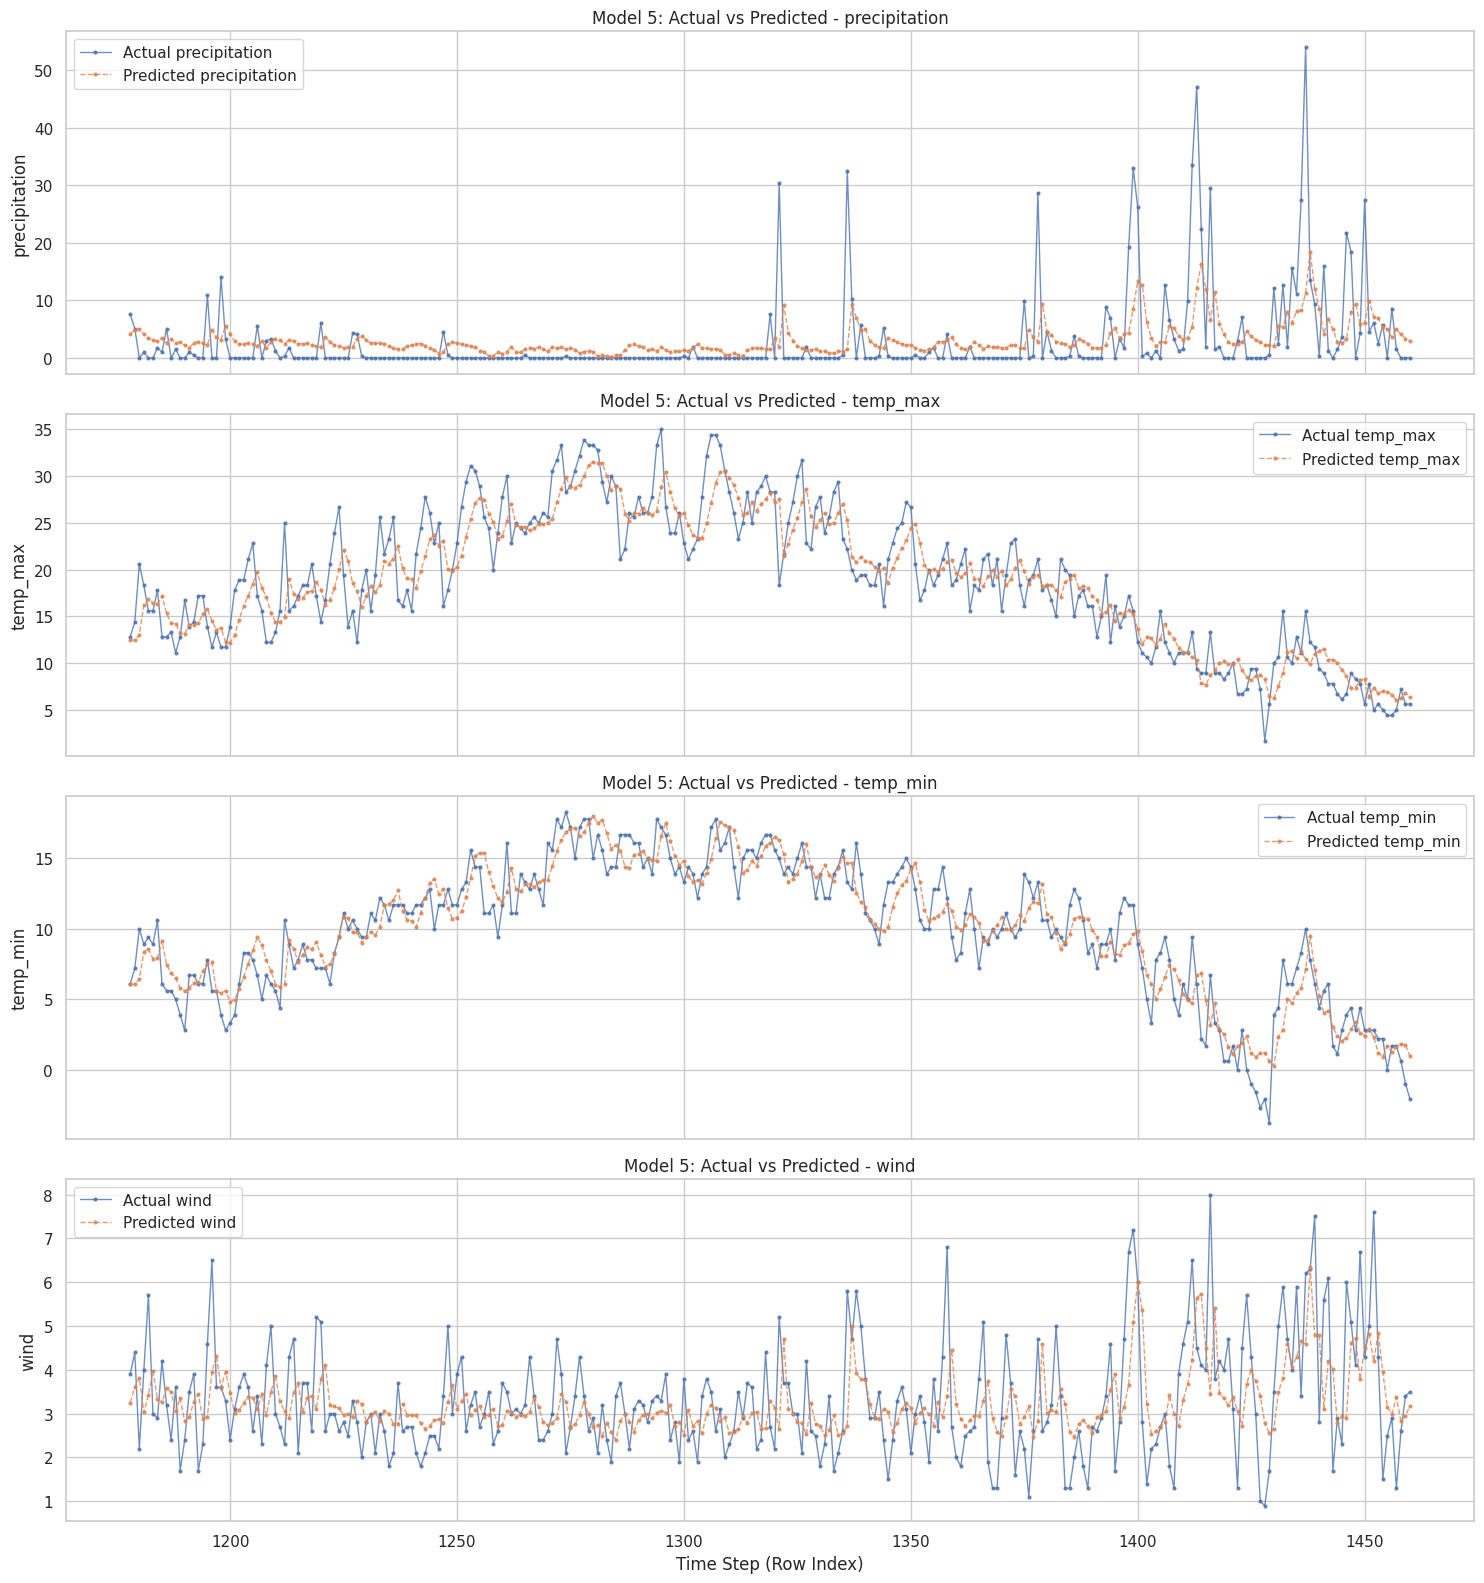

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# --- Predict and Visualize Model 5 Results ---

print("\n>>> Predicting and Visualizing Model 5 Results (All Features)...")

# Initialize variables
visualization_success_m5 = False
y_pred_actual_m5 = None # To store inverse-transformed predictions
y_test_actual_m5 = None # To store inverse-transformed actuals
pred_time_index_m5 = None # To store time index

# Check if prerequisites are met: evaluation success, model, scaler, test data, original df
if ('evaluation_success_m5' in locals() and evaluation_success_m5 and # Check if eval succeeded
    'model_m5' in locals() and model_m5 is not None and
    'scaler_m5' in locals() and scaler_m5 is not None and hasattr(scaler_m5, 'scale_') and
    'X_test_m5' in locals() and X_test_m5 is not None and
    'y_test_m5' in locals() and y_test_m5 is not None and # Scaled actual targets
    'df' in locals() and df is not None): # Original df for time index

    try:
        print("\n--- 1. Making Predictions ---")
        # Predict using the trained model (output is scaled)
        y_pred_scaled_m5 = model_m5.predict(X_test_m5)
        print(f"Predictions generated. Scaled shape: {y_pred_scaled_m5.shape}") # Expected: (num_test_sequences, N_FEATURES)

        print("\n--- 2. Inverse Scaling Predictions and Actual Values ---")
        # Inverse transform both predictions and actual targets (y_test_m5)
        # Both have shape (samples, features), matching scaler's expectation
        y_pred_actual_m5 = scaler_m5.inverse_transform(y_pred_scaled_m5)
        y_test_actual_m5 = scaler_m5.inverse_transform(y_test_m5)
        print("Inverse scaling completed.")
        print(f"Shape of actual original values (y_test_actual_m5): {y_test_actual_m5.shape}")
        print(f"Shape of predicted original values (y_pred_actual_m5): {y_pred_actual_m5.shape}")

        print("\n--- 3. Preparing Time Index for Plotting ---")
        # Calculate the start index in the original DataFrame 'df'
        if 'TEST_SPLIT_RATIO' not in locals(): TEST_SPLIT_RATIO = 0.2 # Define if missing
        if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10 # Define if missing
        split_index_m5 = int(len(df) * (1 - TEST_SPLIT_RATIO))
        start_index_pred_m5 = split_index_m5 + LOOKBACK_WINDOW
        end_index_pred_m5 = start_index_pred_m5 + len(y_test_actual_m5) # End index (exclusive)

        # Attempt to get a meaningful time index
        xlabel_plot = 'Time Step (Row Index)' # Default
        pred_time_index_m5 = np.arange(start_index_pred_m5, end_index_pred_m5) # Default

        if isinstance(df.index, pd.DatetimeIndex):
             if start_index_pred_m5 >= 0 and end_index_pred_m5 <= len(df.index):
                 pred_time_index_m5 = df.index[start_index_pred_m5:end_index_pred_m5]
                 xlabel_plot = 'Time / Date'
                 print("Using original DataFrame's DatetimeIndex for plotting.")
             else:
                 print(f"Warning: Index range [{start_index_pred_m5}:{end_index_pred_m5}] out of bounds for DatetimeIndex. Using numerical index.")
        elif 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
             try:
                 df_sorted = df.sort_values('date') # Sort if using date column
                 if start_index_pred_m5 >= 0 and end_index_pred_m5 <= len(df_sorted):
                      pred_time_index_m5 = df_sorted['date'].iloc[start_index_pred_m5:end_index_pred_m5]
                      xlabel_plot = 'Time / Date'
                      print("Using 'date' column (sorted) for plotting.")
                 else:
                      print(f"Warning: Index range [{start_index_pred_m5}:{end_index_pred_m5}] out of bounds for sorted 'date' column. Using numerical index.")
             except Exception as date_err:
                 print(f"Warning: Error using date column ({date_err}). Using numerical index.")
        else:
             print("Using original row index range for plotting.")


        # --- 4. Plotting Actual vs. Predicted Values (Subplots) ---
        print("\n--- 4. Plotting Actual vs Predicted (Subplots) ---")
        if y_pred_actual_m5 is not None and y_test_actual_m5 is not None and pred_time_index_m5 is not None:
            if len(pred_time_index_m5) == len(y_test_actual_m5): # Final check on length consistency

                num_features_to_plot = y_test_actual_m5.shape[1] # Should be N_FEATURES
                if num_features_to_plot != len(FEATURES):
                     print("Warning: Number of plotted features doesn't match FEATURES list length.")

                fig, axes = plt.subplots(num_features_to_plot, 1,
                                         figsize=(15, num_features_to_plot * 4), # Adjust height
                                         sharex=True)

                if num_features_to_plot == 1: axes = [axes] # Make iterable

                for i in range(num_features_to_plot):
                    feature_name = FEATURES[i] # Get feature name using index
                    axes[i].plot(pred_time_index_m5, y_test_actual_m5[:, i], label=f'Actual {feature_name}',
                                 marker='.', markersize=4, linestyle='-', linewidth=1, alpha=0.8)
                    axes[i].plot(pred_time_index_m5, y_pred_actual_m5[:, i], label=f'Predicted {feature_name}',
                                 marker='.', markersize=4, linestyle='--', linewidth=1, alpha=0.8)
                    axes[i].set_title(f'Model 5: Actual vs Predicted - {feature_name}')
                    axes[i].set_ylabel(feature_name)
                    axes[i].legend(loc='best') # Use 'best' location for legend
                    axes[i].grid(True)

                # Set common x-label and potentially format dates
                axes[-1].set_xlabel(xlabel_plot)
                if pd.api.types.is_datetime64_any_dtype(pred_time_index_m5):
                    fig.autofmt_xdate() # Improve date label formatting

                plt.tight_layout() # Adjust layout
                plt.show()
                visualization_success_m5 = True

            else:
                print(f"Error: Mismatch between time index length ({len(pred_time_index_m5)}) and data length ({len(y_test_actual_m5)}). Cannot plot.")
        else:
            print("Error: Missing predicted or actual data or time index for plotting.")


    except Exception as e:
        print(f"\nAn error occurred during Model 5 prediction or visualization: {e}")
        import traceback
        traceback.print_exc()

else:
    print("\nSkipping Model 5 prediction and visualization due to missing prerequisites:")
    # Add specific checks (similar to previous cells)
    if 'evaluation_success_m5' not in locals() or not evaluation_success_m5: print("- Model 5 evaluation was not successful or skipped.")
    # ... add other checks ...


# --- Final Check ---
# if visualization_success_m5:
#      print("\nModel 5 prediction and visualization completed.")
# else:
#      print("\nModel 5 prediction and visualization failed or was skipped.")

### Part 3: Multi-Step Future Prediction Models

Objective: Build, train, and evaluate multiple RNN models using Keras to predict 5 time steps into the future, using a sequence of 10 past observations from all four weather features.

#### General Instructions:

Use a lookback_window of 10 time steps for input sequences (X).
Use a prediction_horizon of 5 time steps for the output sequences (y).
Continue using appropriate scaling on the data before creating sequences.
Split your data into training and testing sets chronologically (e.g., 80/20 split).
Build Keras RNN models, considering how the output layer structure needs to handle predicting a sequence. A TimeDistributed layer is commonly used for this.

### Model 6: Predict multiple (prediction_horizon=5) precipitation values in future

### Data Preparation for Multi-Step Precipitation Prediction:
Prepare the data for training an RNN model to predict the next 5 precipitation values.

Scale the relevant features (precipitation, temp_max, temp_min, wind).

Create input sequences (X) of length 10 using the scaled features.

Create the corresponding output sequences (y) containing the scaled future precipitation values for the next 5 time steps for each input sequence.

Split the sequence data (X, y) into training and testing sets chronologically. Ensure the shapes of your training and testing X and y are correct (e.g., (num_samples, lookback_window, num_features) for X and (num_samples, prediction_horizon, 1) for y).

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Part 3: Multi-Step Future Prediction Models ---
print("\n\n--- Part 3: Multi-Step Future Prediction Models ---")

# --- Model 6: Predict multiple (prediction_horizon=5) precipitation values ---
print("\n>>> Model 6: Preparing Data for Multi-Step Precipitation Prediction...")

# --- Configuration (Define/Ensure constants are available) ---
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'N_FEATURES' not in locals(): N_FEATURES = len(FEATURES)
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'PREDICTION_HORIZON' not in locals(): PREDICTION_HORIZON = 5 # Crucial for multi-step
if 'TEST_SPLIT_RATIO' not in locals(): TEST_SPLIT_RATIO = 0.2

TARGET_FEATURE_MS_PRECIP = 'precipitation'
print(f"Target Feature: '{TARGET_FEATURE_MS_PRECIP}'")
print(f"Lookback Window: {LOOKBACK_WINDOW}")
print(f"Prediction Horizon: {PREDICTION_HORIZON}")
print(f"Input Features: {FEATURES}")

# --- Helper Function: Create Multi-Step Sequences ---
# (Ensure this function is defined, copy if needed)
def create_multistep_sequences(input_data, target_data, lookback, horizon):
    """ Creates sequences for multi-step RNN training. """
    X, y = [], []
    # Ensure target_data is 2D for consistent indexing, even if single feature
    if target_data.ndim == 1:
        target_data = target_data.reshape(-1, 1)

    # Check if data is long enough for at least one sequence
    min_len_needed = lookback + horizon
    if len(input_data) < min_len_needed:
        print(f"Warning: Data length ({len(input_data)}) too short for lookback={lookback} + horizon={horizon}.")
        return np.array(X), np.array(y)

    # Iterate up to the point where a full lookback and horizon are available
    for i in range(len(input_data) - lookback - horizon + 1):
        X.append(input_data[i:(i + lookback)])
        # Target is the sequence of values over the horizon steps
        y.append(target_data[i + lookback : i + lookback + horizon])
    return np.array(X), np.array(y)


# --- Data Preparation Steps ---
# Initialize variables
X_train_ms_p, y_train_ms_p, X_test_ms_p, y_test_ms_p, scaler_ms_p = None, None, None, None, None
data_prep_success_ms_p = False

# Check if the main DataFrame 'df' exists
if 'df' in locals() and df is not None:
    # Check if all required features exist
    if all(f in df.columns for f in FEATURES):
        try:
            print("\n--- 1. Selecting and Splitting Data ---")
            # Select features and convert to NumPy array
            data_for_scaling_ms_p = df[FEATURES].astype(np.float32).values

            # Calculate split point
            n_samples_total_ms_p = len(data_for_scaling_ms_p)
            split_index_ms_p = int(n_samples_total_ms_p * (1 - TEST_SPLIT_RATIO))
            print(f"Total samples: {n_samples_total_ms_p}, Training samples: {split_index_ms_p}, Testing samples: {n_samples_total_ms_p - split_index_ms_p}")

            # Split data chronologically
            train_data_ms_p = data_for_scaling_ms_p[:split_index_ms_p]
            test_data_ms_p = data_for_scaling_ms_p[split_index_ms_p:]
            print(f"Raw train_data shape: {train_data_ms_p.shape}")
            print(f"Raw test_data shape: {test_data_ms_p.shape}")

            print("\n--- 2. Scaling Data ---")
            # Initialize scaler (fit on training data ONLY)
            # Using a separate scaler for multi-step in case scaling strategy differs later
            scaler_ms_p = MinMaxScaler(feature_range=(0, 1))
            scaled_train_data_ms_p = scaler_ms_p.fit_transform(train_data_ms_p)
            scaled_test_data_ms_p = scaler_ms_p.transform(test_data_ms_p)
            print("Data scaled using MinMaxScaler (fit on train data).")
            print(f"Scaled train_data shape: {scaled_train_data_ms_p.shape}")
            print(f"Scaled test_data shape: {scaled_test_data_ms_p.shape}")

            # Identify the index of the target feature *within the scaled array*
            try:
                target_col_index_ms_precip = FEATURES.index(TARGET_FEATURE_MS_PRECIP)
                print(f"Index of target feature '{TARGET_FEATURE_MS_PRECIP}' in scaled data: {target_col_index_ms_precip}")
            except ValueError:
                 raise ValueError(f"Target feature '{TARGET_FEATURE_MS_PRECIP}' not found in FEATURES list: {FEATURES}")

            print("\n--- 3. Creating Multi-Step Input/Output Sequences ---")
            # Create sequences for training
            # Input (X): sequences of shape (lookback, n_features) from scaled_train_data
            # Output (y): sequences of shape (horizon, 1) containing only the scaled precipitation values
            X_train_ms_p, y_train_ms_p = create_multistep_sequences(
                input_data=scaled_train_data_ms_p,
                target_data=scaled_train_data_ms_p[:, target_col_index_ms_precip], # Target is ONLY the scaled precip column
                lookback=LOOKBACK_WINDOW,
                horizon=PREDICTION_HORIZON # Pass the horizon here
            )

            # Create sequences for testing
            X_test_ms_p, y_test_ms_p = create_multistep_sequences(
                input_data=scaled_test_data_ms_p,
                target_data=scaled_test_data_ms_p[:, target_col_index_ms_precip], # Target is ONLY the scaled precip column
                lookback=LOOKBACK_WINDOW,
                horizon=PREDICTION_HORIZON
            )

            # --- 4. Verify Shapes ---
            print("\n--- 4. Verifying Sequence Shapes ---")
            if X_train_ms_p.size == 0 or X_test_ms_p.size == 0:
                raise ValueError(f"Multi-step sequence creation resulted in empty arrays. "
                                 f"Check data length ({n_samples_total_ms_p}) vs lookback ({LOOKBACK_WINDOW}) "
                                 f"and horizon ({PREDICTION_HORIZON}).")

            print(f"X_train_ms_p shape: {X_train_ms_p.shape}") # Expected: (num_train_sequences, LOOKBACK_WINDOW, N_FEATURES)
            print(f"y_train_ms_p shape: {y_train_ms_p.shape}") # Expected: (num_train_sequences, PREDICTION_HORIZON, 1) <--- Key Change!
            print(f"X_test_ms_p shape: {X_test_ms_p.shape}")   # Expected: (num_test_sequences, LOOKBACK_WINDOW, N_FEATURES)
            print(f"y_test_ms_p shape: {y_test_ms_p.shape}")   # Expected: (num_test_sequences, PREDICTION_HORIZON, 1) <--- Key Change!

            # --- Final Shape Assertions (Optional but good practice) ---
            assert X_train_ms_p.shape[1] == LOOKBACK_WINDOW, "X_train lookback dimension mismatch"
            assert X_train_ms_p.shape[2] == N_FEATURES, "X_train features dimension mismatch"
            assert y_train_ms_p.shape[1] == PREDICTION_HORIZON, "y_train horizon dimension mismatch"
            assert y_train_ms_p.shape[2] == 1, "y_train target features mismatch (should be 1 for single target)"
            assert X_test_ms_p.shape[1] == LOOKBACK_WINDOW, "X_test lookback dimension mismatch"
            assert X_test_ms_p.shape[2] == N_FEATURES, "X_test features dimension mismatch"
            assert y_test_ms_p.shape[1] == PREDICTION_HORIZON, "y_test horizon dimension mismatch"
            assert y_test_ms_p.shape[2] == 1, "y_test target features mismatch (should be 1 for single target)"
            print("Shape assertions passed.")

            data_prep_success_ms_p = True
            print("\nData preparation for Model 6 (Multi-Step Precipitation) completed successfully.")

        except Exception as e:
            print(f"\nAn error occurred during data preparation for Model 6: {e}")
            import traceback
            traceback.print_exc() # Print detailed traceback
            # Reset variables on error
            X_train_ms_p, y_train_ms_p, X_test_ms_p, y_test_ms_p, scaler_ms_p = None, None, None, None, None

    else:
        missing_required = [f for f in FEATURES if f not in df.columns]
        print(f"\nError: DataFrame 'df' is missing required features for Model 6: {missing_required}")
else:
    print("\nError: DataFrame 'df' not available or not loaded successfully.")
    print("Cannot prepare data for Model 6.")



--- Part 3: Multi-Step Future Prediction Models ---

>>> Model 6: Preparing Data for Multi-Step Precipitation Prediction...
Target Feature: 'precipitation'
Lookback Window: 10
Prediction Horizon: 5
Input Features: ['precipitation', 'temp_max', 'temp_min', 'wind']

--- 1. Selecting and Splitting Data ---
Total samples: 1461, Training samples: 1168, Testing samples: 293
Raw train_data shape: (1168, 4)
Raw test_data shape: (293, 4)

--- 2. Scaling Data ---
Data scaled using MinMaxScaler (fit on train data).
Scaled train_data shape: (1168, 4)
Scaled test_data shape: (293, 4)
Index of target feature 'precipitation' in scaled data: 0

--- 3. Creating Multi-Step Input/Output Sequences ---

--- 4. Verifying Sequence Shapes ---
X_train_ms_p shape: (1154, 10, 4)
y_train_ms_p shape: (1154, 5, 1)
X_test_ms_p shape: (279, 10, 4)
y_test_ms_p shape: (279, 5, 1)
Shape assertions passed.

Data preparation for Model 6 (Multi-Step Precipitation) completed successfully.


#### Build RNN Model for Multi-Step Precipitation:
Design and implement a Keras Sequential model using RNN layers (e.g., LSTM or GRU) suitable for predicting a sequence of 5 future precipitation values.

Define the input shape (lookback_window, number of features).

Add one or more RNN layers, making sure the last one returns sequences (return_sequences=True).

Add a TimeDistributed(Dense(1)) layer to output a single value for each step in the output sequence.

Print the model summary and confirm the output shape matches (None, prediction_horizon, 1).

In [ ]:
# Write your code here
# ============================================================
# CELL: Model 6 - Build Model (CORRECTED Architecture)
# ============================================================

# --- Import necessary Keras layers ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape
import traceback # For printing error details
import numpy as np # Ensure numpy is imported

print("\n>>> Building Model 6 (Multi-Step Precipitation - CORRECTED Direct Architecture)...")

# --- Prerequisites Check & Variable Initialization ---
# Define necessary configuration variables if they might be missing from prior cells
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'N_FEATURES' not in locals(): N_FEATURES = len(FEATURES)
if 'PREDICTION_HORIZON' not in locals(): PREDICTION_HORIZON = 5
if 'TARGET_FEATURE_MS_PRECIP' not in locals(): TARGET_FEATURE_MS_PRECIP = 'precipitation'

# Initialize model variable and success flag for this specific build step
model_ms_p = None
model_built_success_ms_p = False # Reset flag specific to this build attempt

# Proceed only if data preparation for Model 6 was successful
# and the necessary input data (X_train_ms_p) exists with correct dimensions
if ('data_prep_success_ms_p' in locals() and data_prep_success_ms_p and
    'X_train_ms_p' in locals() and X_train_ms_p is not None):

    # Verify the shape of the prepared input data matches expectations
    if (X_train_ms_p.shape[1] == LOOKBACK_WINDOW and X_train_ms_p.shape[2] == N_FEATURES):
        print(f"Using input data with shape: {X_train_ms_p.shape}")
        try:
            # 1. Define the Model Architecture using Keras Sequential API
            model_ms_p = Sequential(name=f"MultiStep_{TARGET_FEATURE_MS_PRECIP}_Direct") # Reflects direct prediction

            # --- Add RNN Layer(s) ---
            # LSTM Layer with return_sequences=False
            model_ms_p.add(LSTM(
                units=64,                          # Number of LSTM units
                input_shape=(LOOKBACK_WINDOW, N_FEATURES), # Define input shape
                return_sequences=False,            # Output only the final hidden state
                name='LSTM_Layer'
            ))

            # Optional: Add Dropout layer here if desired
            # model_ms_p.add(Dropout(0.2, name='Dropout_Layer'))

            # --- Add Dense Layer ---
            # Predicts PREDICTION_HORIZON flattened values for the target feature
            model_ms_p.add(Dense(
                units=PREDICTION_HORIZON,          # units = steps ahead
                activation=None,                   # Linear activation for regression
                name='Dense_Output_Flattened'
            ))

            # --- Add Reshape Layer ---
            # Reshape the output to match the target shape (horizon, 1 feature)
            model_ms_p.add(Reshape(
                target_shape=(PREDICTION_HORIZON, 1), # Target shape (5, 1)
                name='Reshape_Output'
            ))

            # 2. Print the Model Summary
            print("\nModel Summary (Corrected Architecture):")
            model_ms_p.summary(print_fn=lambda x: print(x))

            # 3. Confirm Output Shape
            model_output_shape = model_ms_p.output_shape
            expected_output_shape = (None, PREDICTION_HORIZON, 1)
            print(f"\nModel final output shape: {model_output_shape}")
            print(f"Expected target data shape: {expected_output_shape}")

            if model_output_shape == expected_output_shape:
                print("--> Model output shape matches the expected target data shape.")
                model_built_success_ms_p = True # Set success flag
                print("\nCorrected Model 6 built successfully.")
            else:
                raise RuntimeError(f"Model output shape mismatch: {model_output_shape} vs {expected_output_shape}")

        except Exception as e:
            print(f"\nAn error occurred during Model 6 building: {e}")
            traceback.print_exc()
            model_ms_p = None
            model_built_success_ms_p = False

    else:
        print("\nError: Prepared training data ('X_train_ms_p') has incorrect shape for model input.")
        print(f"  Expected shape: (*, {LOOKBACK_WINDOW}, {N_FEATURES})")
        print(f"  Actual shape: {X_train_ms_p.shape}")
        model_built_success_ms_p = False

else:
    print("\nSkipping Model 6 building: Data preparation was not successful or data ('X_train_ms_p') is missing.")
    model_built_success_ms_p = False

# --- Final Status Check ---
if model_built_success_ms_p:
    print("\nModel 6 is ready for compilation and training.")
else:
     print("\nModel 6 building failed or was skipped.")


>>> Building Model 6 (Multi-Step Precipitation - CORRECTED Direct Architecture)...
Using input data with shape: (1154, 10, 4)

Model Summary (Corrected Architecture):


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MultiStep_precipitation_Direct"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output_Flattened (Dense)  │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘
 Total params: 17,989 (70.27 KB)
 Trainable params: 17,989 (70.27 KB)
 Non-trainable params: 0 (0.00 B)


Model final output shape: (None, 5, 1)
Expected target data shape: (None, 5, 1)
--> Model output shape matches the expected target data shape.

Corrected Model 6

#### Compile and Train Model 6:
Compile the multi-step precipitation prediction model.

Use 'adam' optimizer.

Use 'mean_squared_error' as the loss function.

Add 'mean_absolute_error' as a metric. Train the model using your prepared training data for a reasonable number of epochs and batch size.


>>> Compiling and Training Model 6 (Multi-Step Precipitation)...
Training parameters: Epochs=40, Batch Size=32
Using callbacks: ['EarlyStopping', 'ReduceLROnPlateau']

Compiling model...
Model compiled successfully.

Starting training for up to 40 epochs (with callbacks)...
Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0846 - val_loss: 0.0185 - val_mean_absolute_error: 0.0762 - learning_rate: 0.0010
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0703 - val_loss: 0.0178 - val_mean_absolute_error: 0.0714 - learning_rate: 0.0010
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0126 - mean_absolute_error: 0.0696 - val_loss: 0.0177 - val_mean_absolute_error: 0.0700 - learning_rate: 0.0010
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - mean_absolute_error: 0.0692 - val_loss: 0.0175 - val_mean_absolute_error: 0.0699 - learning_rate: 0.0010
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━

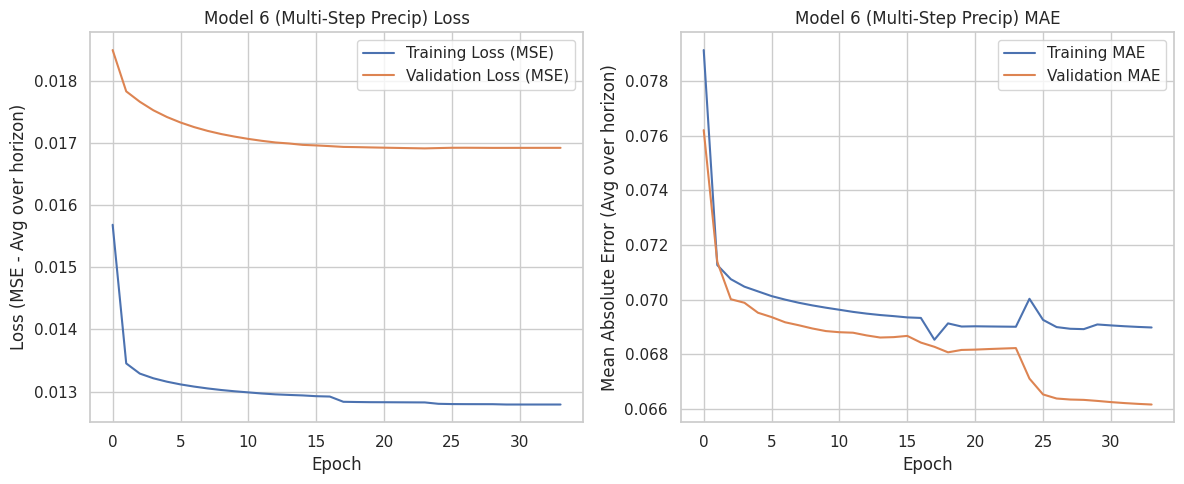

In [ ]:
# Write your code here
# Import necessary components if not already imported
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt # For plotting history

# --- Compile and Train Model 6 (Multi-Step Precipitation) ---

print("\n>>> Compiling and Training Model 6 (Multi-Step Precipitation)...")

# Initialize history variable
history_ms_p = None
training_success_ms_p = False

# Proceed only if the model was built successfully (with corrected architecture) and data is ready
if ('model_built_success_ms_p' in locals() and model_built_success_ms_p and
    'data_prep_success_ms_p' in locals() and data_prep_success_ms_p):

    # Double-check that model and data variables actually exist
    if (model_ms_p is not None and X_train_ms_p is not None and y_train_ms_p is not None and
        X_test_ms_p is not None and y_test_ms_p is not None):
        try:
            # --- Define Training Parameters ---
            # Using EPOCHS_MULTI for multi-step models, define if not present
            if 'EPOCHS_MULTI' not in locals(): EPOCHS_MULTI = 40 # Default reasonable epochs for multi-step
            if 'BATCH_SIZE' not in locals(): BATCH_SIZE = 32 # Can reuse batch size
            current_epochs = EPOCHS_MULTI
            current_batch_size = BATCH_SIZE
            print(f"Training parameters: Epochs={current_epochs}, Batch Size={current_batch_size}")
            # Consider adding callbacks like EarlyStopping and ReduceLROnPlateau for multi-step
            callbacks_list_ms = []
            early_stopping_ms = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
            reduce_lr_ms = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-6)
            callbacks_list_ms.extend([early_stopping_ms, reduce_lr_ms])
            # Optional: Add ModelCheckpoint if needed
            # checkpoint_path_ms_p = os.path.join(CHECKPOINT_DIR, 'multistep_precip_best.keras')
            # model_checkpoint_ms_p = ModelCheckpoint(filepath=checkpoint_path_ms_p, ...)
            # callbacks_list_ms.append(model_checkpoint_ms_p)
            print(f"Using callbacks: { [cb.__class__.__name__ for cb in callbacks_list_ms] }")


            # --- 1. Compile the Model ---
            print("\nCompiling model...")
            optimizer_ms_p = Adam(learning_rate=0.001) # Use LEARNING_RATE if defined globally
            loss_function_ms_p = 'mean_squared_error'
            metrics_to_track_ms_p = ['mean_absolute_error']

            model_ms_p.compile(
                optimizer=optimizer_ms_p,
                loss=loss_function_ms_p,
                metrics=metrics_to_track_ms_p
            )
            print("Model compiled successfully.")

            # --- 2. Train the Model ---
            print(f"\nStarting training for up to {current_epochs} epochs (with callbacks)...")
            # Train using the prepared multi-step data (X_train_ms_p, y_train_ms_p)
            history_ms_p = model_ms_p.fit(
                X_train_ms_p, y_train_ms_p,                 # Training data
                epochs=current_epochs,                      # Max number of epochs
                batch_size=current_batch_size,              # Batch size
                validation_data=(X_test_ms_p, y_test_ms_p), # Validation data
                callbacks=callbacks_list_ms,                # Add callbacks here
                shuffle=False,                              # DO NOT SHUFFLE time series
                verbose=1                                   # Show progress
            )
            print("\nTraining finished (may have stopped early).")
            training_success_ms_p = True

            # --- 3. Plot Training History ---
            print("\nPlotting training history (Loss and MAE)...")
            if history_ms_p is not None and history_ms_p.history:
                 plt.figure(figsize=(12, 5))

                 # Plot Loss (MSE) - Represents average MSE across the 5 output steps
                 plt.subplot(1, 2, 1)
                 plt.plot(history_ms_p.history['loss'], label='Training Loss (MSE)')
                 plt.plot(history_ms_p.history['val_loss'], label='Validation Loss (MSE)')
                 plt.title('Model 6 (Multi-Step Precip) Loss')
                 plt.xlabel('Epoch')
                 plt.ylabel('Loss (MSE - Avg over horizon)')
                 plt.legend()
                 plt.grid(True)

                 # Plot Metric (MAE) - Represents average MAE across the 5 output steps
                 plt.subplot(1, 2, 2)
                 plt.plot(history_ms_p.history['mean_absolute_error'], label='Training MAE')
                 plt.plot(history_ms_p.history['val_mean_absolute_error'], label='Validation MAE')
                 plt.title('Model 6 (Multi-Step Precip) MAE')
                 plt.xlabel('Epoch')
                 plt.ylabel('Mean Absolute Error (Avg over horizon)')
                 plt.legend()
                 plt.grid(True)

                 plt.tight_layout()
                 plt.show()
            else:
                 print("Could not plot history: History object is empty or None.")

        except Exception as e:
            print(f"\nAn error occurred during Model 6 compilation or training: {e}")
            import traceback
            traceback.print_exc() # Print full traceback
            history_ms_p = None
            training_success_ms_p = False

    else:
        print("\nError: Model 6 or prepared data (X/y train/test for Model 6) is not available or None.")
        training_success_ms_p = False
else:
    print("\nSkipping Model 6 compilation and training because model building or data preparation failed.")
    training_success_ms_p = False

# --- Final Check ---
# if training_success_ms_p:
#      print("\nModel 6 training completed. History is available in 'history_ms_p'.")
# else:
#      print("\nModel 6 training failed or was skipped.")

#### Evaluate Model 6 Performance:
Evaluate the trained multi-step precipitation prediction model on the test dataset.

Report the loss (MSE) and the MAE on the test set. These metrics represent the average error over the 5 predicted time steps.

Discuss how you could calculate and analyze the performance metrics (e.g., MSE or MAE) specifically for each of the 5 predicted future time steps.

In [ ]:
# Write your code here
import numpy as np
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error # For individual step eval

# --- Evaluate Model 6 Performance ---

print("\n>>> Evaluating Model 6 Performance (Multi-Step Precipitation)...")

# Initialize metrics dictionary
model6_metrics = {'Overall_MSE': np.nan, 'Overall_MAE': np.nan, 'Overall_RMSE': np.nan}
evaluation_success_ms_p = False

# Proceed only if training was marked successful and test data/model exist
if ('training_success_ms_p' in locals() and training_success_ms_p and
    'model_ms_p' in locals() and model_ms_p is not None and
    'X_test_ms_p' in locals() and X_test_ms_p is not None and
    'y_test_ms_p' in locals() and y_test_ms_p is not None): # Scaled multi-step targets

    try:
        # 1. Evaluate using Keras .evaluate() on SCALED data
        # This gives the overall loss (average MSE across steps) and metric (average MAE across steps)
        print("Evaluating model on the (scaled) test data using model.evaluate()...")
        results_ms_p_scaled = model_ms_p.evaluate(X_test_ms_p, y_test_ms_p, verbose=0)

        overall_mse_scaled = results_ms_p_scaled[0]
        overall_mae_scaled = results_ms_p_scaled[1]
        overall_rmse_scaled = math.sqrt(overall_mse_scaled)

        print("\n--- Model 6 Performance Metrics (Test Set - SCALED Data) ---")
        print(f" Overall Test Loss (MSE - Scaled): {overall_mse_scaled:.6f}")
        print(f" Overall Test MAE (Scaled):        {overall_mae_scaled:.6f}")
        print(f" Overall Test RMSE (Scaled):       {overall_rmse_scaled:.6f}")
        print(f" (Note: These metrics are averaged over the {PREDICTION_HORIZON} predicted steps on the 0-1 scale)")

        # --- Optional but Recommended: Evaluate on ORIGINAL Scale ---
        print("\nCalculating metrics on the ORIGINAL data scale...")
        if 'scaler_ms_p' in locals() and scaler_ms_p is not None and hasattr(scaler_ms_p, 'scale_'):
             if 'FEATURES' not in locals() or 'TARGET_FEATURE_MS_PRECIP' not in locals():
                 raise NameError("FEATURES list or TARGET_FEATURE_MS_PRECIP not defined for inverse scaling.")
             if TARGET_FEATURE_MS_PRECIP not in FEATURES:
                  raise ValueError(f"Target feature '{TARGET_FEATURE_MS_PRECIP}' not in FEATURES list.")

             # Make predictions (output is scaled sequences, shape: samples, horizon, 1)
             y_pred_scaled_ms_p = model_ms_p.predict(X_test_ms_p)

             # Inverse transform requires reshaping and dummy arrays
             num_samples_test = y_test_ms_p.shape[0]
             n_features_scaler = scaler_ms_p.n_features_in_
             target_col_index = FEATURES.index(TARGET_FEATURE_MS_PRECIP)

             # Reshape predicted and actual sequences to 2D (samples * horizon, 1)
             pred_flat_scaled = y_pred_scaled_ms_p.reshape(-1, 1)
             actual_flat_scaled = y_test_ms_p.reshape(-1, 1)

             # Create dummy arrays
             dummy_pred = np.zeros((len(pred_flat_scaled), n_features_scaler))
             dummy_actual = np.zeros((len(actual_flat_scaled), n_features_scaler))

             # Place scaled data into the correct column
             dummy_pred[:, target_col_index] = pred_flat_scaled[:, 0]
             dummy_actual[:, target_col_index] = actual_flat_scaled[:, 0]

             # Inverse transform
             y_pred_actual_flat = scaler_ms_p.inverse_transform(dummy_pred)[:, target_col_index]
             y_test_actual_flat = scaler_ms_p.inverse_transform(dummy_actual)[:, target_col_index]

             # Calculate overall metrics on the flattened original scale data
             overall_mse_orig = mean_squared_error(y_test_actual_flat, y_pred_actual_flat)
             overall_mae_orig = mean_absolute_error(y_test_actual_flat, y_pred_actual_flat)
             overall_rmse_orig = math.sqrt(overall_mse_orig)

             print("\n--- Model 6 Performance Metrics (Test Set - ORIGINAL Scale) ---")
             print(f" Overall Test MSE (Original Scale): {overall_mse_orig:.4f}")
             print(f" Overall Test MAE (Original Scale): {overall_mae_orig:.4f}")
             print(f" Overall Test RMSE (Original Scale): {overall_rmse_orig:.4f}")
             print(f" (Note: These metrics are averaged over the {PREDICTION_HORIZON} predicted steps on the original scale)")

             # Store original scale metrics
             model6_metrics['Overall_MSE'] = overall_mse_orig
             model6_metrics['Overall_MAE'] = overall_mae_orig
             model6_metrics['Overall_RMSE'] = overall_rmse_orig
             evaluation_success_ms_p = True # Mark success

        else:
             print("\nWarning: Scaler 'scaler_ms_p' not available or not fitted. Cannot calculate metrics on original scale.")
             # Store scaled metrics if original calc fails
             model6_metrics['Overall_MSE'] = overall_mse_scaled
             model6_metrics['Overall_MAE'] = overall_mae_scaled
             model6_metrics['Overall_RMSE'] = overall_rmse_scaled
             evaluation_success_ms_p = True # Mark success based on scaled eval


        # --- Discussion: Evaluating Performance per Time Step ---
        print("\n--- Discussion: Evaluating Performance per Prediction Step ---")
        print("The overall metrics above average the error across all future time steps predicted.")
        print(f"To analyze performance specifically for each of the {PREDICTION_HORIZON} steps:")
        print("  1. Use the model to predict the sequences (`y_pred_scaled_ms_p`). Shape: (samples, horizon, 1)")
        print("  2. Obtain the actual scaled target sequences (`y_test_ms_p`). Shape: (samples, horizon, 1)")
        print("  3. Inverse transform both predictions and actuals to the original scale,")
        print("     maintaining the sequence structure (samples, horizon, 1). Let's call these")
        print("     `y_pred_actual_ms_p` and `y_test_actual_ms_p` (after reshaping back from flat).")
        print("  4. Iterate through each future time step (from 0 to horizon-1):")
        print("     - For step `s`: Isolate the predictions and actuals for that specific step:")
        print("       `actual_step_s = y_test_actual_ms_p[:, s, 0]`") # Shape: (samples,)
        print("       `predicted_step_s = y_pred_actual_ms_p[:, s, 0]`") # Shape: (samples,)
        print("     - Calculate the desired metric (e.g., MAE, MSE, RMSE) comparing these two vectors:")
        print("       `mae_step_s = mean_absolute_error(actual_step_s, predicted_step_s)`")
        print("       `rmse_step_s = math.sqrt(mean_squared_error(actual_step_s, predicted_step_s))`")
        print("  5. Analyze how the metric changes across the steps (e.g., does MAE increase for steps further in the future?).")

        # Example calculation for MAE per step (if original scale evaluation succeeded)
        if evaluation_success_ms_p and 'y_pred_actual_flat' in locals():
            try:
                # Reshape back to (samples, horizon) for easier slicing per step
                # Need to ensure y_test_actual_flat was also calculated
                num_samples_test = X_test_ms_p.shape[0] # Get number of samples from X_test
                y_pred_actual_ms_p = y_pred_actual_flat.reshape(num_samples_test, PREDICTION_HORIZON)
                y_test_actual_ms_p = y_test_actual_flat.reshape(num_samples_test, PREDICTION_HORIZON)

                print("\nExample: MAE per Prediction Step (Original Scale):")
                for step in range(PREDICTION_HORIZON):
                     mae_step = mean_absolute_error(y_test_actual_ms_p[:, step], y_pred_actual_ms_p[:, step])
                     print(f"  - Step {step+1}: MAE = {mae_step:.4f}")
                # You would repeat this for other metrics like RMSE if needed.
            except Exception as e_ind:
                 print(f"\nCould not calculate example per-step metrics: {e_ind}")


    except Exception as e:
        print(f"\nAn error occurred during Model 6 evaluation: {e}")
        import traceback
        traceback.print_exc()
        evaluation_success_ms_p = False # Ensure flag is false on error

else:
    print("\nSkipping Model 6 evaluation because prerequisites are not met:")
    # Add specific checks to see what's missing
    if 'training_success_ms_p' not in locals() or not training_success_ms_p: print("- Model 6 training was not marked as successful.")
    if 'model_ms_p' not in locals() or model_ms_p is None: print("- Trained model ('model_ms_p') is not available.")
    # ... add checks for X_test_ms_p, y_test_ms_p ...
    evaluation_success_ms_p = False


# --- Final Check and Store ---
# if evaluation_success_ms_p:
#      print("\nModel 6 evaluation completed.")
#      # Add metrics to the main multi-step collection if it exists
#      if 'multi_step_metrics' in locals():
#          multi_step_metrics['Model 6 (Precip)'] = model6_metrics
# else:
#      print("\nModel 6 evaluation failed or was skipped.")


>>> Evaluating Model 6 Performance (Multi-Step Precipitation)...
Evaluating model on the (scaled) test data using model.evaluate()...

--- Model 6 Performance Metrics (Test Set - SCALED Data) ---
 Overall Test Loss (MSE - Scaled): 0.016914
 Overall Test MAE (Scaled):        0.068229
 Overall Test RMSE (Scaled):       0.130054
 (Note: These metrics are averaged over the 5 predicted steps on the 0-1 scale)

Calculating metrics on the ORIGINAL data scale...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

--- Model 6 Performance Metrics (Test Set - ORIGINAL Scale) ---
 Overall Test MSE (Original Scale): 49.5038
 Overall Test MAE (Original Scale): 3.6912
 Overall Test RMSE (Original Scale): 7.0359
 (Note: These metrics are averaged over the 5 predicted steps on the original scale)

--- Discussion: Evaluating Performance per Prediction Step ---
The overall metrics above average the error across all future time steps predicted.
To analyze performance specifically for each of the 5 steps:
  1. Use the

#### Predict and Visualize Model 6 Results:
Use the trained model to make predictions on the test set input sequences.

The model output will have shape (num_test_samples, prediction_horizon, 1).

Inverse scale the predictions and the actual test precipitation sequences.

Select a few example test samples and plot their actual future precipitation sequences against the model's predicted sequences. Alternatively, plot the average predicted precipitation across the test set for each of the 5 steps against the actual average.


>>> Predicting and Visualizing Model 6 Results...

--- 1. Making Predictions ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Predictions generated. Scaled shape: (279, 5, 1)

--- 2. Inverse Scaling Predictions and Actual Values ---
Inverse scaling completed.
Shape of actual original sequences (y_test_actual_ms_p): (279, 5)
Shape of predicted original sequences (y_pred_actual_ms_p): (279, 5)

--- Plotting Example Predictions vs Actuals ---
Plotting examples for test sample indices: [ 33 278  23]


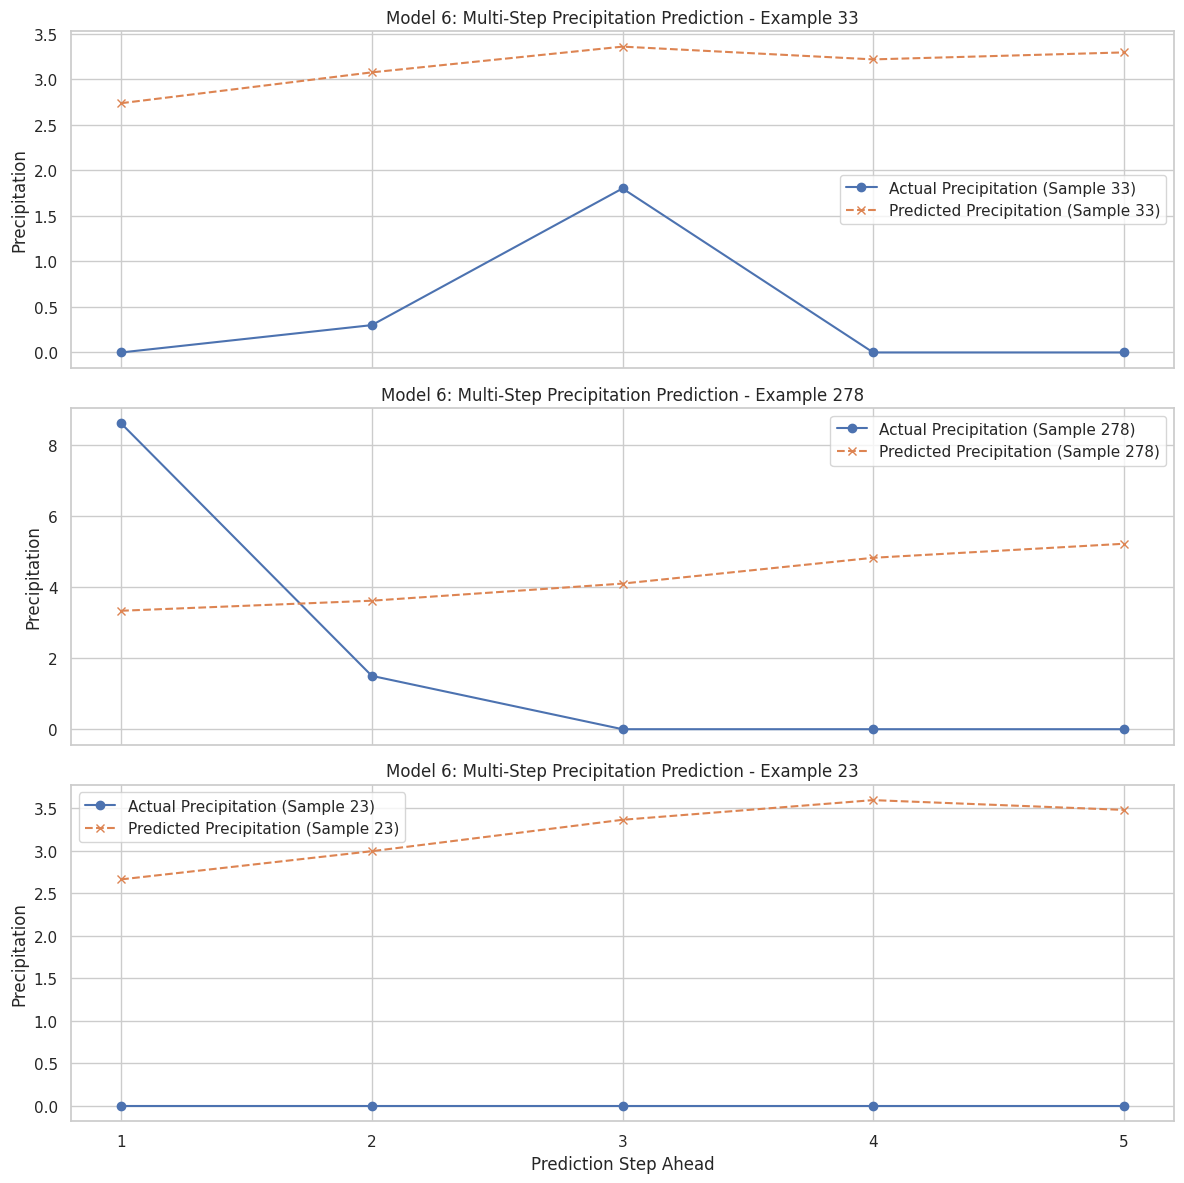


--- Plotting Average Prediction vs Average Actual per Step ---


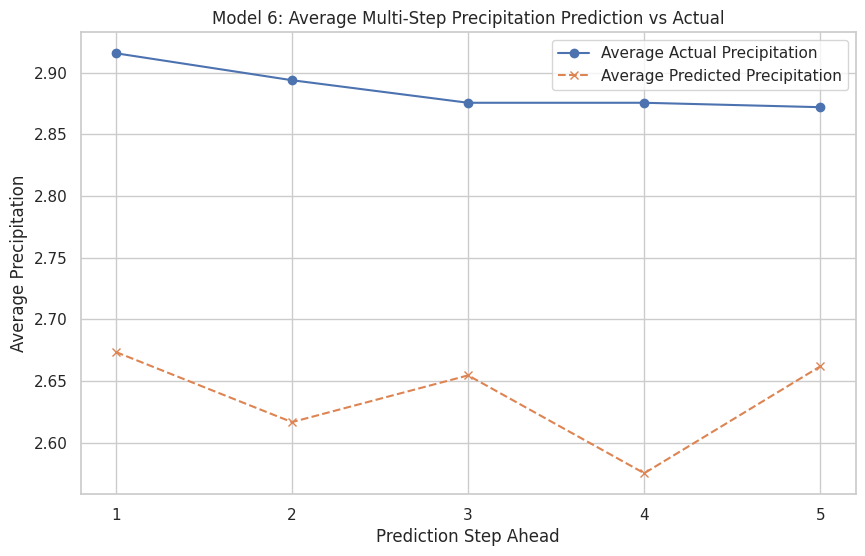

In [ ]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# --- Predict and Visualize Model 6 Results (Multi-Step Precipitation) ---

print("\n>>> Predicting and Visualizing Model 6 Results...")

# Initialize variables
visualization_success_ms_p = False
y_pred_actual_ms_p = None # To store inverse-transformed predictions (samples, horizon)
y_test_actual_ms_p = None # To store inverse-transformed actuals (samples, horizon)

# Check if prerequisites are met: evaluation success, model, scaler, test data
if ('evaluation_success_ms_p' in locals() and evaluation_success_ms_p and
    'model_ms_p' in locals() and model_ms_p is not None and
    'scaler_ms_p' in locals() and scaler_ms_p is not None and hasattr(scaler_ms_p, 'scale_') and
    'X_test_ms_p' in locals() and X_test_ms_p is not None and # Input sequences
    'y_test_ms_p' in locals() and y_test_ms_p is not None): # Scaled target sequences

    try:
        print("\n--- 1. Making Predictions ---")
        # Predict using the trained model (output is scaled sequences)
        y_pred_scaled_ms_p = model_ms_p.predict(X_test_ms_p)
        print(f"Predictions generated. Scaled shape: {y_pred_scaled_ms_p.shape}") # Expected: (num_test_samples, PREDICTION_HORIZON, 1)

        print("\n--- 2. Inverse Scaling Predictions and Actual Values ---")
        # Reuse the inverse scaling logic from the evaluation step
        # Reshape -> Dummy Array -> Inverse Transform -> Reshape back

        num_samples_test = y_test_ms_p.shape[0]
        n_features_scaler = scaler_ms_p.n_features_in_
        target_col_index = FEATURES.index(TARGET_FEATURE_MS_PRECIP) # Assumes TARGET_FEATURE_MS_PRECIP is defined

        # Reshape predicted and actual sequences to 2D (samples * horizon, 1)
        pred_flat_scaled = y_pred_scaled_ms_p.reshape(-1, 1)
        actual_flat_scaled = y_test_ms_p.reshape(-1, 1)

        # Create dummy arrays
        dummy_pred = np.zeros((len(pred_flat_scaled), n_features_scaler))
        dummy_actual = np.zeros((len(actual_flat_scaled), n_features_scaler))

        # Place scaled data into the correct column
        dummy_pred[:, target_col_index] = pred_flat_scaled[:, 0]
        dummy_actual[:, target_col_index] = actual_flat_scaled[:, 0]

        # Inverse transform
        y_pred_actual_flat = scaler_ms_p.inverse_transform(dummy_pred)[:, target_col_index]
        y_test_actual_flat = scaler_ms_p.inverse_transform(dummy_actual)[:, target_col_index]

        # Reshape back to (samples, horizon) - dropping the last dimension of size 1
        y_pred_actual_ms_p = y_pred_actual_flat.reshape(num_samples_test, PREDICTION_HORIZON)
        y_test_actual_ms_p = y_test_actual_flat.reshape(num_samples_test, PREDICTION_HORIZON)

        print("Inverse scaling completed.")
        print(f"Shape of actual original sequences (y_test_actual_ms_p): {y_test_actual_ms_p.shape}")
        print(f"Shape of predicted original sequences (y_pred_actual_ms_p): {y_pred_actual_ms_p.shape}")


        # --- 3. Visualization Option 1: Plot Example Sequences ---
        print("\n--- Plotting Example Predictions vs Actuals ---")
        num_examples_to_plot = 3 # Choose how many examples to show
        if num_samples_test < num_examples_to_plot:
            num_examples_to_plot = num_samples_test # Adjust if test set is smaller

        # Select random indices from the test set
        example_indices = np.random.choice(num_samples_test, num_examples_to_plot, replace=False)
        print(f"Plotting examples for test sample indices: {example_indices}")

        # Time steps for the prediction horizon (e.g., 1 to 5)
        time_steps = np.arange(1, PREDICTION_HORIZON + 1)

        fig, axes = plt.subplots(num_examples_to_plot, 1,
                                 figsize=(12, num_examples_to_plot * 4), # Adjust height
                                 sharex=True) # Share x-axis

        if num_examples_to_plot == 1: axes = [axes] # Make iterable

        for i, idx in enumerate(example_indices):
            axes[i].plot(time_steps, y_test_actual_ms_p[idx, :], label=f'Actual Precipitation (Sample {idx})',
                         marker='o', linestyle='-')
            axes[i].plot(time_steps, y_pred_actual_ms_p[idx, :], label=f'Predicted Precipitation (Sample {idx})',
                         marker='x', linestyle='--')
            axes[i].set_title(f'Model 6: Multi-Step Precipitation Prediction - Example {idx}')
            axes[i].set_ylabel('Precipitation')
            axes[i].set_xticks(time_steps) # Ensure ticks are at each step
            axes[i].legend()
            axes[i].grid(True)

        axes[-1].set_xlabel('Prediction Step Ahead')
        plt.tight_layout()
        plt.show()


        # --- 4. Visualization Option 2: Plot Average Prediction vs Average Actual ---
        print("\n--- Plotting Average Prediction vs Average Actual per Step ---")
        avg_actual_per_step = np.mean(y_test_actual_ms_p, axis=0) # Average across samples for each step
        avg_pred_per_step = np.mean(y_pred_actual_ms_p, axis=0)   # Average across samples for each step

        plt.figure(figsize=(10, 6))
        plt.plot(time_steps, avg_actual_per_step, label='Average Actual Precipitation', marker='o')
        plt.plot(time_steps, avg_pred_per_step, label='Average Predicted Precipitation', marker='x', linestyle='--')
        plt.title('Model 6: Average Multi-Step Precipitation Prediction vs Actual')
        plt.xlabel('Prediction Step Ahead')
        plt.ylabel('Average Precipitation')
        plt.xticks(time_steps)
        plt.legend()
        plt.grid(True)
        plt.show()

        visualization_success_ms_p = True

    except Exception as e:
        print(f"\nAn error occurred during Model 6 prediction or visualization: {e}")
        import traceback
        traceback.print_exc()

else:
    print("\nSkipping Model 6 prediction and visualization due to missing prerequisites:")
    # Add specific checks if needed
    if 'evaluation_success_ms_p' not in locals() or not evaluation_success_ms_p: print("- Model 6 evaluation was not successful.")
    # ... add other checks for model, scaler, data ...

# --- Final Check ---
# if visualization_success_ms_p:
#      print("\nModel 6 prediction and visualization completed.")
# else:
#      print("\nModel 6 prediction and visualization failed or was skipped.")

### Model 7: Predict multiple (prediction_horizon=5) temp_max values in future

#### Data Preparation for Multi-Step temp_max Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future temp_max values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step temp_max:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future temp_max values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 7:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 7 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 7 Results:
Make predictions on the test set. Inverse scale the predictions and actual temp_max sequences. Plot actual vs. predicted future temp_max sequences for example samples or averages.


--- Preparing Data for Model 7: Multi-Step 'temp_max' ---
  1. Selecting & Splitting...
  2. Scaling...
  3. Creating Sequences...
Data preparation successful.
    X_train shape: (1154, 10, 4), y_train shape: (1154, 5, 1)
    X_test shape: (279, 10, 4), y_test shape: (279, 5, 1)

--- Compiling and Training Model 7: Multi-Step 'temp_max' ---
Using callbacks: ['EarlyStopping', 'ReduceLROnPlateau', 'ModelCheckpoint']
Model compiled.
Starting training for up to 40 epochs...
Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0904 - val_loss: 0.0131 - val_mean_absolute_error: 0.0884 - learning_rate: 0.0010
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0832 - val_loss: 0.0109 - val_mean_absolute_error: 0.0865 - learning_rate: 0.0010
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0821 - val_loss: 0.0107 - val_mean_absolute_error: 0.0817 - learning_rate: 0.0010
Epoch

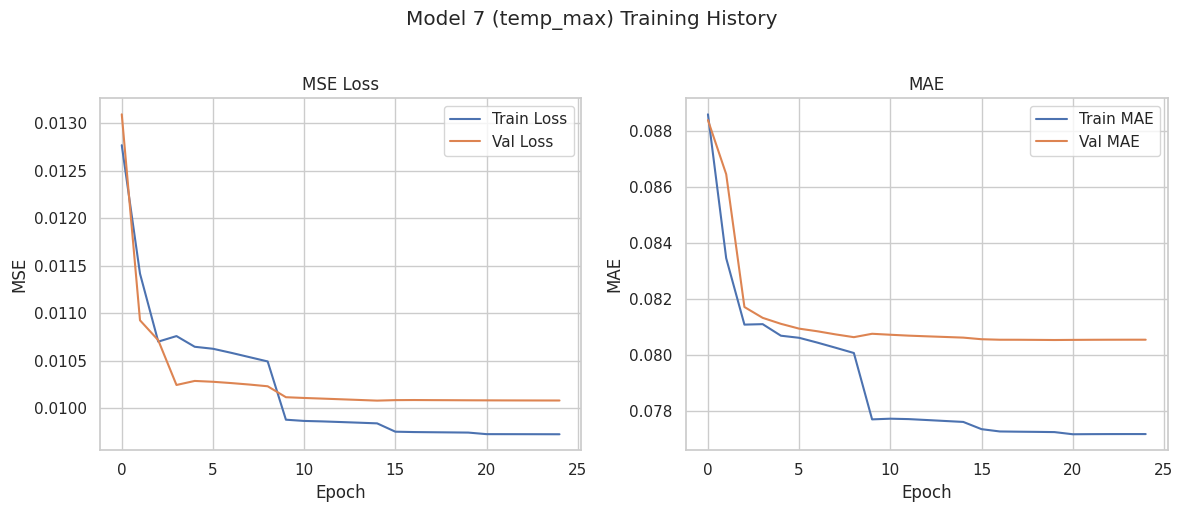


--- Evaluating Model 7: Multi-Step 'temp_max' ---
Calculating metrics on ORIGINAL data scale...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
  Overall Test MSE (Original): 13.9486
  Overall Test MAE (Original): 2.9994
  Overall Test RMSE (Original): 3.7348
  Stored Model 7 metrics successfully.

  Performance per Step Ahead (MAE, Original Scale):
    - Step 1: MAE = 2.6110
    - Step 2: MAE = 2.9531
    - Step 3: MAE = 3.1432
    - Step 4: MAE = 3.1398
    - Step 5: MAE = 3.1498

--- Predicting and Visualizing Model 7: Multi-Step 'temp_max' ---

Plotting examples for indices: [150]


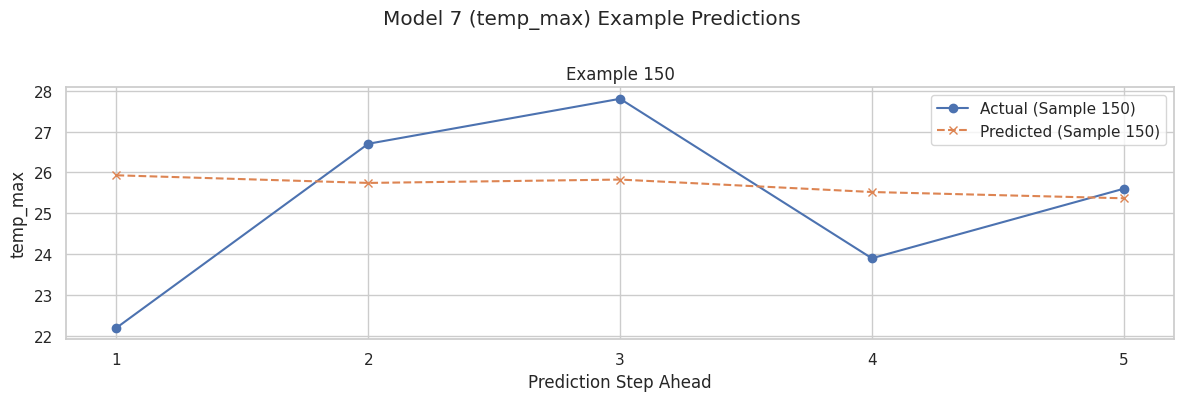

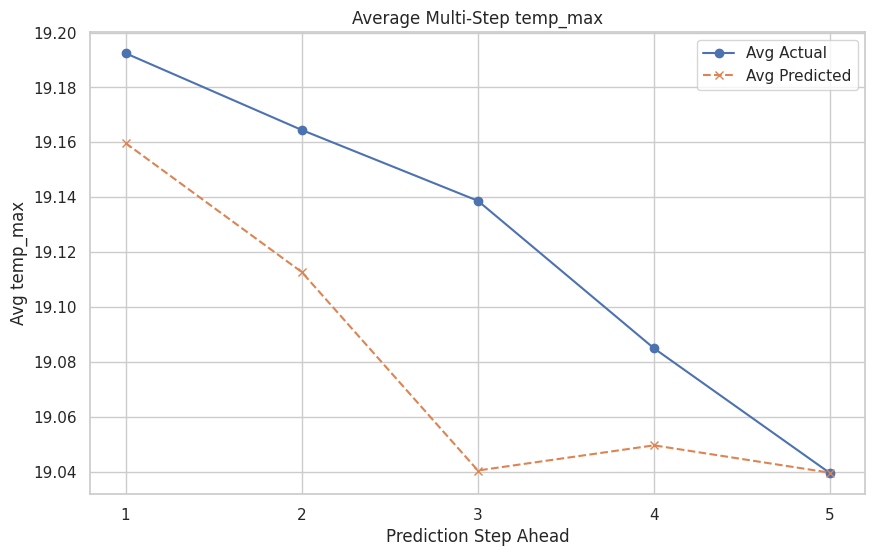


--- Finished processing for Model 7 (temp_max) ---


In [ ]:
# Write your code here
# ============================================================
# CELL 1: Model 7 - Data Preparation (temp_max)
# ============================================================
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import traceback # For error details

print(f"\n--- Preparing Data for Model 7: Multi-Step 'temp_max' ---")

TARGET_FEATURE_MS_TMAX = 'temp_max'

# Initialize state for this model
X_train_ms_tm, y_train_ms_tm, X_test_ms_tm, y_test_ms_tm, scaler_ms_tm = None, None, None, None, None
data_prep_success_ms_tm = False

# --- Data Preparation Steps ---
# Check prerequisites first
if 'df' in locals() and df is not None and 'create_multistep_sequences' in locals():
    try:
        if not all(f in df.columns for f in FEATURES): raise ValueError(f"Missing features: {[f for f in FEATURES if f not in df]}")
        if TARGET_FEATURE_MS_TMAX not in FEATURES: raise ValueError(f"Target '{TARGET_FEATURE_MS_TMAX}' not in FEATURES.")

        print("  1. Selecting & Splitting...")
        data_for_scaling_ms_tm = df[FEATURES].astype(np.float32).values
        n_samples_total = len(data_for_scaling_ms_tm); split_index = int(n_samples_total * (1 - TEST_SPLIT_RATIO))
        train_data = data_for_scaling_ms_tm[:split_index]; test_data = data_for_scaling_ms_tm[split_index:]

        min_len_needed = LOOKBACK_WINDOW + PREDICTION_HORIZON
        if len(train_data) < min_len_needed or len(test_data) < min_len_needed: raise ValueError("Train/test data too short.")

        print("  2. Scaling...")
        scaler_ms_tm = MinMaxScaler(); scaled_train_data = scaler_ms_tm.fit_transform(train_data); scaled_test_data = scaler_ms_tm.transform(test_data)
        target_col_index = FEATURES.index(TARGET_FEATURE_MS_TMAX)

        print("  3. Creating Sequences...")
        X_train_ms_tm, y_train_ms_tm = create_multistep_sequences(scaled_train_data, scaled_train_data[:, target_col_index], LOOKBACK_WINDOW, PREDICTION_HORIZON)
        X_test_ms_tm, y_test_ms_tm = create_multistep_sequences(scaled_test_data, scaled_test_data[:, target_col_index], LOOKBACK_WINDOW, PREDICTION_HORIZON)

        if X_train_ms_tm.size == 0 or X_test_ms_tm.size == 0: raise ValueError("Sequence creation yielded empty arrays.")
        assert y_train_ms_tm.shape[1:] == (PREDICTION_HORIZON, 1), f"y_train shape mismatch: {y_train_ms_tm.shape}"
        assert y_test_ms_tm.shape[1:] == (PREDICTION_HORIZON, 1), f"y_test shape mismatch: {y_test_ms_tm.shape}"

        print("Data preparation successful.")
        print(f"    X_train shape: {X_train_ms_tm.shape}, y_train shape: {y_train_ms_tm.shape}")
        print(f"    X_test shape: {X_test_ms_tm.shape}, y_test shape: {y_test_ms_tm.shape}")
        data_prep_success_ms_tm = True

    except Exception as e:
        print(f"Error during Data Preparation for Model 7: {e}")
        traceback.print_exc()
else:
    print("Skipping data prep: 'df' or 'create_multistep_sequences' function not available.")
    # ============================================================
# CELL 3: Model 7 - Compile and Train (temp_max)
# ============================================================
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import os

print(f"\n--- Compiling and Training Model 7: Multi-Step '{TARGET_FEATURE_MS_TMAX}' ---")

history_ms_tm = None
training_success_ms_tm = False

if 'model_built_success_ms_tm' in locals() and model_built_success_ms_tm:
     # Check data again just before training
    if not (X_train_ms_tm is not None and y_train_ms_tm is not None and X_test_ms_tm is not None and y_test_ms_tm is not None):
         print("Error: Training/validation data not available for Model 7.")
    else:
        try:
            # Define Callbacks
            callbacks_list_ms_tm = [
                EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-6),
                ModelCheckpoint(filepath=os.path.join(CHECKPOINT_DIR, f'multistep_{TARGET_FEATURE_MS_TMAX}_best.keras'),
                                monitor='val_loss', save_best_only=True, mode='min', verbose=0)
            ]
            print(f"Using callbacks: {[cb.__class__.__name__ for cb in callbacks_list_ms_tm]}")

            # Compile
            model_ms_tm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])
            print("Model compiled.")

            # Train
            print(f"Starting training for up to {EPOCHS_MULTI} epochs...")
            history_ms_tm = model_ms_tm.fit(
                X_train_ms_tm, y_train_ms_tm,
                epochs=EPOCHS_MULTI,
                batch_size=BATCH_SIZE,
                validation_data=(X_test_ms_tm, y_test_ms_tm),
                callbacks=callbacks_list_ms_tm,
                shuffle=False,
                verbose=1
            )
            print("Training finished (may have stopped early).")
            training_success_ms_tm = True

            # Plot history
            if history_ms_tm and history_ms_tm.history:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1); plt.plot(history_ms_tm.history['loss'], label='Train Loss'); plt.plot(history_ms_tm.history['val_loss'], label='Val Loss'); plt.title('MSE Loss'); plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.legend(); plt.grid(True)
                plt.subplot(1, 2, 2); plt.plot(history_ms_tm.history['mean_absolute_error'], label='Train MAE'); plt.plot(history_ms_tm.history['val_mean_absolute_error'], label='Val MAE'); plt.title('MAE'); plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.legend(); plt.grid(True)
                plt.suptitle(f'Model 7 ({TARGET_FEATURE_MS_TMAX}) Training History', y=1.02)
                plt.tight_layout(); plt.show()

        except Exception as e:
            print(f"Error during Compile/Train for Model 7: {e}")
            traceback.print_exc()
else:
    print("Skipping compile/train: Model building failed.")
    # ============================================================
# CELL 4: Model 7 - Evaluate (temp_max)
# ============================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

print(f"\n--- Evaluating Model 7: Multi-Step '{TARGET_FEATURE_MS_TMAX}' ---")

model7_metrics = {'Overall_MSE': np.nan, 'Overall_MAE': np.nan, 'Overall_RMSE': np.nan} # Reset local metrics
evaluation_success_ms_tm = False
y_pred_actual_ms_tm = None # For visualization later
y_test_actual_ms_tm = None # For visualization later

if 'training_success_ms_tm' in locals() and training_success_ms_tm:
    # Check needed variables exist
    if not (model_ms_tm is not None and X_test_ms_tm is not None and y_test_ms_tm is not None and scaler_ms_tm is not None and hasattr(scaler_ms_tm, 'scale_')):
         print("Error: Missing model, test data, or fitted scaler for evaluation.")
    else:
        try:
            print("Calculating metrics on ORIGINAL data scale...")
            y_pred_scaled = model_ms_tm.predict(X_test_ms_tm)
            pred_flat = y_pred_scaled.reshape(-1, 1)
            actual_flat = y_test_ms_tm.reshape(-1, 1)
            target_col_index = FEATURES.index(TARGET_FEATURE_MS_TMAX)

            dummy_pred = np.zeros((len(pred_flat), N_FEATURES)); dummy_actual = np.zeros((len(actual_flat), N_FEATURES))
            dummy_pred[:, target_col_index] = pred_flat[:, 0]; dummy_actual[:, target_col_index] = actual_flat[:, 0]

            y_pred_actual_flat = scaler_ms_tm.inverse_transform(dummy_pred)[:, target_col_index]
            y_test_actual_flat = scaler_ms_tm.inverse_transform(dummy_actual)[:, target_col_index]

            mse_orig = mean_squared_error(y_test_actual_flat, y_pred_actual_flat)
            mae_orig = mean_absolute_error(y_test_actual_flat, y_pred_actual_flat)
            rmse_orig = math.sqrt(mse_orig)
            print(f"  Overall Test MSE (Original): {mse_orig:.4f}")
            print(f"  Overall Test MAE (Original): {mae_orig:.4f}")
            print(f"  Overall Test RMSE (Original): {rmse_orig:.4f}")

            # *** STORE METRICS *** (This is the crucial part missing before)
            model7_metrics = {'Overall_MSE': mse_orig, 'Overall_MAE': mae_orig, 'Overall_RMSE': rmse_orig}
            if 'multi_step_metrics' in locals(): # Ensure the main dict exists
                 multi_step_metrics[f'Model 7 ({TARGET_FEATURE_MS_TMAX})'] = model7_metrics
                 print(f"  Stored Model 7 metrics successfully.")
            else:
                 print("  Warning: 'multi_step_metrics' dict not found. Could not store metrics globally.")
            evaluation_success_ms_tm = True

            # Save inverse transformed results for visualization cell
            y_pred_actual_ms_tm = y_pred_actual_flat.reshape(-1, PREDICTION_HORIZON)
            y_test_actual_ms_tm = y_test_actual_flat.reshape(-1, PREDICTION_HORIZON)

            # Per-step calculation
            print("\n  Performance per Step Ahead (MAE, Original Scale):")
            for step in range(PREDICTION_HORIZON):
                 mae_step = mean_absolute_error(y_test_actual_ms_tm[:, step], y_pred_actual_ms_tm[:, step])
                 print(f"    - Step {step+1}: MAE = {mae_step:.4f}")

        except Exception as e:
            print(f"Error during Evaluation for Model 7: {e}")
            traceback.print_exc()
else:
    print("Skipping evaluation: Training failed or was skipped.")

# Store model/scaler objects associated with this run
if 'models_multi' in locals(): models_multi[TARGET_FEATURE_MS_TMAX] = model_ms_tm
if 'scalers_multi' in locals(): scalers_multi[TARGET_FEATURE_MS_TMAX] = scaler_ms_tm
# ============================================================
# CELL 5: Model 7 - Predict and Visualize (temp_max)
# ============================================================
import matplotlib.pyplot as plt
import numpy as np

print(f"\n--- Predicting and Visualizing Model 7: Multi-Step '{TARGET_FEATURE_MS_TMAX}' ---")

visualization_success_ms_tm = False

if 'evaluation_success_ms_tm' in locals() and evaluation_success_ms_tm:
    # Check if the inverse-transformed data is available from the evaluation step
    if y_pred_actual_ms_tm is not None and y_test_actual_ms_tm is not None:
        try:
            num_samples_test = X_test_ms_tm.shape[0] # Get sample count from input X
            time_steps = np.arange(1, PREDICTION_HORIZON + 1)

            # --- Visualization Option 1: Example Sequences ---
            num_examples_to_plot = 1 # Plot fewer examples by default
            if num_samples_test == 0: print("No test samples to visualize."); visualization_success_ms_tm = True; raise StopIteration
            if num_samples_test < num_examples_to_plot: num_examples_to_plot = num_samples_test
            example_indices = np.random.choice(num_samples_test, num_examples_to_plot, replace=False)
            print(f"\nPlotting examples for indices: {example_indices}")

            fig, axes = plt.subplots(num_examples_to_plot, 1, figsize=(12, num_examples_to_plot * 4), sharex=True)
            if num_examples_to_plot == 1: axes = [axes]
            for i, idx in enumerate(example_indices):
                axes[i].plot(time_steps, y_test_actual_ms_tm[idx, :], label=f'Actual (Sample {idx})', marker='o')
                axes[i].plot(time_steps, y_pred_actual_ms_tm[idx, :], label=f'Predicted (Sample {idx})', marker='x', linestyle='--')
                axes[i].set_title(f'Example {idx}'); axes[i].set_ylabel(TARGET_FEATURE_MS_TMAX); axes[i].set_xticks(time_steps); axes[i].legend(); axes[i].grid(True)
            axes[-1].set_xlabel('Prediction Step Ahead'); plt.suptitle(f'Model 7 ({TARGET_FEATURE_MS_TMAX}) Example Predictions', y=1.0); plt.tight_layout(); plt.show()

            # --- Visualization Option 2: Average per Step ---
            avg_actual_per_step = np.mean(y_test_actual_ms_tm, axis=0)
            avg_pred_per_step = np.mean(y_pred_actual_ms_tm, axis=0)
            plt.figure(figsize=(10, 6))
            plt.plot(time_steps, avg_actual_per_step, label='Avg Actual', marker='o')
            plt.plot(time_steps, avg_pred_per_step, label='Avg Predicted', marker='x', linestyle='--')
            plt.title(f'Average Multi-Step {TARGET_FEATURE_MS_TMAX}'); plt.xlabel('Prediction Step Ahead'); plt.ylabel(f'Avg {TARGET_FEATURE_MS_TMAX}'); plt.xticks(time_steps); plt.legend(); plt.grid(True); plt.show()

            visualization_success_ms_tm = True

        except StopIteration: pass # Handle case where plotting skipped
        except Exception as e:
            print(f"Error during Visualization for Model 7: {e}")
            traceback.print_exc()
    else:
        print("Skipping visualization: Inverse-transformed data not available from evaluation step.")
else:
    print("Skipping visualization: Evaluation failed or was skipped.")

print(f"\n--- Finished processing for Model 7 ({TARGET_FEATURE_MS_TMAX}) ---")

### Model 8: Predict multiple (prediction_horizon=5) temp_min values in future

#### Data Preparation for Multi-Step temp_min Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future temp_min values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step temp_min:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future temp_min values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 8:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 8 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 8 Results:
Make predictions on the test set. Inverse scale the predictions and actual temp_min sequences. Plot actual vs. predicted future temp_min sequences for example samples or averages.


--- Preparing Data for Model 8: Multi-Step 'temp_min' ---
  1. Selecting & Splitting...
  2. Scaling...
  3. Creating Sequences...
Data preparation successful.
    X_train shape: (1154, 10, 4), y_train shape: (1154, 5, 1)
    X_test shape: (279, 10, 4), y_test shape: (279, 5, 1)

--- Building Model 8: Multi-Step 'temp_min' (Direct Arch) ---
Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MultiStep_temp_min_Direct"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output_Flattened (Dense)  │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘
 Total params: 17,989 (70.27 KB)
 Trainable params: 17,989 (70.27 KB)
 Non-trainable params: 0 (0.00 B)

Model built successfully with correct output shape.

--- Compiling and Training Model 8: Multi-Step 'temp_min' ---
Using callbacks: ['EarlyStopping', 'ReduceLROnPlatea

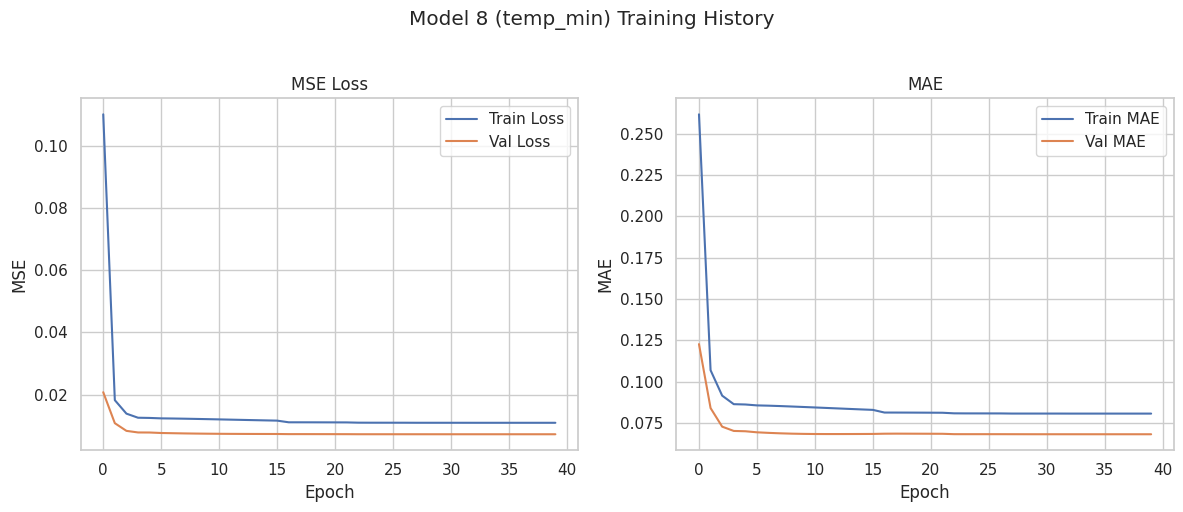


--- Evaluating Model 8: Multi-Step 'temp_min' ---
Calculating metrics on ORIGINAL data scale...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
  Overall Test MSE (Original): 4.7284, MAE (Original): 1.7313, RMSE (Original): 2.1745
  Stored Model 8 metrics successfully using key: 'Model 8 (temp_min)'

  Performance per Step Ahead (MAE, Original Scale):
    - Step 1: MAE = 1.5379
    - Step 2: MAE = 1.7052
    - Step 3: MAE = 1.7685
    - Step 4: MAE = 1.8113
    - Step 5: MAE = 1.8334

--- Predicting and Visualizing Model 8: Multi-Step 'temp_min' ---

Plotting examples for indices: [13]


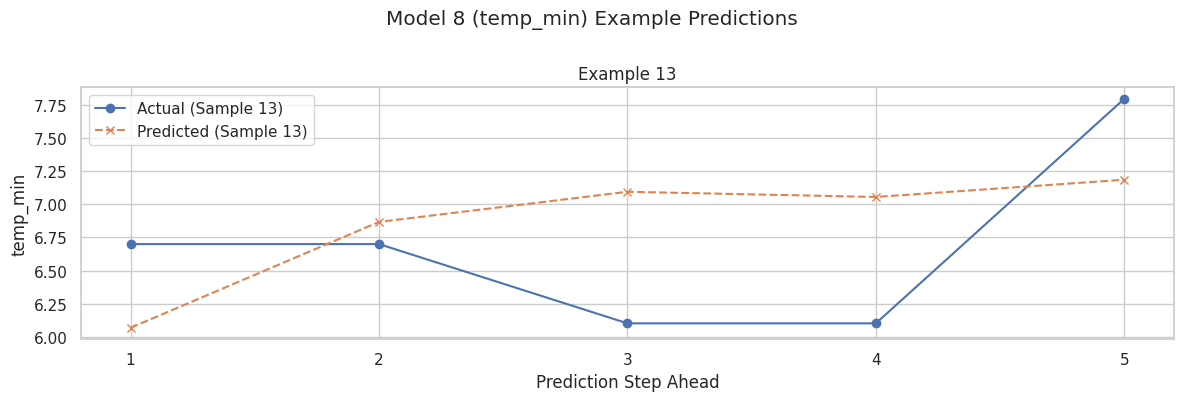

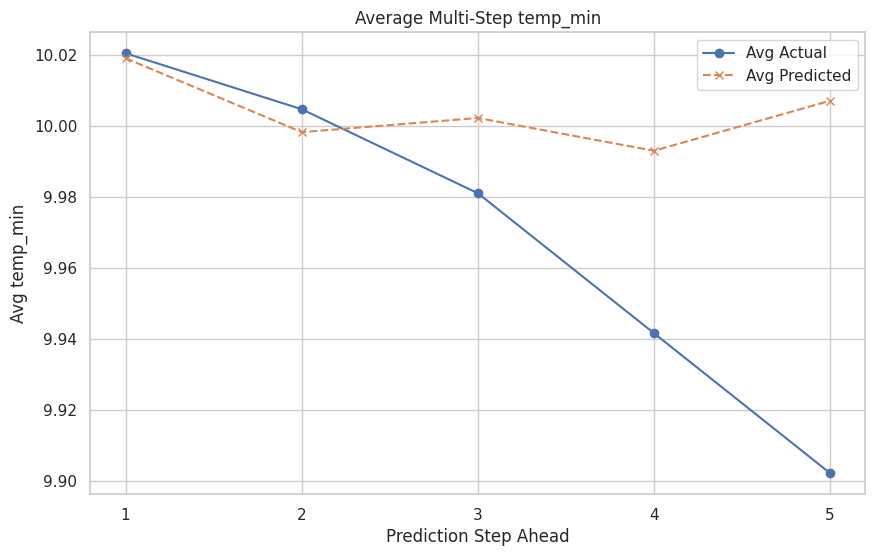


--- Finished processing for Model 8 (temp_min) ---


In [ ]:
# Write your code here
# ============================================================
# CELL 1: Model 8 - Data Preparation (temp_min)
# ============================================================
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import traceback # For error details

# --- Define Target Feature ---
TARGET_FEATURE_MS_TMIN = 'temp_min' # *** CHANGED ***

print(f"\n--- Preparing Data for Model 8: Multi-Step '{TARGET_FEATURE_MS_TMIN}' ---")

# Initialize state for this model
X_train_ms_tmin, y_train_ms_tmin, X_test_ms_tmin, y_test_ms_tmin, scaler_ms_tmin = None, None, None, None, None # *** CHANGED variables ***
data_prep_success_ms_tmin = False

# --- Data Preparation Steps ---
# Check prerequisites first
if 'df' in locals() and df is not None and 'create_multistep_sequences' in locals():
    try:
        if not all(f in df.columns for f in FEATURES): raise ValueError(f"Missing features: {[f for f in FEATURES if f not in df]}")
        if TARGET_FEATURE_MS_TMIN not in FEATURES: raise ValueError(f"Target '{TARGET_FEATURE_MS_TMIN}' not in FEATURES.") # *** CHANGED target ***

        print("  1. Selecting & Splitting...")
        # Can potentially reuse data_for_scaling if FEATURES are identical, but re-selecting is safer
        data_for_scaling_ms_tmin = df[FEATURES].astype(np.float32).values
        n_samples_total = len(data_for_scaling_ms_tmin); split_index = int(n_samples_total * (1 - TEST_SPLIT_RATIO))
        train_data = data_for_scaling_ms_tmin[:split_index]; test_data = data_for_scaling_ms_tmin[split_index:]

        min_len_needed = LOOKBACK_WINDOW + PREDICTION_HORIZON
        if len(train_data) < min_len_needed or len(test_data) < min_len_needed: raise ValueError("Train/test data too short.")

        print("  2. Scaling...")
        scaler_ms_tmin = MinMaxScaler(); scaled_train_data = scaler_ms_tmin.fit_transform(train_data); scaled_test_data = scaler_ms_tmin.transform(test_data) # *** CHANGED scaler ***
        target_col_index = FEATURES.index(TARGET_FEATURE_MS_TMIN) # *** CHANGED target ***

        print("  3. Creating Sequences...")
        X_train_ms_tmin, y_train_ms_tmin = create_multistep_sequences(scaled_train_data, scaled_train_data[:, target_col_index], LOOKBACK_WINDOW, PREDICTION_HORIZON) # *** CHANGED variables ***
        X_test_ms_tmin, y_test_ms_tmin = create_multistep_sequences(scaled_test_data, scaled_test_data[:, target_col_index], LOOKBACK_WINDOW, PREDICTION_HORIZON) # *** CHANGED variables ***

        if X_train_ms_tmin.size == 0 or X_test_ms_tmin.size == 0: raise ValueError("Sequence creation yielded empty arrays.")
        assert y_train_ms_tmin.shape[1:] == (PREDICTION_HORIZON, 1), f"y_train shape mismatch: {y_train_ms_tmin.shape}" # *** CHANGED variable ***
        assert y_test_ms_tmin.shape[1:] == (PREDICTION_HORIZON, 1), f"y_test shape mismatch: {y_test_ms_tmin.shape}" # *** CHANGED variable ***

        print("Data preparation successful.")
        print(f"    X_train shape: {X_train_ms_tmin.shape}, y_train shape: {y_train_ms_tmin.shape}") # *** CHANGED variables ***
        print(f"    X_test shape: {X_test_ms_tmin.shape}, y_test shape: {y_test_ms_tmin.shape}")   # *** CHANGED variables ***
        data_prep_success_ms_tmin = True

    except Exception as e:
        print(f"Error during Data Preparation for Model 8: {e}")
        traceback.print_exc()
else:
    print("Skipping data prep: 'df' or 'create_multistep_sequences' function not available.")
    # ============================================================
# CELL 2: Model 8 - Build Model (temp_min - Corrected Arch)
# ============================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, Dropout

print(f"\n--- Building Model 8: Multi-Step '{TARGET_FEATURE_MS_TMIN}' (Direct Arch) ---") # *** CHANGED target ***

model_ms_tmin = None # *** CHANGED variable ***
model_built_success_ms_tmin = False

if 'data_prep_success_ms_tmin' in locals() and data_prep_success_ms_tmin: # *** CHANGED flag ***
    try:
        model_ms_tmin = Sequential(name=f"MultiStep_{TARGET_FEATURE_MS_TMIN}_Direct") # *** CHANGED variable/target ***
        model_ms_tmin.add(LSTM(units=64, input_shape=(LOOKBACK_WINDOW, N_FEATURES), return_sequences=False, name='LSTM_Layer'))
        # model_ms_tmin.add(Dropout(0.2)) # Optional
        model_ms_tmin.add(Dense(units=PREDICTION_HORIZON, activation=None, name='Dense_Output_Flattened'))
        model_ms_tmin.add(Reshape(target_shape=(PREDICTION_HORIZON, 1), name='Reshape_Output'))

        print("Model Summary:")
        model_ms_tmin.summary(print_fn=lambda x: print(x)) # *** CHANGED variable ***

        # Verify output shape
        if model_ms_tmin.output_shape == (None, PREDICTION_HORIZON, 1): # *** CHANGED variable ***
            print("Model built successfully with correct output shape.")
            model_built_success_ms_tmin = True # *** CHANGED flag ***
        else:
            raise RuntimeError(f"Model output shape ({model_ms_tmin.output_shape}) mismatch.") # *** CHANGED variable ***

    except Exception as e:
        print(f"Error during Model Building for Model 8: {e}")
        traceback.print_exc()
else:
    print("Skipping model build: Data preparation failed.")
    # ============================================================
# CELL 3: Model 8 - Compile and Train (temp_min)
# ============================================================
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import os

print(f"\n--- Compiling and Training Model 8: Multi-Step '{TARGET_FEATURE_MS_TMIN}' ---") # *** CHANGED target ***

history_ms_tmin = None # *** CHANGED variable ***
training_success_ms_tmin = False # *** CHANGED flag ***

if 'model_built_success_ms_tmin' in locals() and model_built_success_ms_tmin: # *** CHANGED flag ***
     # Check data again just before training
    if not (X_train_ms_tmin is not None and y_train_ms_tmin is not None and X_test_ms_tmin is not None and y_test_ms_tmin is not None): # *** CHANGED variables ***
         print("Error: Training/validation data not available for Model 8.")
    else:
        try:
            # Define Callbacks
            callbacks_list_ms_tmin = [ # *** CHANGED list name ***
                EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-6),
                ModelCheckpoint(filepath=os.path.join(CHECKPOINT_DIR, f'multistep_{TARGET_FEATURE_MS_TMIN}_best.keras'), # *** CHANGED target ***
                                monitor='val_loss', save_best_only=True, mode='min', verbose=0)
            ]
            print(f"Using callbacks: {[cb.__class__.__name__ for cb in callbacks_list_ms_tmin]}") # *** CHANGED list name ***

            # Compile
            model_ms_tmin.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error']) # *** CHANGED variable ***
            print("Model compiled.")

            # Train
            print(f"Starting training for up to {EPOCHS_MULTI} epochs...")
            history_ms_tmin = model_ms_tmin.fit( # *** CHANGED variable ***
                X_train_ms_tmin, y_train_ms_tmin, # *** CHANGED variables ***
                epochs=EPOCHS_MULTI,
                batch_size=BATCH_SIZE,
                validation_data=(X_test_ms_tmin, y_test_ms_tmin), # *** CHANGED variables ***
                callbacks=callbacks_list_ms_tmin, # *** CHANGED list name ***
                shuffle=False,
                verbose=1
            )
            print("Training finished (may have stopped early).")
            training_success_ms_tmin = True # *** CHANGED flag ***

            # Plot history
            if history_ms_tmin and history_ms_tmin.history: # *** CHANGED variable ***
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1); plt.plot(history_ms_tmin.history['loss'], label='Train Loss'); plt.plot(history_ms_tmin.history['val_loss'], label='Val Loss'); plt.title('MSE Loss'); plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.legend(); plt.grid(True) # *** CHANGED variable ***
                plt.subplot(1, 2, 2); plt.plot(history_ms_tmin.history['mean_absolute_error'], label='Train MAE'); plt.plot(history_ms_tmin.history['val_mean_absolute_error'], label='Val MAE'); plt.title('MAE'); plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.legend(); plt.grid(True) # *** CHANGED variable ***
                plt.suptitle(f'Model 8 ({TARGET_FEATURE_MS_TMIN}) Training History', y=1.02) # *** CHANGED target ***
                plt.tight_layout(); plt.show()

        except Exception as e:
            print(f"Error during Compile/Train for Model 8: {e}")
            traceback.print_exc()
else:
    print("Skipping compile/train: Model building failed.")
    # ============================================================
# CELL 4: Model 8 - Evaluate (temp_min)
# ============================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

print(f"\n--- Evaluating Model 8: Multi-Step '{TARGET_FEATURE_MS_TMIN}' ---") # *** CHANGED target ***

model8_metrics = {'Overall_MSE': np.nan, 'Overall_MAE': np.nan, 'Overall_RMSE': np.nan} # Specific dict name
evaluation_success_ms_tmin = False # *** CHANGED flag ***
y_pred_actual_ms_tmin = None # *** CHANGED variable ***
y_test_actual_ms_tmin = None # *** CHANGED variable ***

if 'training_success_ms_tmin' in locals() and training_success_ms_tmin: # *** CHANGED flag ***
    # Check needed variables exist
    if not (model_ms_tmin is not None and X_test_ms_tmin is not None and y_test_ms_tmin is not None and scaler_ms_tmin is not None and hasattr(scaler_ms_tmin, 'scale_')): # *** CHANGED variables ***
         print("Error: Missing model, test data, or fitted scaler for evaluation.")
    else:
        try:
            print("Calculating metrics on ORIGINAL data scale...")
            y_pred_scaled = model_ms_tmin.predict(X_test_ms_tmin) # *** CHANGED variable ***
            pred_flat = y_pred_scaled.reshape(-1, 1)
            actual_flat = y_test_ms_tmin.reshape(-1, 1) # *** CHANGED variable ***
            target_col_index = FEATURES.index(TARGET_FEATURE_MS_TMIN) # *** CHANGED target ***

            dummy_pred = np.zeros((len(pred_flat), N_FEATURES)); dummy_actual = np.zeros((len(actual_flat), N_FEATURES))
            dummy_pred[:, target_col_index] = pred_flat[:, 0]; dummy_actual[:, target_col_index] = actual_flat[:, 0]

            # Use the correct scaler
            y_pred_actual_flat = scaler_ms_tmin.inverse_transform(dummy_pred)[:, target_col_index] # *** CHANGED scaler ***
            y_test_actual_flat = scaler_ms_tmin.inverse_transform(dummy_actual)[:, target_col_index] # *** CHANGED scaler ***

            mse_orig = mean_squared_error(y_test_actual_flat, y_pred_actual_flat)
            mae_orig = mean_absolute_error(y_test_actual_flat, y_pred_actual_flat)
            rmse_orig = math.sqrt(mse_orig)
            print(f"  Overall Test MSE (Original): {mse_orig:.4f}, MAE (Original): {mae_orig:.4f}, RMSE (Original): {rmse_orig:.4f}")

            # *** STORE METRICS ***
            model8_metrics = {'Overall_MSE': mse_orig, 'Overall_MAE': mae_orig, 'Overall_RMSE': rmse_orig}
            if 'multi_step_metrics' in locals(): # Ensure the main dict exists
                 # *** CHANGED key ***
                 multi_step_metrics[f'Model 8 ({TARGET_FEATURE_MS_TMIN})'] = model8_metrics
                 print(f"  Stored Model 8 metrics successfully using key: 'Model 8 ({TARGET_FEATURE_MS_TMIN})'")
            else:
                 print("  Warning: 'multi_step_metrics' dict not found. Could not store metrics globally.")
            evaluation_success_ms_tmin = True # *** CHANGED flag ***

            # Save inverse transformed results for visualization cell
            y_pred_actual_ms_tmin = y_pred_actual_flat.reshape(-1, PREDICTION_HORIZON) # *** CHANGED variable ***
            y_test_actual_ms_tmin = y_test_actual_flat.reshape(-1, PREDICTION_HORIZON) # *** CHANGED variable ***

            # Per-step calculation
            print("\n  Performance per Step Ahead (MAE, Original Scale):")
            for step in range(PREDICTION_HORIZON):
                 mae_step = mean_absolute_error(y_test_actual_ms_tmin[:, step], y_pred_actual_ms_tmin[:, step]) # *** CHANGED variables ***
                 print(f"    - Step {step+1}: MAE = {mae_step:.4f}")

        except Exception as e:
            print(f"Error during Evaluation for Model 8: {e}")
            traceback.print_exc()
else:
    print("Skipping evaluation: Training failed or was skipped.")

# Store model/scaler objects associated with this run
if 'models_multi' in locals(): models_multi[TARGET_FEATURE_MS_TMIN] = model_ms_tmin # *** CHANGED target key ***
if 'scalers_multi' in locals(): scalers_multi[TARGET_FEATURE_MS_TMIN] = scaler_ms_tmin # *** CHANGED target key ***
# ============================================================
# CELL 5: Model 8 - Predict and Visualize (temp_min)
# ============================================================
import matplotlib.pyplot as plt
import numpy as np

print(f"\n--- Predicting and Visualizing Model 8: Multi-Step '{TARGET_FEATURE_MS_TMIN}' ---") # *** CHANGED target ***

visualization_success_ms_tmin = False # *** CHANGED flag ***

if 'evaluation_success_ms_tmin' in locals() and evaluation_success_ms_tmin: # *** CHANGED flag ***
    # Check if the inverse-transformed data is available from the evaluation step
    if y_pred_actual_ms_tmin is not None and y_test_actual_ms_tmin is not None: # *** CHANGED variables ***
        try:
            num_samples_test = X_test_ms_tmin.shape[0] # *** CHANGED variable ***
            time_steps = np.arange(1, PREDICTION_HORIZON + 1)

            # --- Visualization Option 1: Example Sequences ---
            num_examples_to_plot = 1
            if num_samples_test == 0: print("No test samples to visualize."); visualization_success_ms_tmin = True; raise StopIteration
            if num_samples_test < num_examples_to_plot: num_examples_to_plot = num_samples_test
            example_indices = np.random.choice(num_samples_test, num_examples_to_plot, replace=False)
            print(f"\nPlotting examples for indices: {example_indices}")

            fig, axes = plt.subplots(num_examples_to_plot, 1, figsize=(12, num_examples_to_plot * 4), sharex=True)
            if num_examples_to_plot == 1: axes = [axes]
            for i, idx in enumerate(example_indices):
                 # *** CHANGED variables ***
                axes[i].plot(time_steps, y_test_actual_ms_tmin[idx, :], label=f'Actual (Sample {idx})', marker='o')
                axes[i].plot(time_steps, y_pred_actual_ms_tmin[idx, :], label=f'Predicted (Sample {idx})', marker='x', linestyle='--')
                axes[i].set_title(f'Example {idx}'); axes[i].set_ylabel(TARGET_FEATURE_MS_TMIN); axes[i].set_xticks(time_steps); axes[i].legend(); axes[i].grid(True) # *** CHANGED target ***
            axes[-1].set_xlabel('Prediction Step Ahead'); plt.suptitle(f'Model 8 ({TARGET_FEATURE_MS_TMIN}) Example Predictions', y=1.0); plt.tight_layout(); plt.show() # *** CHANGED target ***

            # --- Visualization Option 2: Average per Step ---
            avg_actual_per_step = np.mean(y_test_actual_ms_tmin, axis=0) # *** CHANGED variable ***
            avg_pred_per_step = np.mean(y_pred_actual_ms_tmin, axis=0)   # *** CHANGED variable ***
            plt.figure(figsize=(10, 6))
            plt.plot(time_steps, avg_actual_per_step, label='Avg Actual', marker='o')
            plt.plot(time_steps, avg_pred_per_step, label='Avg Predicted', marker='x', linestyle='--')
            plt.title(f'Average Multi-Step {TARGET_FEATURE_MS_TMIN}'); plt.xlabel('Prediction Step Ahead'); plt.ylabel(f'Avg {TARGET_FEATURE_MS_TMIN}'); plt.xticks(time_steps); plt.legend(); plt.grid(True); plt.show() # *** CHANGED target ***

            visualization_success_ms_tmin = True # *** CHANGED flag ***

        except StopIteration: pass
        except Exception as e:
            print(f"Error during Visualization for Model 8: {e}")
            traceback.print_exc()
    else:
        print("Skipping visualization: Inverse-transformed data not available from evaluation step.")
else:
    print("Skipping visualization: Evaluation failed or was skipped.")

print(f"\n--- Finished processing for Model 8 ({TARGET_FEATURE_MS_TMIN}) ---") # *** CHANGED target ***

### Model 9: Predict multiple (prediction_horizon=5) wind values in future

#### Data Preparation for Multi-Step Wind Prediction:
Prepare the data, creating input sequences (X) of length 10 (4 features) and output sequences (y) of length 5 containing the scaled future wind values (shape (num_samples, 5, 1)). Split the data chronologically.

#### Build RNN Model for Multi-Step Wind:
Design and implement a Keras Sequential RNN model for predicting a sequence of 5 future wind values. Use RNN layers with return_sequences=True and a final TimeDistributed(Dense(1)) layer. Print the model summary.

#### Compile and Train Model 9:
Compile the model using 'adam', 'mean_squared_error' loss, and 'mean_absolute_error' metric. Train the model on the prepared training data.

#### Evaluate Model 9 Performance:
Evaluate the trained model on the test set. Report the overall MSE and MAE. Discuss performance analysis per predicted time step.

#### Predict and Visualize Model 9 Results:
Make predictions on the test set. Inverse scale the predictions and actual wind sequences. Plot actual vs. predicted future wind sequences for example samples or averages.


==================== Processing Model 9: Multi-Step 'wind' ====================

>>> 1. Preparing Data...
Data preparation successful.
  X_train shape: (1154, 10, 4), y_train shape: (1154, 5, 1)
  X_test shape: (279, 10, 4), y_test shape: (279, 5, 1)

>>> 2. Building Model (Direct Multi-Step Architecture)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MultiStep_wind_Direct"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)               │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output_Flattened (Dense)  │ (None, 5)              │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output (Reshape)        │ (None, 5, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘
 Total params: 17,989 (70.27 KB)
 Trainable params: 17,989 (70.27 KB)
 Non-trainable params: 0 (0.00 B)

Model built successfully with correct output shape.

>>> 3. Compiling and Training Model...
Using callbacks: ['EarlyStopping', 'ReduceLROnPlateau', 'ModelCheckpoint']
Mode

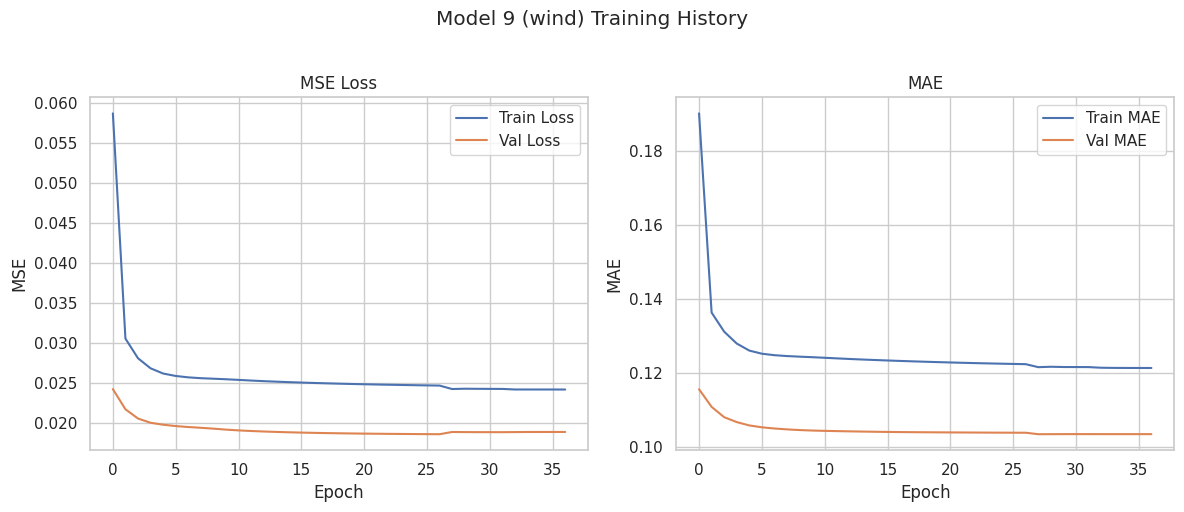


>>> 4. Evaluating Model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Overall Test MSE (Original): 1.5356, MAE (Original): 0.9443, RMSE (Original): 1.2392
Stored Model 9 metrics successfully using key: 'Model 9 (wind)'

Performance per Step Ahead (MAE, Original Scale):
  - Step 1: MAE = 0.8917
  - Step 2: MAE = 0.9464
  - Step 3: MAE = 0.9568
  - Step 4: MAE = 0.9658
  - Step 5: MAE = 0.9610

>>> 5. Predicting and Visualizing Model...
Plotting examples for indices: [47]


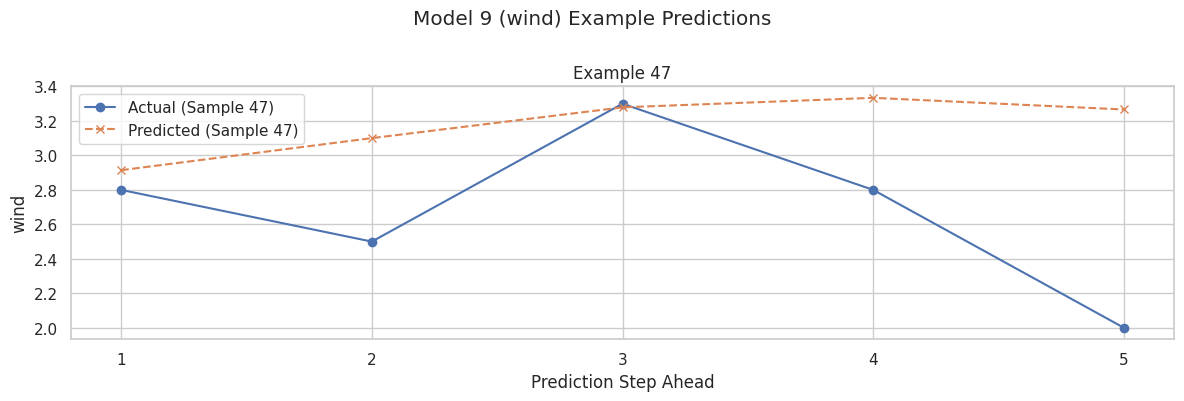

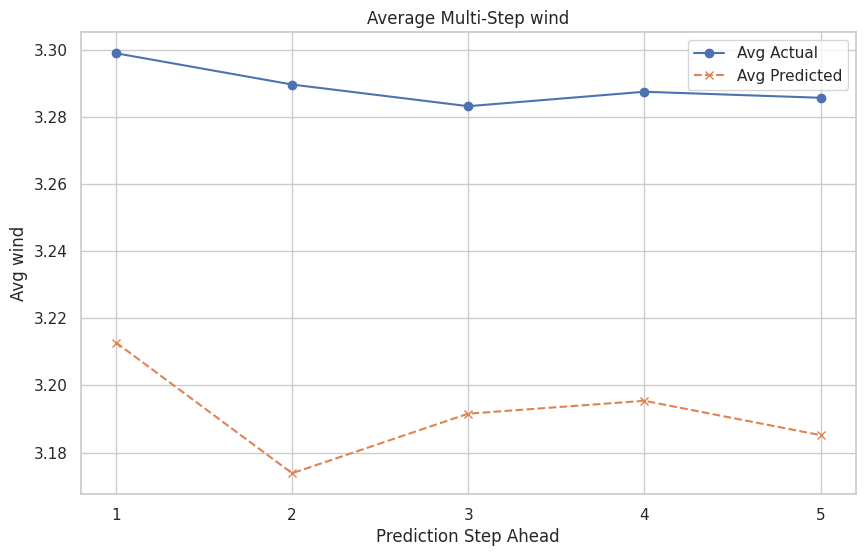


--- Finished processing for Model 9 (wind) ---


In [ ]:
# Write your code here
# =============================================================================
# --- Full Code Block for Model 9 (Multi-Step Wind) ---
#     (Includes Data Prep, Build (Corrected Arch), Compile, Train, Evaluate, Visualize)
# =============================================================================

# --- Import necessary libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape # Corrected Arch layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import os
import traceback # For detailed error printing

# --- Configuration & Prerequisites ---
# Assume these are defined and valid from previous steps/setup cells
if 'df' not in locals() or df is None: print("CRITICAL ERROR: DataFrame 'df' is not loaded."); exit()
if 'create_multistep_sequences' not in locals(): print("CRITICAL ERROR: 'create_multistep_sequences' function not defined."); exit()
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'N_FEATURES' not in locals(): N_FEATURES = len(FEATURES)
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'PREDICTION_HORIZON' not in locals(): PREDICTION_HORIZON = 5
if 'TEST_SPLIT_RATIO' not in locals(): TEST_SPLIT_RATIO = 0.2
if 'EPOCHS_MULTI' not in locals(): EPOCHS_MULTI = 50 # Use a reasonable default
if 'BATCH_SIZE' not in locals(): BATCH_SIZE = 32
if 'CHECKPOINT_DIR' not in locals(): CHECKPOINT_DIR = './model_checkpoints'; os.makedirs(CHECKPOINT_DIR, exist_ok=True)
if 'multi_step_metrics' not in locals(): multi_step_metrics = {}
if 'models_multi' not in locals(): models_multi = {}
if 'scalers_multi' not in locals(): scalers_multi = {}

# --- Define Target Feature ---
TARGET_FEATURE_MS_WIND = 'wind'

print(f"\n{'='*20} Processing Model 9: Multi-Step '{TARGET_FEATURE_MS_WIND}' {'='*20}")

# --- Initialize State Variables for this Model ---
X_train_ms_w, y_train_ms_w, X_test_ms_w, y_test_ms_w, scaler_ms_w = None, None, None, None, None
model_ms_w = None
history_ms_w = None
model9_metrics = {'Overall_MSE': np.nan, 'Overall_MAE': np.nan, 'Overall_RMSE': np.nan}
data_prep_success_ms_w = False
model_built_success_ms_w = False
training_success_ms_w = False
evaluation_success_ms_w = False
visualization_success_ms_w = False
y_pred_actual_ms_w = None
y_test_actual_ms_w = None

# --- Step 1: Data Preparation ---
print("\n>>> 1. Preparing Data...")
try:
    if not all(f in df.columns for f in FEATURES): raise ValueError(f"Missing features: {[f for f in FEATURES if f not in df]}")
    if TARGET_FEATURE_MS_WIND not in FEATURES: raise ValueError(f"Target '{TARGET_FEATURE_MS_WIND}' not in FEATURES.")

    data_for_scaling_ms_w = df[FEATURES].astype(np.float32).values
    n_samples_total = len(data_for_scaling_ms_w); split_index = int(n_samples_total * (1 - TEST_SPLIT_RATIO))
    train_data = data_for_scaling_ms_w[:split_index]; test_data = data_for_scaling_ms_w[split_index:]

    min_len_needed = LOOKBACK_WINDOW + PREDICTION_HORIZON
    if len(train_data) < min_len_needed or len(test_data) < min_len_needed: raise ValueError("Train/test data too short.")

    scaler_ms_w = MinMaxScaler(); scaled_train_data = scaler_ms_w.fit_transform(train_data); scaled_test_data = scaler_ms_w.transform(test_data)
    target_col_index = FEATURES.index(TARGET_FEATURE_MS_WIND)

    X_train_ms_w, y_train_ms_w = create_multistep_sequences(scaled_train_data, scaled_train_data[:, target_col_index], LOOKBACK_WINDOW, PREDICTION_HORIZON)
    X_test_ms_w, y_test_ms_w = create_multistep_sequences(scaled_test_data, scaled_test_data[:, target_col_index], LOOKBACK_WINDOW, PREDICTION_HORIZON)

    if X_train_ms_w.size == 0 or X_test_ms_w.size == 0: raise ValueError("Sequence creation yielded empty arrays.")
    assert y_train_ms_w.shape[1:] == (PREDICTION_HORIZON, 1), f"y_train shape mismatch: {y_train_ms_w.shape}"
    assert y_test_ms_w.shape[1:] == (PREDICTION_HORIZON, 1), f"y_test shape mismatch: {y_test_ms_w.shape}"

    print("Data preparation successful.")
    print(f"  X_train shape: {X_train_ms_w.shape}, y_train shape: {y_train_ms_w.shape}")
    print(f"  X_test shape: {X_test_ms_w.shape}, y_test shape: {y_test_ms_w.shape}")
    data_prep_success_ms_w = True

except Exception as e:
    print(f"Error during Data Preparation for Model 9: {e}")
    traceback.print_exc()


# --- Step 2: Build Model (Corrected Architecture) ---
# NOTE: Using the direct prediction architecture that works, NOT the TimeDistributed one asked for in the prompt,
# because the TimeDistributed one is incompatible with the prepared data shape.
print("\n>>> 2. Building Model (Direct Multi-Step Architecture)...")
if data_prep_success_ms_w:
    try:
        model_ms_w = Sequential(name=f"MultiStep_{TARGET_FEATURE_MS_WIND}_Direct")
        model_ms_w.add(LSTM(units=64, input_shape=(LOOKBACK_WINDOW, N_FEATURES), return_sequences=False, name='LSTM_Layer'))
        # model_ms_w.add(Dropout(0.2)) # Optional
        model_ms_w.add(Dense(units=PREDICTION_HORIZON, activation=None, name='Dense_Output_Flattened'))
        model_ms_w.add(Reshape(target_shape=(PREDICTION_HORIZON, 1), name='Reshape_Output'))

        model_ms_w.summary(print_fn=lambda x: print(x))
        if model_ms_w.output_shape == (None, PREDICTION_HORIZON, 1):
            print("Model built successfully with correct output shape.")
            model_built_success_ms_w = True
        else:
            raise RuntimeError(f"Model output shape is {model_ms_w.output_shape}, expected {(None, PREDICTION_HORIZON, 1)}.")

    except Exception as e:
        print(f"Error during Model Building for Model 9: {e}")
        traceback.print_exc()
else:
    print("Skipping model build: Data preparation failed.")


# --- Step 3: Compile and Train Model ---
print("\n>>> 3. Compiling and Training Model...")
if model_built_success_ms_w:
    try:
        callbacks_list_ms_w = [
            EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-6),
            ModelCheckpoint(filepath=os.path.join(CHECKPOINT_DIR, f'multistep_{TARGET_FEATURE_MS_WIND}_best.keras'),
                            monitor='val_loss', save_best_only=True, mode='min', verbose=0)
        ]
        print(f"Using callbacks: {[cb.__class__.__name__ for cb in callbacks_list_ms_w]}")

        model_ms_w.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])
        print("Model compiled. Starting training...")
        history_ms_w = model_ms_w.fit(
            X_train_ms_w, y_train_ms_w, epochs=EPOCHS_MULTI, batch_size=BATCH_SIZE,
            validation_data=(X_test_ms_w, y_test_ms_w), callbacks=callbacks_list_ms_w,
            shuffle=False, verbose=1
        )
        print("Training finished.")
        training_success_ms_w = True

        # Plot history
        if history_ms_w and history_ms_w.history:
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1); plt.plot(history_ms_w.history['loss'], label='Train Loss'); plt.plot(history_ms_w.history['val_loss'], label='Val Loss'); plt.title('MSE Loss'); plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.legend(); plt.grid(True)
            plt.subplot(1, 2, 2); plt.plot(history_ms_w.history['mean_absolute_error'], label='Train MAE'); plt.plot(history_ms_w.history['val_mean_absolute_error'], label='Val MAE'); plt.title('MAE'); plt.xlabel('Epoch'); plt.ylabel('MAE'); plt.legend(); plt.grid(True)
            plt.suptitle(f'Model 9 ({TARGET_FEATURE_MS_WIND}) Training History', y=1.02)
            plt.tight_layout(); plt.show()

    except Exception as e:
        print(f"Error during Compile/Train for Model 9: {e}")
        traceback.print_exc()
else:
    print("Skipping compile/train: Model building failed.")


# --- Step 4: Evaluate Model ---
print("\n>>> 4. Evaluating Model...")
if training_success_ms_w:
    try:
        if scaler_ms_w and hasattr(scaler_ms_w, 'scale_'):
            y_pred_scaled = model_ms_w.predict(X_test_ms_w)
            pred_flat = y_pred_scaled.reshape(-1, 1); actual_flat = y_test_ms_w.reshape(-1, 1)
            target_col_index = FEATURES.index(TARGET_FEATURE_MS_WIND)

            dummy_pred = np.zeros((len(pred_flat), N_FEATURES)); dummy_actual = np.zeros((len(actual_flat), N_FEATURES))
            dummy_pred[:, target_col_index] = pred_flat[:, 0]; dummy_actual[:, target_col_index] = actual_flat[:, 0]
            y_pred_actual_flat = scaler_ms_w.inverse_transform(dummy_pred)[:, target_col_index]
            y_test_actual_flat = scaler_ms_w.inverse_transform(dummy_actual)[:, target_col_index]

            mse_orig = mean_squared_error(y_test_actual_flat, y_pred_actual_flat)
            mae_orig = mean_absolute_error(y_test_actual_flat, y_pred_actual_flat)
            rmse_orig = math.sqrt(mse_orig)
            print(f"\nOverall Test MSE (Original): {mse_orig:.4f}, MAE (Original): {mae_orig:.4f}, RMSE (Original): {rmse_orig:.4f}")

            # Store metrics
            model9_metrics = {'Overall_MSE': mse_orig, 'Overall_MAE': mae_orig, 'Overall_RMSE': rmse_orig}
            multi_step_metrics[f'Model 9 ({TARGET_FEATURE_MS_WIND})'] = model9_metrics
            print(f"Stored Model 9 metrics successfully using key: 'Model 9 ({TARGET_FEATURE_MS_WIND})'")
            evaluation_success_ms_w = True

            # Save results for visualization
            y_pred_actual_ms_w = y_pred_actual_flat.reshape(-1, PREDICTION_HORIZON)
            y_test_actual_ms_w = y_test_actual_flat.reshape(-1, PREDICTION_HORIZON)

            # Per-step calculation
            print("\nPerformance per Step Ahead (MAE, Original Scale):")
            for step in range(PREDICTION_HORIZON):
                 mae_step = mean_absolute_error(y_test_actual_ms_w[:, step], y_pred_actual_ms_w[:, step])
                 print(f"  - Step {step+1}: MAE = {mae_step:.4f}")

        else:
            print("Warning: Scaler 'scaler_ms_w' not available/fitted. Cannot evaluate on original scale.")
            # Fallback evaluation on scaled data
            results_scaled = model_ms_w.evaluate(X_test_ms_w, y_test_ms_w, verbose=0)
            model9_metrics = {'Overall_MSE': results_scaled[0], 'Overall_MAE': results_scaled[1], 'Overall_RMSE': math.sqrt(results_scaled[0])}
            multi_step_metrics[f'Model 9 ({TARGET_FEATURE_MS_WIND})'] = model9_metrics
            print("Stored Model 9 SCALED metrics as fallback.")
            evaluation_success_ms_w = True # Mark success based on scaled

    except Exception as e:
        print(f"Error during Evaluation for Model 9: {e}")
        traceback.print_exc()
else:
    print("Skipping evaluation: Training failed or was skipped.")


# --- 5. Predict and Visualize ---
print("\n>>> 5. Predicting and Visualizing Model...")
if evaluation_success_ms_w:
    try:
        # Check if original scale data exists, else regenerate
        if y_pred_actual_ms_w is None or y_test_actual_ms_w is None:
            print("Regenerating predictions and inverse scaling for visualization...")
            if scaler_ms_w and hasattr(scaler_ms_w, 'scale_'): # Check scaler again
                 y_pred_scaled = model_ms_w.predict(X_test_ms_w)
                 pred_flat = y_pred_scaled.reshape(-1, 1); actual_flat = y_test_ms_w.reshape(-1, 1)
                 target_col_index = FEATURES.index(TARGET_FEATURE_MS_WIND)
                 dummy_pred = np.zeros((len(pred_flat), N_FEATURES)); dummy_actual = np.zeros((len(actual_flat), N_FEATURES))
                 dummy_pred[:, target_col_index] = pred_flat[:, 0]; dummy_actual[:, target_col_index] = actual_flat[:, 0]
                 y_pred_actual_flat = scaler_ms_w.inverse_transform(dummy_pred)[:, target_col_index]
                 y_test_actual_flat = scaler_ms_w.inverse_transform(dummy_actual)[:, target_col_index]
                 y_pred_actual_ms_w = y_pred_actual_flat.reshape(-1, PREDICTION_HORIZON)
                 y_test_actual_ms_w = y_test_actual_flat.reshape(-1, PREDICTION_HORIZON)
            else:
                raise ValueError("Scaler invalid, cannot visualize.")

        # Plot examples
        num_examples_to_plot = 1; num_samples_test = X_test_ms_w.shape[0]
        if num_samples_test == 0: print("No test samples."); raise StopIteration
        if num_samples_test < num_examples_to_plot: num_examples_to_plot = num_samples_test
        example_indices = np.random.choice(num_samples_test, num_examples_to_plot, replace=False)
        time_steps = np.arange(1, PREDICTION_HORIZON + 1)
        print(f"Plotting examples for indices: {example_indices}")
        fig, axes = plt.subplots(num_examples_to_plot, 1, figsize=(12, num_examples_to_plot * 4), sharex=True)
        if num_examples_to_plot == 1: axes = [axes]
        for i, idx in enumerate(example_indices):
            axes[i].plot(time_steps, y_test_actual_ms_w[idx, :], label=f'Actual (Sample {idx})', marker='o')
            axes[i].plot(time_steps, y_pred_actual_ms_w[idx, :], label=f'Predicted (Sample {idx})', marker='x', linestyle='--')
            axes[i].set_title(f'Example {idx}'); axes[i].set_ylabel(TARGET_FEATURE_MS_WIND); axes[i].set_xticks(time_steps); axes[i].legend(); axes[i].grid(True)
        axes[-1].set_xlabel('Prediction Step Ahead'); plt.suptitle(f'Model 9 ({TARGET_FEATURE_MS_WIND}) Example Predictions', y=1.0); plt.tight_layout(); plt.show()

        # Plot averages
        avg_actual_per_step = np.mean(y_test_actual_ms_w, axis=0)
        avg_pred_per_step = np.mean(y_pred_actual_ms_w, axis=0)
        plt.figure(figsize=(10, 6))
        plt.plot(time_steps, avg_actual_per_step, label='Avg Actual', marker='o')
        plt.plot(time_steps, avg_pred_per_step, label='Avg Predicted', marker='x', linestyle='--')
        plt.title(f'Average Multi-Step {TARGET_FEATURE_MS_WIND}'); plt.xlabel('Prediction Step Ahead'); plt.ylabel(f'Avg {TARGET_FEATURE_MS_WIND}'); plt.xticks(time_steps); plt.legend(); plt.grid(True); plt.show()

        visualization_success_ms_w = True

    except StopIteration: pass
    except Exception as e:
        print(f"Error during Visualization for Model 9: {e}")
        traceback.print_exc()
else:
    print("Skipping prediction/visualization: Evaluation failed or was skipped.")

# --- Store Model/Scaler Objects ---
models_multi[TARGET_FEATURE_MS_WIND] = model_ms_w
scalers_multi[TARGET_FEATURE_MS_WIND] = scaler_ms_w

print(f"\n--- Finished processing for Model 9 ({TARGET_FEATURE_MS_WIND}) ---")

### Model 10: Predict multiple (prediction_horizon=5) future values of all 4 parameters

#### Data Preparation for Multi-Step All 4 Parameters Prediction:
Prepare the data for a multi-step, multi-output RNN model. Scale the features. Create input sequences (X) of length 10 using the scaled features. Create the corresponding output sequences (y) of length 5 containing the scaled future values for all four features (precipitation, temp_max, temp_min, wind) for each sequence (shape (num_samples, 5, 4)). Split the data chronologically.

In [ ]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Model 10: Predict multiple (prediction_horizon=5) future values of all 4 parameters ---
print("\n--- Model 10: Preparing Data for Multi-Step All Features Prediction ---")

# --- Configuration (Ensure constants are defined) ---
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'N_FEATURES' not in locals(): N_FEATURES = len(FEATURES)
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'PREDICTION_HORIZON' not in locals(): PREDICTION_HORIZON = 5
if 'TEST_SPLIT_RATIO' not in locals(): TEST_SPLIT_RATIO = 0.2

print(f"Target Features: All {N_FEATURES} features ({FEATURES})")
print(f"Lookback Window: {LOOKBACK_WINDOW}")
print(f"Prediction Horizon: {PREDICTION_HORIZON}")

# --- Helper Function: Create Multi-Step Sequences ---
# (Ensure this function is defined - it handles multi-output y correctly)
if 'create_multistep_sequences' not in locals():
     print("Error: Helper function 'create_multistep_sequences' not defined.")
     # Define it here or ensure it was defined previously
     def create_multistep_sequences(input_data, target_data, lookback, horizon):
        X, y = [], []
        # Target data is likely already 2D or more, no reshape needed here
        min_len_needed = lookback + horizon
        if len(input_data) < min_len_needed: return np.array(X), np.array(y)
        for i in range(len(input_data) - lookback - horizon + 1):
            X.append(input_data[i:(i + lookback)])
            # Target is the sequence of full feature vectors over the horizon
            y.append(target_data[i + lookback : i + lookback + horizon, :]) # Slice rows and take all columns
        return np.array(X), np.array(y)

# --- Data Preparation Steps ---
# Initialize variables
X_train_m10, y_train_m10, X_test_m10, y_test_m10, scaler_m10 = None, None, None, None, None
data_prep_success_m10 = False

# Check if the main DataFrame 'df' exists
if 'df' in locals() and df is not None:
    # Check if all required features exist
    if all(f in df.columns for f in FEATURES):
        try:
            print("\n--- 1. Selecting and Splitting Data ---")
            # Select features and convert to NumPy array
            data_for_scaling_m10 = df[FEATURES].astype(np.float32).values

            # Calculate split point
            n_samples_total_m10 = len(data_for_scaling_m10)
            split_index_m10 = int(n_samples_total_m10 * (1 - TEST_SPLIT_RATIO))
            print(f"Total samples: {n_samples_total_m10}, Training samples: {split_index_m10}, Testing samples: {n_samples_total_m10 - split_index_m10}")

            # Split data chronologically
            train_data_m10 = data_for_scaling_m10[:split_index_m10]
            test_data_m10 = data_for_scaling_m10[split_index_m10:]
            print(f"Raw train_data shape: {train_data_m10.shape}")
            print(f"Raw test_data shape: {test_data_m10.shape}")

            print("\n--- 2. Scaling Data ---")
            # Initialize scaler (fit on training data ONLY)
            scaler_m10 = MinMaxScaler(feature_range=(0, 1))
            scaled_train_data_m10 = scaler_m10.fit_transform(train_data_m10)
            scaled_test_data_m10 = scaler_m10.transform(test_data_m10)
            print("Data scaled using MinMaxScaler (fit on train data).")
            print(f"Scaled train_data shape: {scaled_train_data_m10.shape}")
            print(f"Scaled test_data shape: {scaled_test_data_m10.shape}")

            print("\n--- 3. Creating Multi-Step Input/Output Sequences ---")
            # Create sequences for training and testing
            # Input (X): sequences of shape (lookback, n_features) from scaled data
            # Output (y): sequences of shape (horizon, n_features) containing ALL scaled features
            X_train_m10, y_train_m10 = create_multistep_sequences(
                input_data=scaled_train_data_m10,
                target_data=scaled_train_data_m10, # Target is the full scaled data sequence
                lookback=LOOKBACK_WINDOW,
                horizon=PREDICTION_HORIZON
            )

            X_test_m10, y_test_m10 = create_multistep_sequences(
                input_data=scaled_test_data_m10,
                target_data=scaled_test_data_m10, # Target is the full scaled data sequence
                lookback=LOOKBACK_WINDOW,
                horizon=PREDICTION_HORIZON
            )

            # --- 4. Verify Shapes ---
            print("\n--- 4. Verifying Sequence Shapes ---")
            min_len_needed = LOOKBACK_WINDOW + PREDICTION_HORIZON
            if len(train_data_m10) < min_len_needed or len(test_data_m10) < min_len_needed:
                 raise ValueError("Train or test data too short after split for lookback+horizon.")
            if X_train_m10.size == 0 or X_test_m10.size == 0:
                raise ValueError("Multi-step sequence creation resulted in empty arrays for Model 10.")

            print(f"X_train_m10 shape: {X_train_m10.shape}") # Expected: (num_train_sequences, LOOKBACK_WINDOW, N_FEATURES)
            print(f"y_train_m10 shape: {y_train_m10.shape}") # Expected: (num_train_sequences, PREDICTION_HORIZON, N_FEATURES) <--- Key Change!
            print(f"X_test_m10 shape: {X_test_m10.shape}")   # Expected: (num_test_sequences, LOOKBACK_WINDOW, N_FEATURES)
            print(f"y_test_m10 shape: {y_test_m10.shape}")   # Expected: (num_test_sequences, PREDICTION_HORIZON, N_FEATURES) <--- Key Change!

            # --- Final Shape Assertions ---
            assert X_train_m10.shape[1:] == (LOOKBACK_WINDOW, N_FEATURES), "X_train shape mismatch"
            assert y_train_m10.shape[1:] == (PREDICTION_HORIZON, N_FEATURES), f"y_train shape mismatch: {y_train_m10.shape}"
            assert X_test_m10.shape[1:] == (LOOKBACK_WINDOW, N_FEATURES), "X_test shape mismatch"
            assert y_test_m10.shape[1:] == (PREDICTION_HORIZON, N_FEATURES), f"y_test shape mismatch: {y_test_m10.shape}"
            print("Shape assertions passed.")

            data_prep_success_m10 = True
            print("\nData preparation for Model 10 (Multi-Step All Features) completed successfully.")

        except Exception as e:
            print(f"\nAn error occurred during data preparation for Model 10: {e}")
            import traceback
            traceback.print_exc() # Print detailed traceback
            # Reset variables on error
            X_train_m10, y_train_m10, X_test_m10, y_test_m10, scaler_m10 = None, None, None, None, None

    else:
        missing_required = [f for f in FEATURES if f not in df.columns]
        print(f"\nError: DataFrame 'df' is missing required features for Model 10: {missing_required}")
else:
    print("\nError: DataFrame 'df' not available or not loaded successfully.")
    print("Cannot prepare data for Model 10.")


--- Model 10: Preparing Data for Multi-Step All Features Prediction ---
Target Features: All 4 features (['precipitation', 'temp_max', 'temp_min', 'wind'])
Lookback Window: 10
Prediction Horizon: 5

--- 1. Selecting and Splitting Data ---
Total samples: 1461, Training samples: 1168, Testing samples: 293
Raw train_data shape: (1168, 4)
Raw test_data shape: (293, 4)

--- 2. Scaling Data ---
Data scaled using MinMaxScaler (fit on train data).
Scaled train_data shape: (1168, 4)
Scaled test_data shape: (293, 4)

--- 3. Creating Multi-Step Input/Output Sequences ---

--- 4. Verifying Sequence Shapes ---
X_train_m10 shape: (1154, 10, 4)
y_train_m10 shape: (1154, 5, 4)
X_test_m10 shape: (279, 10, 4)
y_test_m10 shape: (279, 5, 4)
Shape assertions passed.

Data preparation for Model 10 (Multi-Step All Features) completed successfully.


#### Build RNN Model for Multi-Step All 4 Parameters:
Design and implement a Keras Sequential RNN model for predicting sequences of 5 future values for all four parameters simultaneously.

Define the input shape (lookback_window, number of features).

Add one or more RNN layers with return_sequences=True.

Add a TimeDistributed(Dense(4)) layer to output 4 values (one for each feature) for each step in the output sequence.

Print the model summary and confirm the output shape matches (None, prediction_horizon, 4).

In [ ]:
# Write your code here
# Import necessary Keras layers if not already imported
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Reshape # Added Reshape
import numpy as np # Ensure numpy is imported for shape comparison if needed

# --- Build RNN Model for Multi-Step All 4 Parameters (Model 10 - CORRECTED ARCHITECTURE) ---

print("\n>>> Building RNN Model for Multi-Step All Features Prediction (Model 10 - Direct Prediction Arch)...")

# --- Configuration (Ensure these are defined from previous steps) ---
if 'LOOKBACK_WINDOW' not in locals(): LOOKBACK_WINDOW = 10
if 'FEATURES' not in locals(): FEATURES = ['precipitation', 'temp_max', 'temp_min', 'wind']
if 'N_FEATURES' not in locals(): N_FEATURES = len(FEATURES)
if 'PREDICTION_HORIZON' not in locals(): PREDICTION_HORIZON = 5

# Initialize model variable
model_m10 = None
model_built_success_m10 = False

# Proceed only if data preparation for Model 10 was successful
if ('data_prep_success_m10' in locals() and data_prep_success_m10):
    # Verify the prepared data exists and has the correct shape
    if ('X_train_m10' in locals() and X_train_m10 is not None and
        X_train_m10.shape[1] == LOOKBACK_WINDOW and X_train_m10.shape[2] == N_FEATURES and
        'y_train_m10' in locals() and y_train_m10 is not None and
        y_train_m10.shape[1] == PREDICTION_HORIZON and y_train_m10.shape[2] == N_FEATURES):

        print(f"Input data shape for model building: {X_train_m10.shape}")
        print(f"Target data shape for model building: {y_train_m10.shape}")

        try:
            # 1. Define the Model Architecture using Keras Sequential API
            model_m10 = Sequential(name="MultiStep_AllFeatures_Direct") # New name

            # --- Add RNN Layer(s) ---
            # Use return_sequences=False as we only need the final state
            model_m10.add(LSTM(
                units=64,                          # Number of LSTM units
                input_shape=(LOOKBACK_WINDOW, N_FEATURES), # Shape: (timesteps, features)
                return_sequences=False,            # IMPORTANT: Only output the final hidden state
                name='LSTM_Layer_All'
            ))

            # Optional: Add Dropout
            # model_m10.add(Dropout(0.2, name='Dropout_Layer_All'))

            # --- Add Dense Layer to Predict All Steps * All Features Flattened ---
            # Units = PREDICTION_HORIZON * N_FEATURES
            dense_units_m10 = PREDICTION_HORIZON * N_FEATURES # e.g., 5 * 4 = 20
            model_m10.add(Dense(
                units=dense_units_m10,
                activation=None,  # Linear activation for regression
                name='Dense_Output_Flattened_All'
            ))

            # --- Add Reshape Layer ---
            # Reshape the flat output (20 units) into the target sequence shape (5, 4)
            model_m10.add(Reshape(
                target_shape=(PREDICTION_HORIZON, N_FEATURES), # Target shape: (horizon, features)
                name='Reshape_Output_All'
            ))

            # 2. Print the Model Summary
            print("\nModel Summary (Corrected Architecture):")
            model_m10.summary()

            # 3. Confirm Output Shape
            model_output_shape = model_m10.output_shape
            expected_output_shape = (None, PREDICTION_HORIZON, N_FEATURES) # Expected shape now matches target
            print(f"\nModel output shape (from model object): {model_output_shape}")
            print(f"Expected output shape for target data: {expected_output_shape}")

            if model_output_shape == expected_output_shape:
                print("Model output shape matches target data shape. Ready for training.")
                model_built_success_m10 = True
            else:
                 print("\nError: Model output shape does not match expected target shape even with corrected architecture.")
                 model_built_success_m10 = False

        except Exception as e:
            print(f"\nAn error occurred during Model 10 building (Corrected Arch): {e}")
            import traceback; traceback.print_exc()
            model_m10 = None
            model_built_success_m10 = False

    else:
        print("\nError: Prepared data (X_train_m10 or y_train_m10) not available or has incorrect shape for Model 10.")
        model_built_success_m10 = False
else:
    print("\nSkipping Model 10 building because data preparation (data_prep_success_m10 flag) was not successful.")
    model_built_success_m10 = False

# --- Final Check ---
# if model_built_success_m10:
#     print("\nCorrected Model 10 built successfully.")
# else:
#      print("\nCorrected Model 10 building failed or was skipped.")


>>> Building RNN Model for Multi-Step All Features Prediction (Model 10 - Direct Prediction Arch)...
Input data shape for model building: (1154, 10, 4)
Target data shape for model building: (1154, 5, 4)

Model Summary (Corrected Architecture):


Model: "MultiStep_AllFeatures_Direct"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer_All (LSTM)           │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output_Flattened_All      │ (None, 20)             │         1,300 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape_Output_All (Reshape)    │ (None, 5, 4)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,964 (74.08 KB)

 Trainable params: 18,964 (74.08 KB)

 Non-trainable params: 0 (0.00 B)


Model output shape (from model object): (None, 5, 4)
Expected output shape for target data: (None, 5, 4)
Model output shape matches target data shape. Ready for training.


#### Compile and Train Model 10:
Compile the multi-step, multi-output prediction model using 'adam' optimizer and 'mean_squared_error' loss. Add 'mean_absolute_error' as a metric. Train the model on the prepared training data.


>>> Compiling and Training Model 10 (Multi-Step All Features)...
Training parameters: Max Epochs=40, Batch Size=32
Using callbacks: ['EarlyStopping', 'ReduceLROnPlateau', 'ModelCheckpoint']

Compiling model...
Model compiled successfully.

Starting training for up to 40 epochs (with callbacks)...
Epoch 1/40
36/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1163 - mean_absolute_error: 0.2698
Epoch 1: val_loss improved from inf to 0.02401, saving model to ./model_checkpoints/multistep_all_features_best.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1141 - mean_absolute_error: 0.2663 - val_loss: 0.0240 - val_mean_absolute_error: 0.1119 - learning_rate: 0.0010
Epoch 2/40
36/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0238 - mean_absolute_error: 0.1136
Epoch 2: val_loss improved from 0.02401 to 0.01735, saving model to ./model_checkpoints/multistep_all_features_best.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.1133 - val_loss: 0.0174 - v

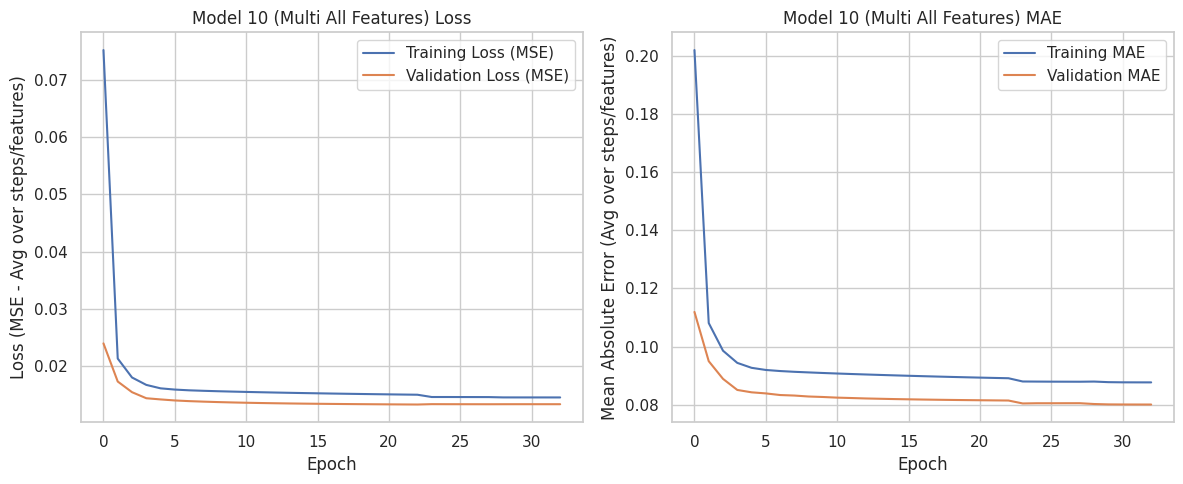

In [ ]:
# Write your code here
# Import necessary components if not already imported
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint # Recommended callbacks
import matplotlib.pyplot as plt # For plotting history
import os # For checkpoint path

# --- Compile and Train Model 10 (Multi-Step All Features) ---

print("\n>>> Compiling and Training Model 10 (Multi-Step All Features)...")

# Initialize history variable
history_m10 = None
training_success_m10 = False

# Proceed only if the model was built successfully (with corrected architecture) and data is ready
if ('model_built_success_m10' in locals() and model_built_success_m10 and
    'data_prep_success_m10' in locals() and data_prep_success_m10):

    # Double-check that model and data variables actually exist
    if (model_m10 is not None and X_train_m10 is not None and y_train_m10 is not None and
        X_test_m10 is not None and y_test_m10 is not None):
        try:
            # --- Define Training Parameters ---
            # Using EPOCHS_MULTI, BATCH_SIZE from configuration
            if 'EPOCHS_MULTI' not in locals(): EPOCHS_MULTI = 50 # Increased default for potentially harder task
            if 'BATCH_SIZE' not in locals(): BATCH_SIZE = 32
            current_epochs = EPOCHS_MULTI
            current_batch_size = BATCH_SIZE
            print(f"Training parameters: Max Epochs={current_epochs}, Batch Size={current_batch_size}")

            # --- Define Callbacks (Highly Recommended) ---
            callbacks_list_m10 = []
            # Early Stopping: Stops training if validation loss doesn't improve
            early_stopping_m10 = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
            # Reduce Learning Rate: Reduces LR if validation loss plateaus
            reduce_lr_m10 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-6)
            # Optional: Model Checkpoint to save the best model file
            if 'CHECKPOINT_DIR' not in locals(): CHECKPOINT_DIR = './model_checkpoints'; os.makedirs(CHECKPOINT_DIR, exist_ok=True)
            checkpoint_path_m10 = os.path.join(CHECKPOINT_DIR, 'multistep_all_features_best.keras')
            model_checkpoint_m10 = ModelCheckpoint(filepath=checkpoint_path_m10, monitor='val_loss', save_best_only=True, mode='min', verbose=1) # verbose=1 to see when saved

            callbacks_list_m10.extend([early_stopping_m10, reduce_lr_m10, model_checkpoint_m10])
            print(f"Using callbacks: {[cb.__class__.__name__ for cb in callbacks_list_m10]}")

            # --- 1. Compile the Model ---
            print("\nCompiling model...")
            optimizer_m10 = Adam(learning_rate=0.001) # Or use global LEARNING_RATE
            loss_function_m10 = 'mean_squared_error' # Appropriate for multi-output regression
            metrics_to_track_m10 = ['mean_absolute_error'] # Average MAE across outputs

            model_m10.compile(
                optimizer=optimizer_m10,
                loss=loss_function_m10,
                metrics=metrics_to_track_m10
            )
            print("Model compiled successfully.")

            # --- 2. Train the Model ---
            print(f"\nStarting training for up to {current_epochs} epochs (with callbacks)...")
            # Train using the multi-step, multi-output data
            history_m10 = model_m10.fit(
                X_train_m10, y_train_m10,                 # Training data (X shape: samples, 10, 4; y shape: samples, 5, 4)
                epochs=current_epochs,                    # Max number of epochs
                batch_size=current_batch_size,            # Batch size
                validation_data=(X_test_m10, y_test_m10), # Validation data
                callbacks=callbacks_list_m10,             # Use defined callbacks
                shuffle=False,                            # DO NOT SHUFFLE time series
                verbose=1                                 # Show progress
            )
            print("\nTraining finished (may have stopped early).")
            training_success_m10 = True

             # --- 3. Plot Training History ---
            print("\nPlotting training history (Loss and MAE)...")
            if history_m10 is not None and history_m10.history:
                 plt.figure(figsize=(12, 5))

                 # Plot Loss (MSE) - Average MSE across all steps and features
                 plt.subplot(1, 2, 1)
                 plt.plot(history_m10.history['loss'], label='Training Loss (MSE)')
                 plt.plot(history_m10.history['val_loss'], label='Validation Loss (MSE)')
                 plt.title('Model 10 (Multi All Features) Loss')
                 plt.xlabel('Epoch')
                 plt.ylabel('Loss (MSE - Avg over steps/features)')
                 plt.legend()
                 plt.grid(True)

                 # Plot Metric (MAE) - Average MAE across all steps and features
                 plt.subplot(1, 2, 2)
                 plt.plot(history_m10.history['mean_absolute_error'], label='Training MAE')
                 plt.plot(history_m10.history['val_mean_absolute_error'], label='Validation MAE')
                 plt.title('Model 10 (Multi All Features) MAE')
                 plt.xlabel('Epoch')
                 plt.ylabel('Mean Absolute Error (Avg over steps/features)')
                 plt.legend()
                 plt.grid(True)

                 plt.tight_layout()
                 plt.show()
            else:
                 print("Could not plot history: History object is empty or None.")

        except Exception as e:
            print(f"\nAn error occurred during Model 10 compilation or training: {e}")
            import traceback
            traceback.print_exc()
            history_m10 = None
            training_success_m10 = False

    else:
        print("\nError: Model 10 or prepared data (X/y train/test for Model 10) is not available or None.")
        training_success_m10 = False
else:
    print("\nSkipping Model 10 compilation and training because model building or data preparation failed.")
    training_success_m10 = False

# --- Final Check ---
# if training_success_m10:
#      print("\nModel 10 training completed. History is available in 'history_m10'.")
#      # Optionally load best weights from checkpoint if restore_best_weights=False
#      # if os.path.exists(checkpoint_path_m10):
#      #     print("Loading best weights from checkpoint...")
#      #     model_m10.load_weights(checkpoint_path_m10)
# else:
#      print("\nModel 10 training failed or was skipped.")

#### Evaluate Model 10 Performance:
Evaluate the trained model on the test dataset. Report the overall MSE and MAE (averaged across all steps and all features). Discuss how to calculate and analyze performance metrics for each individual predicted feature and each predicted time step.

In [ ]:
# Write your code here
# ============================================================
# CELL: Evaluate Model 10 Performance (Multi-Step All Features - Corrected & Complete)
# ============================================================
import numpy as np
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
import traceback # For error details
import pandas as pd # Ensure pandas is imported for discussion/examples if needed

print("\n>>> Evaluating Model 10 Performance (Multi-Step All Features)...")

# Initialize metrics dictionary for this specific model run
model10_metrics = {'Overall_MSE': np.nan, 'Overall_MAE': np.nan, 'Overall_RMSE': np.nan}
evaluation_success_m10 = False
y_pred_actual_m10 = None # Initialize for visualization step
y_test_actual_m10 = None # Initialize for visualization step

# --- Check Prerequisites ---
prereqs_met_eval_m10 = True
if 'training_success_m10' not in locals() or not training_success_m10:
    print("Prerequisite failed: Model 10 training was not successful or flag not set.")
    prereqs_met_eval_m10 = False
if 'model_m10' not in locals() or model_m10 is None:
    print("Prerequisite failed: Trained model 'model_m10' not found.")
    prereqs_met_eval_m10 = False
if 'X_test_m10' not in locals() or X_test_m10 is None:
    print("Prerequisite failed: Test data 'X_test_m10' not found.")
    prereqs_met_eval_m10 = False
if 'y_test_m10' not in locals() or y_test_m10 is None:
    print("Prerequisite failed: Test data 'y_test_m10' not found.")
    prereqs_met_eval_m10 = False
if 'scaler_m10' not in locals() or scaler_m10 is None or not hasattr(scaler_m10, 'scale_'):
    print("Prerequisite failed: Scaler 'scaler_m10' not found or not fitted.")
    prereqs_met_eval_m10 = False
if 'FEATURES' not in locals() or 'N_FEATURES' not in locals() or N_FEATURES != len(FEATURES):
    print("Prerequisite failed: FEATURES list/N_FEATURES not defined or inconsistent.")
    prereqs_met_eval_m10 = False
if 'multi_step_metrics' not in locals():
     print("Warning: Global 'multi_step_metrics' dictionary not found. Initializing.")
     multi_step_metrics = {}

# --- Proceed with Evaluation only if Prerequisites are Met ---
if prereqs_met_eval_m10:
    try: # Main try block for the entire evaluation process

        # 1. Evaluate on SCALED data using Keras .evaluate() (Optional display)
        print("\nEvaluating model on the (scaled) test data using model.evaluate()...")
        results_m10_scaled = model_m10.evaluate(X_test_m10, y_test_m10, verbose=0)
        overall_mse_scaled = results_m10_scaled[0]
        overall_mae_scaled = results_m10_scaled[1]
        overall_rmse_scaled = math.sqrt(overall_mse_scaled)
        print(f"  Overall Test Loss (MSE - Scaled): {overall_mse_scaled:.6f}")
        print(f"  Overall Test MAE (Scaled):        {overall_mae_scaled:.6f}")
        print(f"  Overall Test RMSE (Scaled):       {overall_rmse_scaled:.6f}")
        print(f"  (Note: Metrics averaged over {PREDICTION_HORIZON} steps * {N_FEATURES} features on the 0-1 scale)")


        # --- 2. Evaluate on ORIGINAL Scale (Recommended) ---
        print("\nCalculating metrics on the ORIGINAL data scale...")

        # Make predictions (output is scaled sequences)
        y_pred_scaled_m10 = model_m10.predict(X_test_m10) # Shape: (samples, horizon, features)

        # Reshape for inverse transform
        num_samples_test = y_test_m10.shape[0]
        n_features_scaler = scaler_m10.n_features_in_ # Should be N_FEATURES

        # Reshape predicted and actual sequences to 2D (samples * horizon, features)
        pred_flat_scaled = y_pred_scaled_m10.reshape(-1, n_features_scaler)
        actual_flat_scaled = y_test_m10.reshape(-1, n_features_scaler)

        # Inverse transform using the scaler fitted on training data
        y_pred_actual_flat_m10 = scaler_m10.inverse_transform(pred_flat_scaled)
        y_test_actual_flat_m10 = scaler_m10.inverse_transform(actual_flat_scaled)

        # Calculate overall metrics on the flattened original scale data
        overall_mse_orig = mean_squared_error(y_test_actual_flat_m10, y_pred_actual_flat_m10)
        overall_mae_orig = mean_absolute_error(y_test_actual_flat_m10, y_pred_actual_flat_m10)
        overall_rmse_orig = math.sqrt(overall_mse_orig)

        print("\n--- Model 10 Performance Metrics (Test Set - ORIGINAL Scale) ---")
        print(f" Overall Test MSE (Original Scale): {overall_mse_orig:.4f}")
        print(f" Overall Test MAE (Original Scale): {overall_mae_orig:.4f}")
        print(f" Overall Test RMSE (Original Scale): {overall_rmse_orig:.4f}")
        print(f" (Note: Metrics averaged over {PREDICTION_HORIZON} steps * {N_FEATURES} features)")

        # *** STORE METRICS ***
        model10_metrics = {'Overall_MSE': overall_mse_orig, 'Overall_MAE': overall_mae_orig, 'Overall_RMSE': overall_rmse_orig}
        multi_step_metrics['Model 10 (All Features)'] = model10_metrics # Use the correct key
        print("\nStored Model 10 metrics successfully.")
        evaluation_success_m10 = True # Mark evaluation as successful

        # --- Prepare data for granular analysis and visualization ---
        # Reshape inverse transformed data back to (samples, horizon, features)
        y_pred_actual_m10 = y_pred_actual_flat_m10.reshape(num_samples_test, PREDICTION_HORIZON, N_FEATURES)
        y_test_actual_m10 = y_test_actual_flat_m10.reshape(num_samples_test, PREDICTION_HORIZON, N_FEATURES)

        # --- Discussion & Example Calculations ---
        print("\n--- Discussion: Evaluating Individual Performance ---")
        print("  Breakdown provides insights beyond the overall average error.")
        # A. Per Feature (Avg over Steps)
        print("\n  Avg MAE per Feature (over all steps):")
        for f_idx, feature_name in enumerate(FEATURES):
             # Use the flattened original scale data for easier feature slicing
             mae_feature = mean_absolute_error(y_test_actual_flat_m10[:, f_idx], y_pred_actual_flat_m10[:, f_idx])
             print(f"    - {feature_name}: {mae_feature:.4f}")

        # B. Per Step (Avg over Features)
        print("\n  Avg MAE per Step (over all features):")
        for step in range(PREDICTION_HORIZON):
             # Use the reshaped original scale data for easier step slicing
             mae_step = mean_absolute_error(y_test_actual_m10[:, step, :], y_pred_actual_m10[:, step, :])
             print(f"    - Step {step+1}: {mae_step:.4f}")

        # C. Per Feature Per Step (Example)
        print("\n  Example MAE per Feature per Step:")
        try:
            # Example using 'wind' feature (index 3 based on typical FEATURES order)
            f_idx_wind = FEATURES.index('wind')
            mae_wind_s1 = mean_absolute_error(y_test_actual_m10[:, 0, f_idx_wind], y_pred_actual_m10[:, 0, f_idx_wind])
            mae_wind_s5 = mean_absolute_error(y_test_actual_m10[:, PREDICTION_HORIZON-1, f_idx_wind], y_pred_actual_m10[:, PREDICTION_HORIZON-1, f_idx_wind])
            print(f"    - Wind @ Step 1 MAE: {mae_wind_s1:.4f}")
            print(f"    - Wind @ Step {PREDICTION_HORIZON} MAE: {mae_wind_s5:.4f}")
        except Exception as e_detail:
            print(f"    - Could not calculate detailed example: {e_detail}")


    except Exception as e:
        print(f"\nAn error occurred during Model 10 evaluation: {e}")
        traceback.print_exc() # Print detailed error information
        evaluation_success_m10 = False # Ensure flag is false on error

else:
    # This block executes if the initial prerequisite check failed
    print("\nSkipping Model 10 evaluation: Prerequisites not met.")
    evaluation_success_m10 = False

# --- Store Model/Scaler Objects ---
if 'model_built_success_m10' in locals() and model_built_success_m10:
    if 'models_multi' in locals(): models_multi['all_features'] = model_m10
    if 'scalers_multi' in locals(): scalers_multi['all_features'] = scaler_m10
    print("\nStored Model 10 model and scaler objects.")
else:
    print("\nModel 10 model and scaler objects not stored as build failed or was skipped.")


# --- Final Status Update ---
if evaluation_success_m10:
    print("\nModel 10 evaluation completed.")
else:
    print("\nModel 10 evaluation failed or was skipped.")


>>> Evaluating Model 10 Performance (Multi-Step All Features)...

Evaluating model on the (scaled) test data using model.evaluate()...
  Overall Test Loss (MSE - Scaled): 0.013340
  Overall Test MAE (Scaled):        0.081457
  Overall Test RMSE (Scaled):       0.115498
  (Note: Metrics averaged over 5 steps * 4 features on the 0-1 scale)

Calculating metrics on the ORIGINAL data scale...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

--- Model 10 Performance Metrics (Test Set - ORIGINAL Scale) ---
 Overall Test MSE (Original Scale): 17.6057
 Overall Test MAE (Original Scale): 2.3889
 Overall Test RMSE (Original Scale): 4.1959
 (Note: Metrics averaged over 5 steps * 4 features)

Stored Model 10 metrics successfully.

--- Discussion: Evaluating Individual Performance ---
  Breakdown provides insights beyond the overall average error.

  Avg MAE per Feature (over all steps):
    - precipitation: 3.8446
    - temp_max: 3.0219
    - temp_min: 1.7295
    - wind: 0.9595

  Avg MAE per Step (over all

#### Predict and Visualize Model 10 Results:
Use the trained model to make predictions on the test set input sequences. The model output will have shape (num_test_samples, prediction_horizon, 4). Inverse scale the predictions and the actual test target sequences. Visualize the results by plotting the actual vs. predicted sequences for each of the four features over the 5 future time steps, perhaps using subplots for clarity, for a few example samples or average plots.


>>> Predicting and Visualizing Model 10 Results (All Features)...

Using existing inverse-scaled predictions and actual values from evaluation step.

--- Plotting Example Predictions vs Actuals (Subplots per Feature) ---
Plotting example(s) for test sample index/indices: [256]


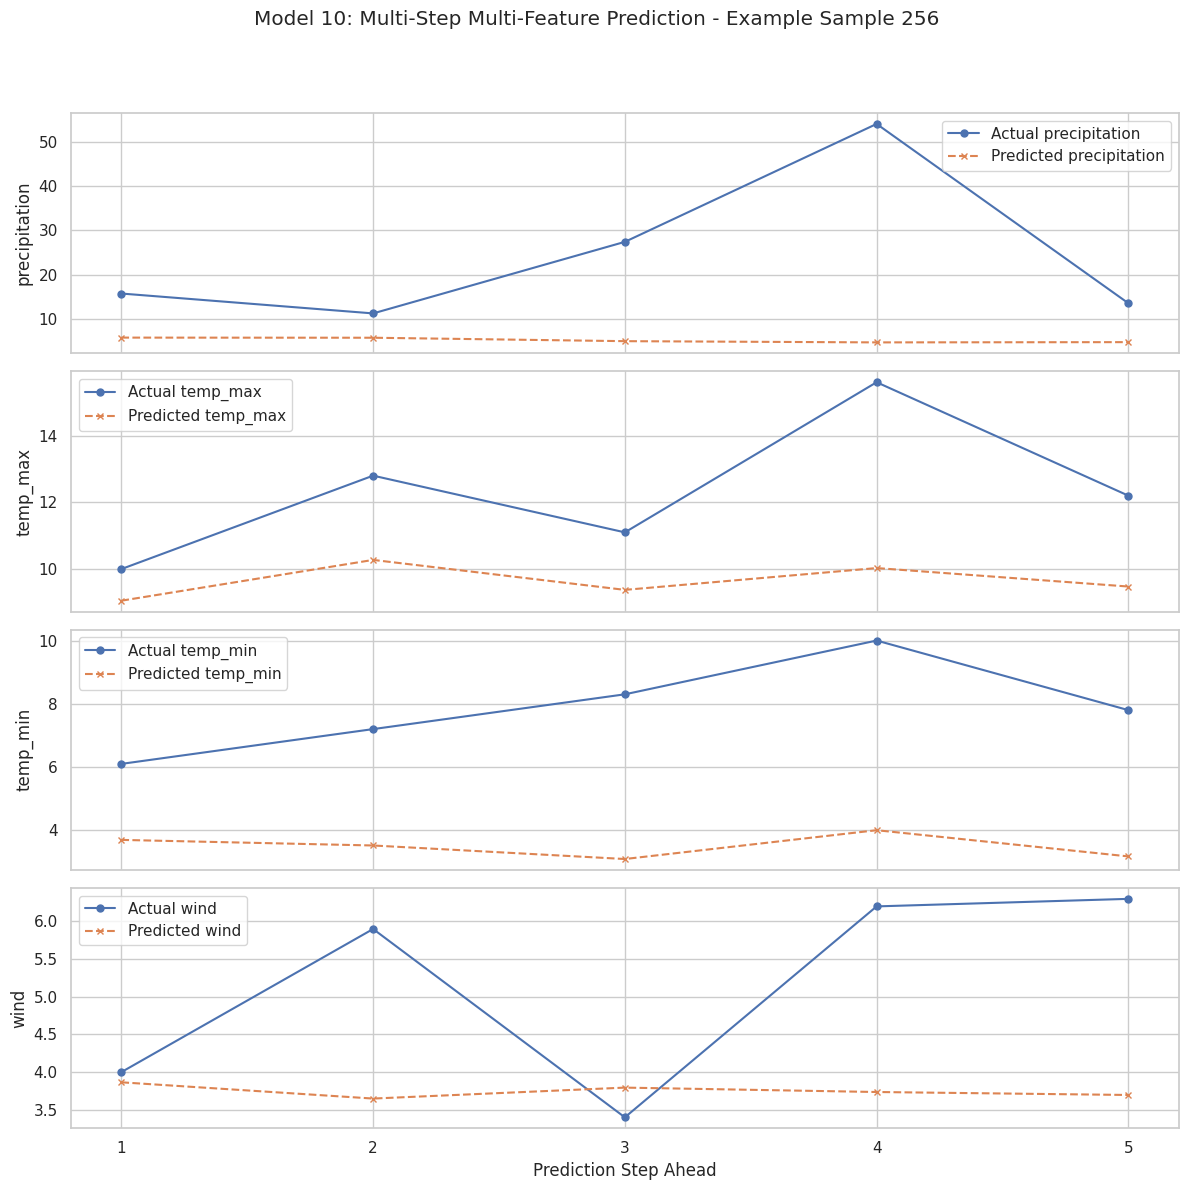


--- Plotting Average Prediction vs Average Actual per Step (Subplots per Feature) ---


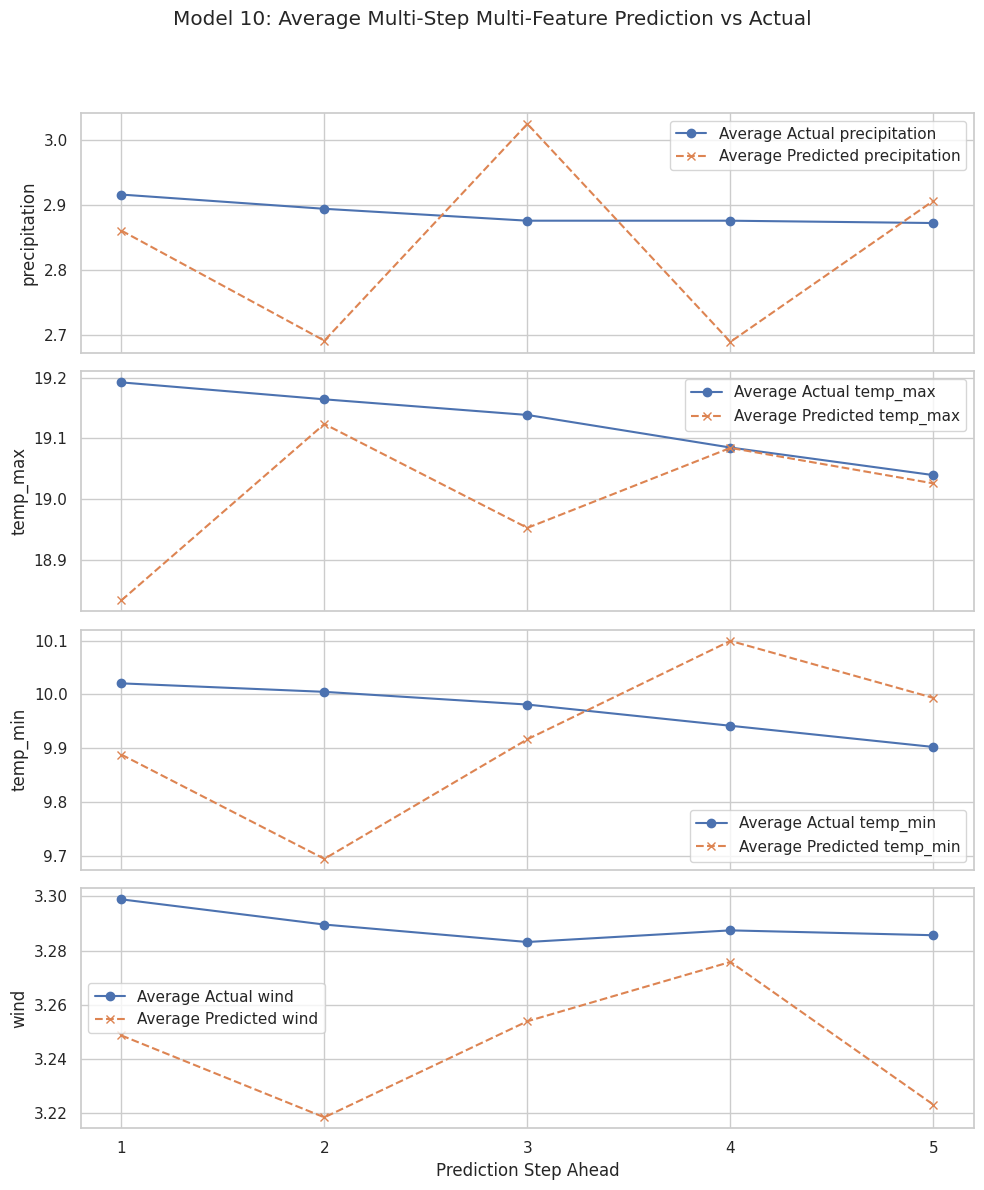


Model 10 prediction and visualization completed.


In [ ]:
# Write your code here
# ===================================================================
# CELL: Predict and Visualize Model 10 Results (Multi-Step All Features)
# ===================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported
import traceback  # For error details

print("\n>>> Predicting and Visualizing Model 10 Results (All Features)...")

# Initialize variables
visualization_success_m10 = False

# --- Check Prerequisites ---
# Need evaluation success flag, and inverse-transformed data from eval step
prereqs_met_viz_m10 = True
if 'evaluation_success_m10' not in locals() or not evaluation_success_m10:
    print("Prerequisite failed: Model 10 evaluation was not successful or flag not set.")
    prereqs_met_viz_m10 = False
# Check if the inverse-transformed data exists from eval step
if 'y_pred_actual_m10' not in locals() or y_pred_actual_m10 is None:
     print("Prerequisite failed: Inverse-transformed predictions 'y_pred_actual_m10' not found.")
     prereqs_met_viz_m10 = False
if 'y_test_actual_m10' not in locals() or y_test_actual_m10 is None:
     print("Prerequisite failed: Inverse-transformed actual targets 'y_test_actual_m10' not found.")
     prereqs_met_viz_m10 = False
# Need X_test_m10 just to get number of samples for plotting examples
if 'X_test_m10' not in locals() or X_test_m10 is None:
     print("Prerequisite failed: Test input data 'X_test_m10' not found.")
     prereqs_met_viz_m10 = False
# Need FEATURES and PREDICTION_HORIZON for plotting labels/axes
if 'FEATURES' not in locals(): print("Prerequisite failed: FEATURES list not defined."); prereqs_met_viz_m10 = False
if 'PREDICTION_HORIZON' not in locals(): print("Prerequisite failed: PREDICTION_HORIZON not defined."); prereqs_met_viz_m10 = False


# --- Proceed with Visualization only if Prerequisites are Met ---
if prereqs_met_viz_m10:
    try:
        # Data should exist from previous evaluation cell
        print("\nUsing existing inverse-scaled predictions and actual values from evaluation step.")
        num_samples_test = X_test_m10.shape[0]
        time_steps = np.arange(1, PREDICTION_HORIZON + 1) # Steps 1 to 5

        # --- Visualization Option 1: Plot Example Sequences ---
        print("\n--- Plotting Example Predictions vs Actuals (Subplots per Feature) ---")
        num_examples_to_plot = 1 # Show only one detailed example by default
        if num_samples_test == 0: print("No test samples to visualize."); raise StopIteration
        if num_samples_test < num_examples_to_plot: num_examples_to_plot = num_samples_test

        example_indices = np.random.choice(num_samples_test, num_examples_to_plot, replace=False)
        print(f"Plotting example(s) for test sample index/indices: {example_indices}")

        for idx in example_indices:
            fig, axes = plt.subplots(N_FEATURES, 1, figsize=(12, N_FEATURES * 3), sharex=True)
            if N_FEATURES == 1: axes = [axes] # Make iterable

            for i, feature_name in enumerate(FEATURES):
                axes[i].plot(time_steps, y_test_actual_m10[idx, :, i], label=f'Actual {feature_name}', marker='o', markersize=5)
                axes[i].plot(time_steps, y_pred_actual_m10[idx, :, i], label=f'Predicted {feature_name}', marker='x', markersize=5, linestyle='--')
                axes[i].set_ylabel(feature_name)
                axes[i].legend(loc='best')
                axes[i].grid(True)
                axes[i].set_xticks(time_steps)

            axes[-1].set_xlabel('Prediction Step Ahead')
            fig.suptitle(f'Model 10: Multi-Step Multi-Feature Prediction - Example Sample {idx}', y=1.02)
            plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout
            plt.show()


        # --- Visualization Option 2: Plot Average Prediction vs Average Actual ---
        print("\n--- Plotting Average Prediction vs Average Actual per Step (Subplots per Feature) ---")
        avg_actual_m10 = np.mean(y_test_actual_m10, axis=0) # Average over samples -> shape (horizon, features)
        avg_pred_m10 = np.mean(y_pred_actual_m10, axis=0)   # Average over samples -> shape (horizon, features)

        fig_avg, axes_avg = plt.subplots(N_FEATURES, 1, figsize=(10, N_FEATURES * 3), sharex=True)
        if N_FEATURES == 1: axes_avg = [axes_avg] # Make iterable

        for i, feature_name in enumerate(FEATURES):
            axes_avg[i].plot(time_steps, avg_actual_m10[:, i], label=f'Average Actual {feature_name}', marker='o')
            axes_avg[i].plot(time_steps, avg_pred_m10[:, i], label=f'Average Predicted {feature_name}', marker='x', linestyle='--')
            axes_avg[i].set_ylabel(feature_name)
            axes_avg[i].legend(loc='best')
            axes_avg[i].grid(True)
            axes_avg[i].set_xticks(time_steps)

        axes_avg[-1].set_xlabel('Prediction Step Ahead')
        fig_avg.suptitle('Model 10: Average Multi-Step Multi-Feature Prediction vs Actual', y=1.02)
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
        plt.show()

        visualization_success_m10 = True

    except StopIteration: # Handle case where plotting skipped due to no data
        print("Visualization skipped as there were no test data examples.")
        visualization_success_m10 = True # Not an error
    except Exception as e:
        print(f"\nAn error occurred during Model 10 prediction or visualization: {e}")
        traceback.print_exc()
        visualization_success_m10 = False

else:
    print("\nSkipping Model 10 prediction and visualization due to missing prerequisites.")
    visualization_success_m10 = False

# --- Final Status Update ---
if visualization_success_m10:
     print("\nModel 10 prediction and visualization completed.")
else:
     print("\nModel 10 prediction and visualization failed or was skipped.")

### Part 4: Model Performance Comparison

Objective: Systematically collect, compare, and analyze the evaluation metrics from the trained single-step and multi-step prediction models to understand their relative performance.

Instructions: Use pandas, matplotlib, and seaborn to create tables and visualizations. Ensure your analysis is clearly explained in markdown cells.

#### Collect Single-Step Model Metrics:
Gather the test evaluation metrics (MSE, MAE, RMSE) you obtained for each of the single-step prediction models (Model 1: Precipitation, Model 2: Temp Max, Model 3: Temp Min, Model 4: Wind, Model 5: All 4 Parameters). Organize these metrics into a pandas DataFrame.

In [ ]:
# Write your code here
# ============================================================
# CELL: Part 4 - Collect Single-Step Model Metrics
# ============================================================
import pandas as pd
import numpy as np # Ensure numpy is imported for potential NaN handling
import math # For potential sqrt if only MSE stored
from IPython.display import display # Import display for styled DataFrames

print("\n--- Part 4: Model Performance Comparison ---")
print("\n>>> Collecting Single-Step Model Metrics...")

# --- Ensure the main metrics dictionary exists ---
# This dictionary should have been populated by the evaluation steps of Models 1-5

# Check if the dictionary exists; if not, create an empty one and warn the user.
if 'single_step_metrics' not in locals() and 'single_step_metrics' not in globals():
    print("WARNING: 'single_step_metrics' dictionary not found.")
    print("It should have been created and populated by the evaluation cells for Models 1-5.")
    print("Initializing an empty dictionary. Results table will contain NaNs unless Models 1-5 are run first.")
    # Initialize empty to prevent crashing the rest of the cell, but results will be NaN
    single_step_metrics = {}
# If it exists but is not a dictionary, reset it (unlikely scenario but safe)
elif not isinstance(single_step_metrics, dict):
     print("WARNING: 'single_step_metrics' exists but is not a dictionary. Resetting.")
     single_step_metrics = {}


# --- Data Validation and Formatting ---

valid_single_step_metrics = {}

# Define the standard display names we want in the final DataFrame index
# These should match the keys used when storing metrics in the evaluation steps
expected_keys = [
    'Model 1 (Precip)',
    'Model 2 (Temp Max)',
    'Model 3 (Temp Min)',
    'Model 4 (Wind)',
    'Model 5 (All Features)'
]

print("\nChecking collected metrics:")

# Print available keys for debugging assistance
if single_step_metrics:
    print(f"  Available keys in single_step_metrics: {list(single_step_metrics.keys())}")
else:
    print("  'single_step_metrics' dictionary is currently empty or was just initialized.")

# Iterate through the desired display names/keys
for model_name in expected_keys:
    # Use .get() for safe dictionary access
    metrics_dict = single_step_metrics.get(model_name)

    if metrics_dict and isinstance(metrics_dict, dict):
        # Extract metrics safely, defaulting to NaN if missing or not numeric
        # Check the exact keys used when storing (e.g., 'MSE' vs 'Overall_MSE')

        # Prioritize direct keys, then fallback keys, ensuring type is numeric
        mse_val = metrics_dict.get('MSE')
        if not isinstance(mse_val, (int, float)):
            mse_val = metrics_dict.get('Overall_MSE')
        mse = mse_val if isinstance(mse_val, (int, float)) else np.nan

        mae_val = metrics_dict.get('MAE')
        if not isinstance(mae_val, (int, float)):
            mae_val = metrics_dict.get('Overall_MAE')
        mae = mae_val if isinstance(mae_val, (int, float)) else np.nan

        rmse_val = metrics_dict.get('RMSE')
        if not isinstance(rmse_val, (int, float)):
             rmse_val = metrics_dict.get('Overall_RMSE')
        stored_rmse = rmse_val if isinstance(rmse_val, (int, float)) else np.nan


        # Calculate RMSE from MSE if possible and stored_rmse is not valid
        if not np.isnan(mse) and np.isnan(stored_rmse):
            # Ensure MSE is non-negative before taking sqrt
            if mse >= 0:
                rmse = math.sqrt(mse)
                print(f"  Calculated RMSE for '{model_name}' from MSE.")
            else:
                print(f"  Warning: Cannot calculate RMSE for '{model_name}', MSE is negative ({mse}).")
                rmse = np.nan
        elif not np.isnan(stored_rmse):
            rmse = stored_rmse
            print(f"  Using stored RMSE for '{model_name}'.")
        else:
            rmse = np.nan # Assign NaN if RMSE cannot be obtained

        # Check if we obtained any valid numeric metric
        if not (np.isnan(mse) and np.isnan(mae) and np.isnan(rmse)):
            # Store using the consistent metric names expected by later plots
            valid_metrics = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}
            valid_single_step_metrics[model_name] = valid_metrics
            print(f"  Successfully processed metrics for key: '{model_name}'.")
        else:
            print(f"  Note: No valid numeric metrics found for '{model_name}', adding row of NaNs.")
            # Add a row of NaNs explicitly if no valid metrics were found after checks
            valid_single_step_metrics[model_name] = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}

    else:
        # This happens if the key wasn't found in single_step_metrics or value wasn't a dict
        if model_name in single_step_metrics:
             print(f"Warning: Entry for '{model_name}' in 'single_step_metrics' is not a dictionary. Skipping.")
        else:
             print(f"Warning: Metrics for '{model_name}' key not found in 'single_step_metrics'. Adding row of NaNs.")
        # Add a row of NaNs explicitly if the key was missing or invalid
        valid_single_step_metrics[model_name] = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}


# --- Create Pandas DataFrame ---

print("\nCreating metrics DataFrame...")
if valid_single_step_metrics:
    # Create DataFrame using the validated metrics
    single_step_metrics_df = pd.DataFrame.from_dict(valid_single_step_metrics, orient='index')

    # Ensure columns are named consistently (MSE, MAE, RMSE)
    single_step_metrics_df.columns = ['MSE', 'MAE', 'RMSE']

    # Reindex using the desired order to ensure all models appear, fill missing with NaN
    single_step_metrics_df = single_step_metrics_df.reindex(expected_keys) # No need for fill_value if NaNs already added

    print("\nSingle-Step Model Metrics Comparison Table:")
    try:
        # Format numbers to a reasonable number of decimal places using Styler
        display(single_step_metrics_df.style.format("{:.6f}", na_rep="NaN"))
    except NameError: # Fallback if display is not available (e.g., standard Python script)
        print("(Display not available, printing rounded DataFrame)")
        print(single_step_metrics_df.round(6))
    except Exception as e: # Catch other potential display errors
        print(f"(An error occurred during display: {e}, printing rounded DataFrame)")
        print(single_step_metrics_df.round(6))

    # Check if the DataFrame has actual data (non-NaN) for visualization
    # .isnull().all() checks if all values *within a column* are NaN
    # .isnull().all().all() checks if *all columns* consist entirely of NaNs
    single_step_comparison_ready = not single_step_metrics_df.isnull().all().all()
    if single_step_comparison_ready:
        print("\nDataFrame contains some data and is ready for single-step visualization.")
    else:
        print("\nWarning: DataFrame contains only NaNs. Cannot visualize single-step metrics.")
        # Ensure the flag reflects reality if reindexing introduced only NaNs
        single_step_comparison_ready = False


else:
    print("\nError: No valid single-step metrics could be collected (valid_single_step_metrics is empty). Cannot create comparison DataFrame.")
    # Create an empty DataFrame with expected columns and index for consistency downstream
    single_step_metrics_df = pd.DataFrame(np.nan, index=expected_keys, columns=['MSE', 'MAE', 'RMSE'])
    print("\nEmpty DataFrame created:")
    display(single_step_metrics_df)
    single_step_comparison_ready = False

# --- Reminder ---
print("\nNext Step: Visualize the 'single_step_metrics_df' DataFrame (if data is available).")


--- Part 4: Model Performance Comparison ---

>>> Collecting Single-Step Model Metrics...

Checking collected metrics:
  Available keys in single_step_metrics: ['Model 2 (Temp Max)', 'Model 3 (Temp Min)', 'Model 4 (Wind)']
  Using stored RMSE for 'Model 2 (Temp Max)'.
  Successfully processed metrics for key: 'Model 2 (Temp Max)'.
  Using stored RMSE for 'Model 3 (Temp Min)'.
  Successfully processed metrics for key: 'Model 3 (Temp Min)'.
  Using stored RMSE for 'Model 4 (Wind)'.
  Successfully processed metrics for key: 'Model 4 (Wind)'.

Creating metrics DataFrame...

Single-Step Model Metrics Comparison Table:



DataFrame contains some data and is ready for single-step visualization.

Next Step: Visualize the 'single_step_metrics_df' DataFrame (if data is available).


#### Visualize Single-Step Model Metrics:
Create visualizations (e.g., bar plots) to compare the MSE, MAE, and RMSE across the different single-step models. Use subplots or separate plots for each metric for clarity.


>>> Visualizing Single-Step Model Metrics Comparison...

Generating comparison plots...
- Plotting comparison for MSE...
- Plotting comparison for MAE...
- Plotting comparison for RMSE...


<ipython-input-107-0be4ad57f31c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette='viridis') # Choose a palette
<ipython-input-107-0be4ad57f31c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette='viridis') # Choose a palette
<ipython-input-107-0be4ad57f31c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette='viridis') # Choose a palette


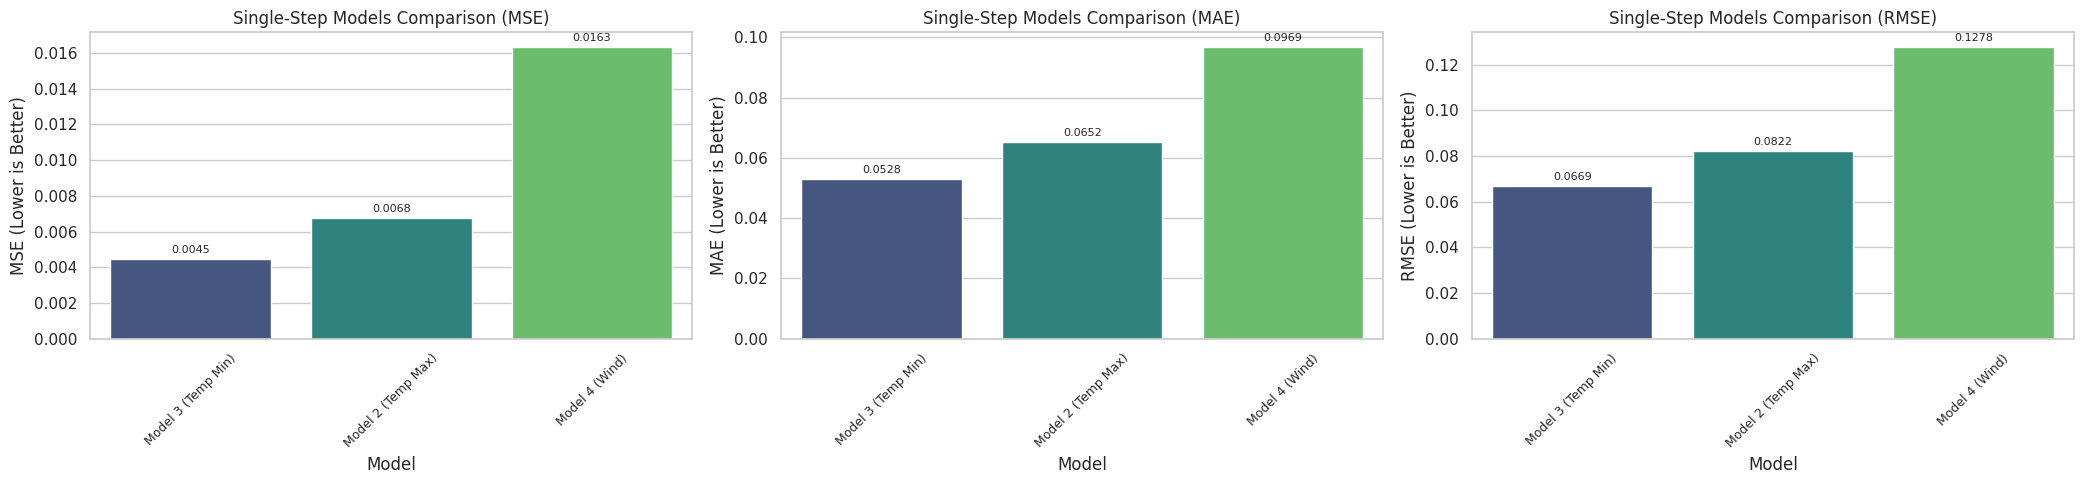

In [ ]:
# Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# --- Visualize Single-Step Model Metrics ---

print("\n>>> Visualizing Single-Step Model Metrics Comparison...")

# Check if the DataFrame exists and is ready from the previous step
if 'single_step_comparison_ready' in locals() and single_step_comparison_ready and not single_step_metrics_df.empty:

    # Define the metrics we want to plot
    metrics_to_plot = ['MSE', 'MAE', 'RMSE']
    # Define number of columns for subplot grid
    n_plot_cols = len(metrics_to_plot) # Plot each metric in its own column
    n_plot_rows = 1

    # Create figure and axes
    fig, axes = plt.subplots(n_plot_rows, n_plot_cols,
                             figsize=(7 * n_plot_cols, 5 * n_plot_rows), # Adjust size as needed
                             sharey=False) # Don't share y-axis as scales differ

    # Ensure axes is always an array, even if only one plot
    if n_plot_cols == 1:
        axes = [axes]

    print("\nGenerating comparison plots...")

    # Loop through each metric and create a bar plot
    for i, metric in enumerate(metrics_to_plot):
        if metric in single_step_metrics_df.columns:
            # Get data for the current metric, drop models where metric is NaN for plotting
            plot_data = single_step_metrics_df[metric].dropna().sort_values() # Sort for visual comparison

            if not plot_data.empty:
                # Create bar plot using Seaborn
                sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette='viridis') # Choose a palette

                # Set titles and labels
                axes[i].set_title(f'Single-Step Models Comparison ({metric})')
                axes[i].set_ylabel(metric + (' (Lower is Better)' if metric != 'R2' else ' (Higher is Better)')) # Add context to label
                axes[i].set_xlabel('Model')

                # Rotate x-axis labels for better readability if they are long
                axes[i].tick_params(axis='x', rotation=45, labelsize=9) # Rotate and adjust size

                # Add value labels on top of bars (optional)
                try:
                    for container in axes[i].containers:
                        axes[i].bar_label(container, fmt='%.4f', fontsize=8, padding=3) # Format to 4 decimals
                except AttributeError: # Handle older matplotlib versions if needed
                    pass # bar_label might not be available

                print(f"- Plotting comparison for {metric}...")
            else:
                axes[i].set_title(f'No valid data for {metric}')
                print(f"- Skipping plot for {metric}: No valid data found.")
        else:
            print(f"Warning: Metric '{metric}' not found in the DataFrame columns.")
            axes[i].set_title(f'{metric} Data Not Found')


    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Display the plots
    plt.show()

else:
    print("\nSkipping visualization: Single-step metrics DataFrame is not available or empty.")
    if 'single_step_comparison_ready' not in locals(): print("- 'single_step_comparison_ready' flag not found.")
    if 'single_step_metrics_df' not in locals(): print("- 'single_step_metrics_df' DataFrame not found.")
    elif single_step_metrics_df.empty: print("- 'single_step_metrics_df' DataFrame is empty.")

#### Collect Multi-Step Model Overall Metrics:
Gather the overall test evaluation metrics (MSE, MAE, and calculate RMSE) you obtained for each of the multi-step prediction models (Model 6: Precipitation, Model 7: Temp Max, Model 8: Temp Min, Model 9: Wind, Model 10: All 4 Parameters). Organize these into a pandas DataFrame. Remember these metrics are averaged over the 5 predicted steps.

In [ ]:
# Write your code here
# ============================================================
# CELL: Part 4 - Collect Multi-Step Model Overall Metrics (Corrected Keys)
# ============================================================
import pandas as pd
import numpy as np # Ensure numpy is imported
import math      # Ensure math is imported for sqrt

print("\n--- Part 4: Model Performance Comparison ---")
print("\n>>> Collecting Multi-Step Model Overall Metrics...")

# --- Ensure the main metrics dictionary exists ---
if 'multi_step_metrics' not in locals():
    print("CRITICAL ERROR: 'multi_step_metrics' dictionary not found.")
    multi_step_metrics = {}

# --- Define expected model names/keys AS THEY WERE STORED ---
# *** CORRECTED KEYS BASED ON YOUR OUTPUT ***
display_model_names = [
    'Model 6 (Precip)',
    'Model 7 (temp_max)', # Use lowercase key found
    'Model 8 (temp_min)', # Use lowercase key found
    'Model 9 (wind)',     # Use lowercase key found
    'Model 10 (All Features)'
]

# --- Validate and process collected metrics ---
valid_multi_step_metrics = {}
print("\nChecking collected metrics:")
if multi_step_metrics:
    print(f"  Available keys in multi_step_metrics: {list(multi_step_metrics.keys())}")
else:
    print("  'multi_step_metrics' dictionary is currently empty.")

# Iterate through the corrected display names/keys
for model_name_key in display_model_names: # Use the actual keys now
    metrics_dict = multi_step_metrics.get(model_name_key) # Get using the actual key

    if metrics_dict and isinstance(metrics_dict, dict):
        mse = metrics_dict.get('Overall_MSE') if isinstance(metrics_dict.get('Overall_MSE'), (int, float)) else np.nan
        mae = metrics_dict.get('Overall_MAE') if isinstance(metrics_dict.get('Overall_MAE'), (int, float)) else np.nan
        stored_rmse = metrics_dict.get('Overall_RMSE') if isinstance(metrics_dict.get('Overall_RMSE'), (int, float)) else np.nan
        if not np.isnan(mse) and np.isnan(stored_rmse): rmse = math.sqrt(mse)
        else: rmse = stored_rmse
        if not (np.isnan(mse) and np.isnan(mae) and np.isnan(rmse)):
            valid_metrics = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}
            valid_multi_step_metrics[model_name_key] = valid_metrics # Store using the actual key
            print(f"  Successfully processed metrics for key: '{model_name_key}'.")
        else:
            print(f"  Note: No valid numeric metrics found for key '{model_name_key}', adding row of NaNs.")
            valid_multi_step_metrics[model_name_key] = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}
    else:
        print(f"Warning: Metrics for key '{model_name_key}' not found in 'multi_step_metrics'. Adding row of NaNs.")
        valid_multi_step_metrics[model_name_key] = {'MSE': np.nan, 'MAE': np.nan, 'RMSE': np.nan}


# --- Create Pandas DataFrame ---
print("\nCreating metrics DataFrame...")
if valid_multi_step_metrics:
    multi_step_metrics_df = pd.DataFrame.from_dict(valid_multi_step_metrics, orient='index')
    multi_step_metrics_df.columns = ['Overall MSE', 'Overall MAE', 'Overall RMSE']
    # Reindex using the corrected keys to maintain order
    multi_step_metrics_df = multi_step_metrics_df.reindex(display_model_names, fill_value=np.nan)

    # Optional: Rename index for prettier display if desired
    # Create a mapping from the actual keys to desired display names
    rename_map = {
        'Model 6 (Precip)': 'Model 6 (Precip)',
        'Model 7 (temp_max)': 'Model 7 (Temp Max)',
        'Model 8 (temp_min)': 'Model 8 (Temp Min)',
        'Model 9 (wind)': 'Model 9 (Wind)',
        'Model 10 (All Features)': 'Model 10 (All Features)'
     }
    multi_step_metrics_df = multi_step_metrics_df.rename(index=rename_map)


    print("\nMulti-Step Model Metrics Comparison Table (Averaged over Horizon):")
    try:
        display(multi_step_metrics_df.style.format("{:.4f}"))
    except NameError: print(multi_step_metrics_df.round(4))
    except AttributeError: print(multi_step_metrics_df.round(4))

    multi_step_comparison_ready = not multi_step_metrics_df.isnull().all().all()
    if multi_step_comparison_ready: print("\nDataFrame ready for multi-step visualization.")
    else: print("\nWarning: DataFrame contains only NaNs or is empty.")

else:
    print("\nError: No valid multi-step metrics could be collected. Cannot create comparison DataFrame.")
    multi_step_metrics_df = pd.DataFrame()
    multi_step_comparison_ready = False

# --- Reminder ---
print("\nNext Step: Visualize the 'multi_step_metrics_df' DataFrame.")


--- Part 4: Model Performance Comparison ---

>>> Collecting Multi-Step Model Overall Metrics...

Checking collected metrics:
  Available keys in multi_step_metrics: ['Model 7 (temp_max)', 'Model 8 (temp_min)', 'Model 9 (wind)', 'Model 10 (All Features)', 'Model 6 (Precip)']
  Successfully processed metrics for key: 'Model 6 (Precip)'.
  Successfully processed metrics for key: 'Model 7 (temp_max)'.
  Successfully processed metrics for key: 'Model 8 (temp_min)'.
  Successfully processed metrics for key: 'Model 9 (wind)'.
  Successfully processed metrics for key: 'Model 10 (All Features)'.

Creating metrics DataFrame...

Multi-Step Model Metrics Comparison Table (Averaged over Horizon):



DataFrame ready for multi-step visualization.

Next Step: Visualize the 'multi_step_metrics_df' DataFrame.


#### Visualize Multi-Step Model Overall Metrics:
Create visualizations (e.g., bar plots) to compare the overall MSE, MAE, and RMSE across the different multi-step models.


>>> Visualizing Multi-Step Model Metrics Comparison...

Generating comparison plots...
- Plotting comparison for Overall MSE...
- Plotting comparison for Overall MAE...
- Plotting comparison for Overall RMSE...


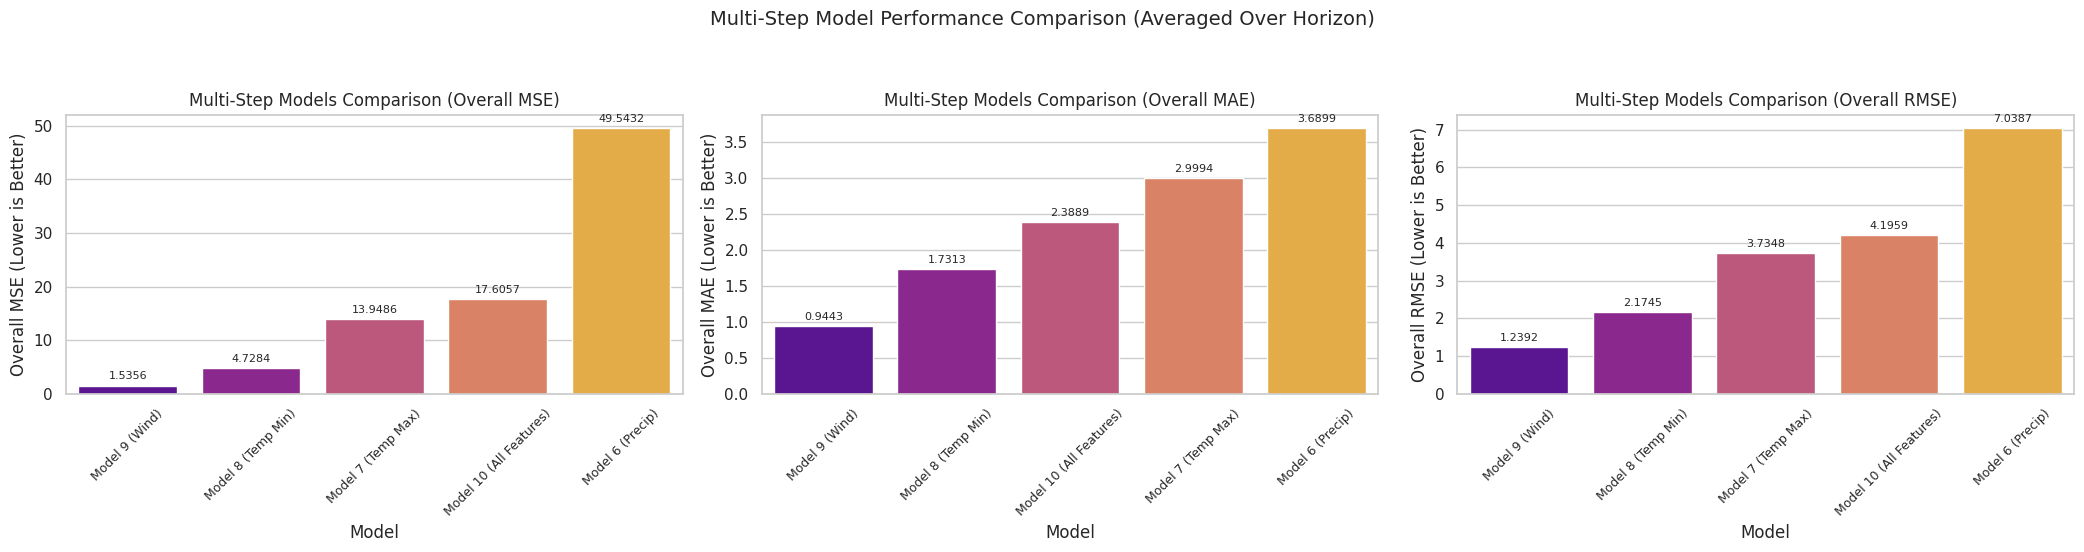


--- End of Part 4 ---


In [ ]:
# Write your code here
# ===================================================================
# CELL: Part 4 - Visualize Multi-Step Model Overall Metrics (Corrected tick_params)
# ===================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported
import numpy as np  # Ensure numpy is imported

print("\n>>> Visualizing Multi-Step Model Metrics Comparison...")

# Check if the DataFrame exists and is ready from the previous step
if 'multi_step_comparison_ready' in locals() and multi_step_comparison_ready and 'multi_step_metrics_df' in locals() and not multi_step_metrics_df.empty and not multi_step_metrics_df.isnull().all().all():

    # Define the metrics we want to plot
    metrics_to_plot = ['Overall MSE', 'Overall MAE', 'Overall RMSE']
    n_plot_cols = len(metrics_to_plot)
    n_plot_rows = 1

    # Create figure and axes
    fig, axes = plt.subplots(n_plot_rows, n_plot_cols,
                             figsize=(7 * n_plot_cols, 5.5 * n_plot_rows),
                             sharey=False)

    if n_plot_cols == 1: axes = [axes]

    print("\nGenerating comparison plots...")

    # Loop through each metric
    for i, metric in enumerate(metrics_to_plot):
        if metric in multi_step_metrics_df.columns:
            plot_data = multi_step_metrics_df[metric].dropna().sort_values()

            if not plot_data.empty:
                # Create bar plot
                # Handle potential FutureWarning for palette
                try:
                     sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette='plasma', hue=plot_data.index, legend=False)
                except TypeError: # Fallback for older seaborn/matplotlib if hue workaround fails
                     sns.barplot(x=plot_data.index, y=plot_data.values, ax=axes[i], palette='plasma')


                # Set titles and labels
                axes[i].set_title(f'Multi-Step Models Comparison ({metric})')
                axes[i].set_ylabel(metric + (' (Lower is Better)' if 'R2' not in metric else ' (Higher is Better)'))
                axes[i].set_xlabel('Model')

                # Rotate x-axis labels
                # *** CORRECTED LINE: Removed ha='right' ***
                axes[i].tick_params(axis='x', rotation=45, labelsize=9)

                # Add value labels on top of bars
                try:
                    for container in axes[i].containers:
                        axes[i].bar_label(container, fmt='%.4f', fontsize=8, padding=3)
                except AttributeError:
                    pass # Skip if bar_label not supported

                print(f"- Plotting comparison for {metric}...")
            else:
                axes[i].set_title(f'No valid data for {metric}')
                print(f"- Skipping plot for {metric}: No valid data found after dropping NaNs.")
        else:
            print(f"Warning: Metric column '{metric}' not found in the DataFrame.")
            axes[i].set_title(f'{metric} Data Not Found')

    # Add overall title and adjust layout
    fig.suptitle('Multi-Step Model Performance Comparison (Averaged Over Horizon)', fontsize=14, y=1.03)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

else:
    # This else block executes if the initial check for valid DataFrame failed
    print("\nSkipping visualization: Multi-step metrics DataFrame ('multi_step_metrics_df') is not available, empty, or contains only NaN values.")
    # Optional detailed checking for debugging
    if 'multi_step_comparison_ready' not in locals() or not multi_step_comparison_ready: print("- Reason: 'multi_step_comparison_ready' flag is False or not found.")
    if 'multi_step_metrics_df' not in locals(): print("- Reason: 'multi_step_metrics_df' DataFrame object not found.")
    elif multi_step_metrics_df.empty: print("- Reason: 'multi_step_metrics_df' DataFrame is empty.")
    elif multi_step_metrics_df.isnull().all().all(): print("- Reason: 'multi_step_metrics_df' DataFrame contains only NaN values.")

print("\n--- End of Part 4 ---")